In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

kaggle/input/.DS_Store
kaggle/input/Untitled.ipynb
kaggle/input/house-prices-advanced-regression-techniques/test.csv
kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
kaggle/input/house-prices-advanced-regression-techniques/train.csv
kaggle/input/.ipynb_checkpoints/Untitled-checkpoint.ipynb


In [2]:
train_path = 'kaggle/input/house-prices-advanced-regression-techniques/train.csv'
train = pd.read_csv(train_path,index_col='Id')

In [3]:
pd.set_option('display.max_columns', 80)
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

# Part 1: Create Utilties #

## Improve the Help Documentation for Efficient Lookup
First, create a searchable, segmented version of the help document. We can use the field as keys in a
dictionary to help text for that specific field so we don't need to keep scrolling through
a wall of text to find what we need.

Also, make a function (show) that we can call passing the fieldname and it will display the 
text or use a '?' along with a portion of the fieldname to search for available field descriptions

In [4]:
import re

def create_searchable_help(path):
    pattern = r'^([A-Za-z0-9]+): '
    with open(path,'r') as file:
        docs = file.readlines()
        linenum = 0
        lst = []
        for line in docs:
            key = re.findall(pattern,line,re.MULTILINE)
            if len(key) > 0:
                lst.append((linenum,key[0]))
            linenum += 1
        docdict  ={}
        for k,tup in enumerate(lst):
            start = tup[0]
            if len(lst) > k + 1:
                end = lst[k+1][0]
            else:
                end = -1
            text = " ".join([line for line in docs[start:end]])
            docdict[tup[1]] = {'text': text}
    return docdict

path = 'kaggle/input/house-prices-advanced-regression-techniques/data_description.txt'
docdict = create_searchable_help(path)

def show(topic):
    if '?' in topic:
        search = topic.split('?')
        search.remove('')
        lst = [x for x in docdict.keys() if search[0].strip().lower() in x.lower()]
        if len(lst) > 1:
            print(f"Features Containing \'{search[0]}\' :\n  " + "\n  ".join(lst))
        elif len(lst) == 1:
            print(docdict[lst[0]]['text'])
            if 'charts' in docdict[lst[0]].keys():
                docdict[lst[0]]['charts']
    else:
        print(docdict[topic]['text'])

In [5]:
# Verify it works - pull an arbitrary field to retrieve its help text
show('BldgType')

BldgType: Type of dwelling
 		
        1Fam	Single-family Detached	
        2FmCon	Two-family Conversion; originally built as one-family dwelling
        Duplx	Duplex
        TwnhsE	Townhouse End Unit
        TwnhsI	Townhouse Inside Unit
 	



In [6]:
# Verify the search functionality works when it finds 1 result
# and multiple matches return a list to select from
print("Example of searching and having a single match")
show('?Bed')

print("Example of multiple matches returned")
show('?SF')

Example of searching and having a single match
Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
 

Example of multiple matches returned
Features Containing 'SF' :
  BsmtFinSF1
  BsmtFinSF2
  BsmtUnfSF
  TotalBsmtSF
  1stFlrSF
  2ndFlrSF
  LowQualFinSF
  WoodDeckSF
  OpenPorchSF


In [7]:
# Obtain a static list of the original columns in the dataframe
org_cols = train.columns

In [8]:
#Let's generate a few utilty functions. We know we'll have categorical data
# and we'll want to compare to SalePrice.  

def get_box_plot(field):
    box = sns.boxplot(data=train,
               x=field,
               y='SalePrice')
    return box 


def color_by_condition(val,color):
    if pd.isna(val) == True:
        return color
    else:
        return 'grey'


# Part 2: Data Exploration

In [9]:
# Let's revisit the dataframe and evaluate which fields are discrete/continuous numeric fields,
# which are ordinal-numeric (if any) and which are categorical.

print(train.shape)
train.info(verbose=True)
train.head(10)

(1460, 80)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 1

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   
6           50       RL         85.0    14115   Pave   NaN      IR1   
7           20       RL         75.0    10084   Pave   NaN      Reg   
8           60       RL          NaN    10382   Pave   NaN      IR1   
9           50       RM         51.0     6120   Pave   NaN      Reg   
10         190       RL         50.0     7420   Pave   NaN      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
6          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
7          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
8          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
9          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
10         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   
6        Norm     1Fam     1.5Fin            5            5       1993   
7        Norm     1Fam     1Story            8            5       2004   
8        Norm     1Fam     2Story            7            6       1973   
9        Norm     1Fam     1.5Fin            7            5       1931   
10     Artery   2fmCon     1.5Unf            5            6       1939   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
6           1995     Gable  CompShg     VinylSd     VinylSd       None   
7           2005     Gable  CompShg     VinylSd     VinylSd      Stone   
8           1973     Gable  CompShg     HdBoard     HdBoard      Stone   
9           1950     Gable  CompShg     BrkFace     Wd Shng       None   
10          1950     Gable  CompShg     MetalSd     MetalSd       None   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd    

In [10]:
def get_columns_by_type():
    ord_cols =  ["OverallQual","OverallCond"]
    # Create a list of just the discrete columns (Note: we'll have to take out those columns that are ordinal)
    dis_cols = [x for x in train.select_dtypes(include=['int64','float64']).columns if x not in ord_cols]

    # Create list of categorical features
    cat_cols = [x for x in train.select_dtypes(include=['object']).columns]
    return (dis_cols[:-1],cat_cols, ord_cols, dis_cols[-1])
    
dis_cols, cat_cols,ord_cols,target = get_columns_by_type()

# 2.1 Numeric Feature Evaluation

In this section, I'll take a deep-dive into the existing numerical columns only.  My goal is 3 fold:
* Evaluate and impute missing values
* I want to understand which numerical features have the most information 

## 2.1.1 Missing Values

The three numeric features all demonstrate moderately weak correlations with the target. Particularly for the LotFrontage, we should use a more comprehensive  method for imputation (i.e. no mean/median but relying on other features to derive the values) since a substantial number are missing. We can try using sklearn's IterativeImputer leveraging k-nn to impute the value. Below, I explore the most correlated columns to LotFrontage to get a sense for how well knn will perform.

In [11]:
# Grab the most correlated features to LotFrontage
abs(train.corr().loc['LotFrontage']).sort_values(ascending=False)[1: 5]

/var/folders/y2/s0rssrh12596xwpyfp42jb0h0000gn/T/ipykernel_29640/3592425079.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(train.corr().loc['LotFrontage']).sort_values(ascending=False)[1: 5]


1stFlrSF       0.457181
LotArea        0.426095
GrLivArea      0.402797
TotalBsmtSF    0.392075
Name: LotFrontage, dtype: float64

<Axes: xlabel='1stFlrSF', ylabel='LotArea'>

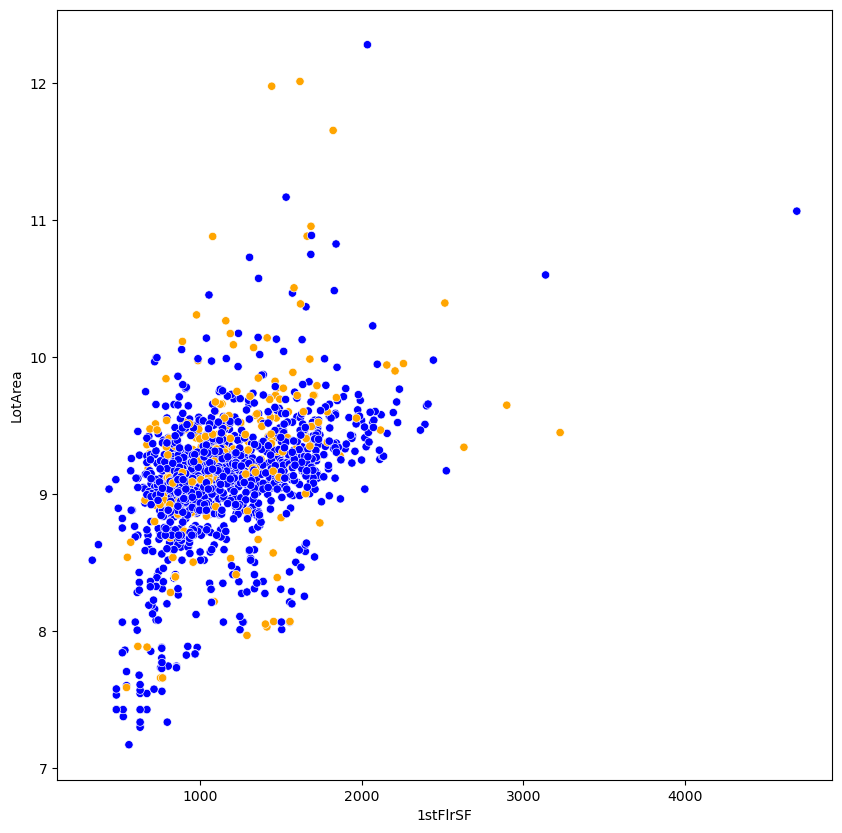

In [15]:
# Generate a scatter plot where x and y represent the top-2 correlated columns. "Orange" denotes nan LotFrontage points
plt.figure(figsize=(10,10))

mapper = {}
lt_set = train['LotFrontage']
for i in lt_set:
    if np.isnan(i) == True:
        mapper[-1] = 'orange'
    else:
        mapper[i] = 'blue'
        
mapper
sns.scatterplot(x=train['1stFlrSF'],
                y=np.log(train['LotArea']), 
                hue=[x if x > 0 else -1 if pd.isna(x)==True else 0 for x in train['LotFrontage']], 
                palette=mapper, legend=False)

The above grid suggests that the two features most correlated to LotFrontage (represented along x and y-axes) will have enough close data points to approximate the values for the LotFrontage.  There are a few outliers (near LotAreas with log-values of 12 as well as values near 1stFlrsF of 3k and lot areas near log-values between 9 and 10 but at they are a minor few.

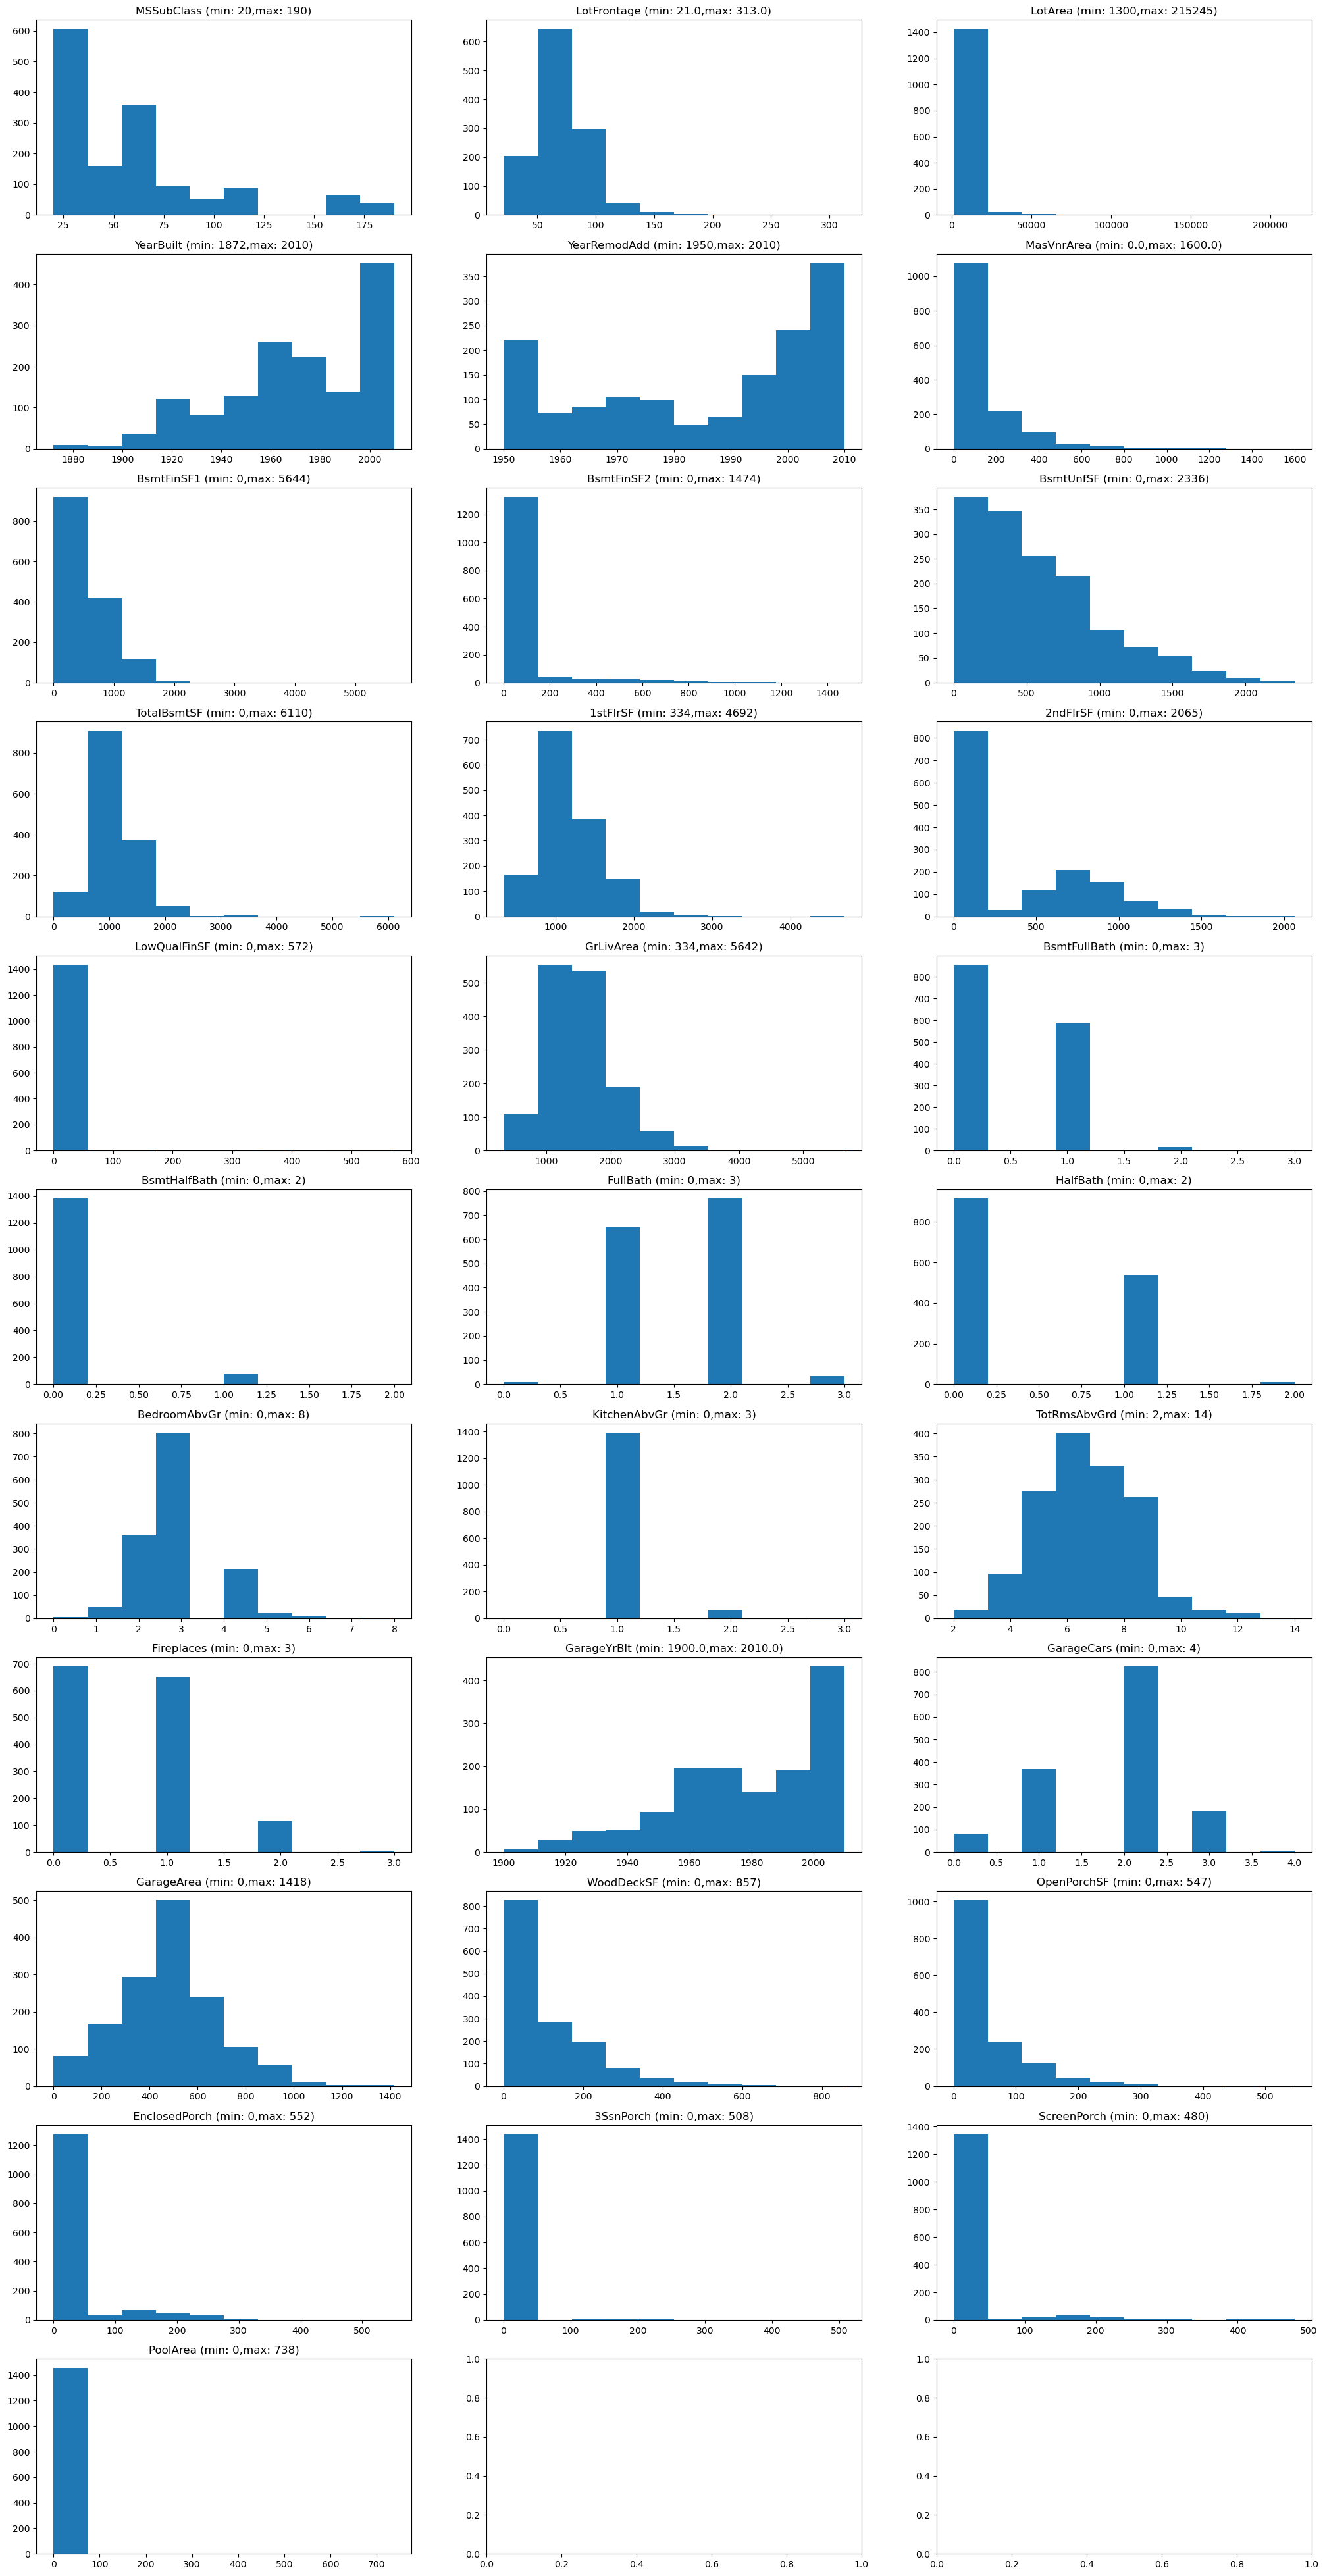

In [494]:
fig, axes = plt.subplots(11,3,figsize=(25,50))
ax = axes.flatten()
for i,n in enumerate(dis_cols[:-3]):
    mn = train[n].min()
    mx = train[n].max()
    ax[i].set_title(f'{n} (min: {mn},max: {mx})')
    ax[i].hist(train[n])

There are quite a few features that have extreme outliers/long-tailed distributions. Given that many of these have very large scales, we should log-scale the data to make it easier to learn the hyperparameters 

In [ ]:
#Let's check to see whether imputation causes the data to be 
# be outliers or act weirdly from the other data.

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
tst_std = StandardScaler().fit_transform(tst.iloc[:,:-1])
pca = PCA(n_components=20,random_state=0)
vals = pca.fit_transform(tst_std)


components = np.arange(pca.n_components_) + 1
plt.plot(components, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.xlabel('Component')
plt.ylabel('Variance')


plt.figure(figsize=(10,5))
sns.scatterplot(x=vals[:,0],
               y=vals[:,1],
               hue=tst['imputed'])
plt.title("Scatterplot of data points using First Two PCA Features")
plt.xlabel('X0')
plt.ylabel('X1');

<AxesSubplot:title={'center':'PCA Feature Heatmap'}>

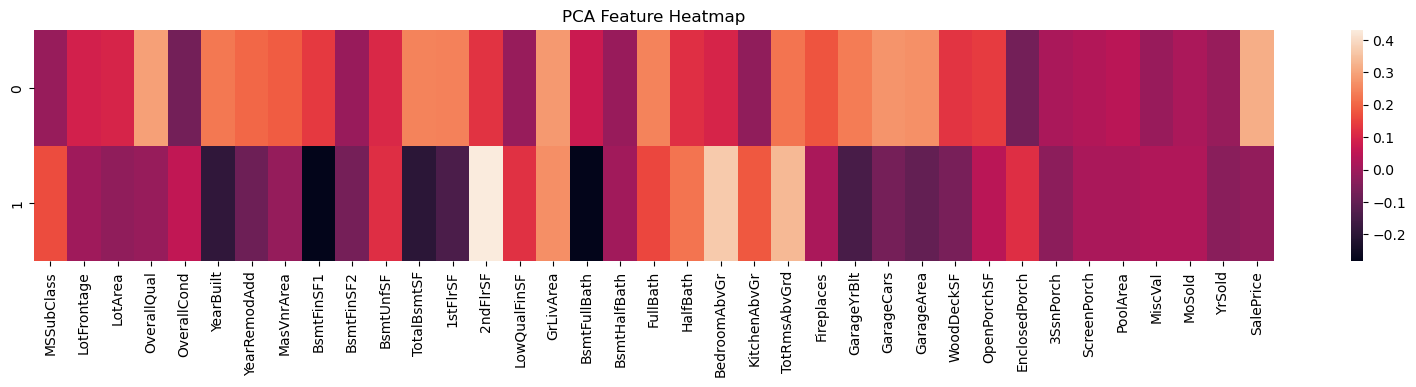

In [ ]:
# Great! on the surface, it appears our imputed records haven't created a
# a class of outliers. Just for additional insight, I'm going to 
# run out a heatmap of the features PCA found for both components as
# high variance/high information for the new features.


plt.figure(figsize=(20,3))
plt.title('PCA Feature Heatmap')
sns.heatmap(pca.components_[:2],xticklabels=tst.columns[:-1])

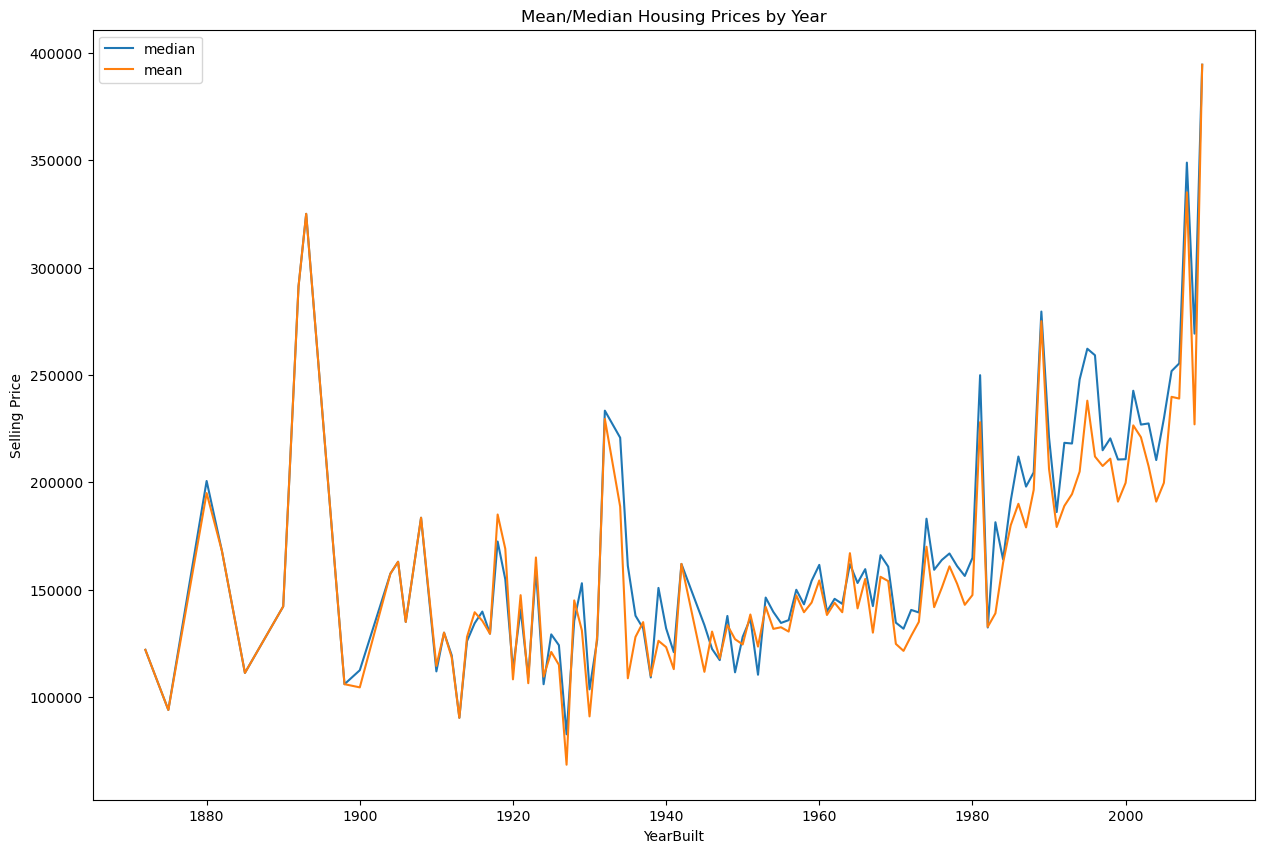

In [ ]:
# Let's get an idea of what mean and median housing prices look like over a span of time

prices = train.groupby('YearBuilt')['SalePrice'].agg(['mean', 'median'])

plt.figure(figsize=(15,10))
sns.lineplot(data=prices,
            x=prices.index.astype('int'),
            y='mean',
            dashes=False)
median = sns.lineplot(data=prices,
            x=prices.index.astype('int'),
            y='median',
            dashes=True)

plt.ylabel('Selling Price')
plt.title('Mean/Median Housing Prices by Year')
plt.legend(['median','mean'])
xlabels = [int(x) for x in prices.index]

It's clear from the graph that newer sales are showing a trend of higher prices regardless of occasional shocks in the market. At this point our data can't tell us whether this increase is from newer houses (age?) or whether this is strictly from inflation (or a combination).  We should look to extract age of house at time of sale and see if we can understand a bit more what's going on here.

In [14]:
train['d_house_age'] = train['YrSold'] - train['YearBuilt'] 
train['d_house_age'].describe()
dis_cols.append('d_house_age')

In [ ]:
labs =pd.cut(train['d_house_age'],
      bins=[0,10,30,50,150],
      labels=['< 10','10-30','30-50','> 50'])

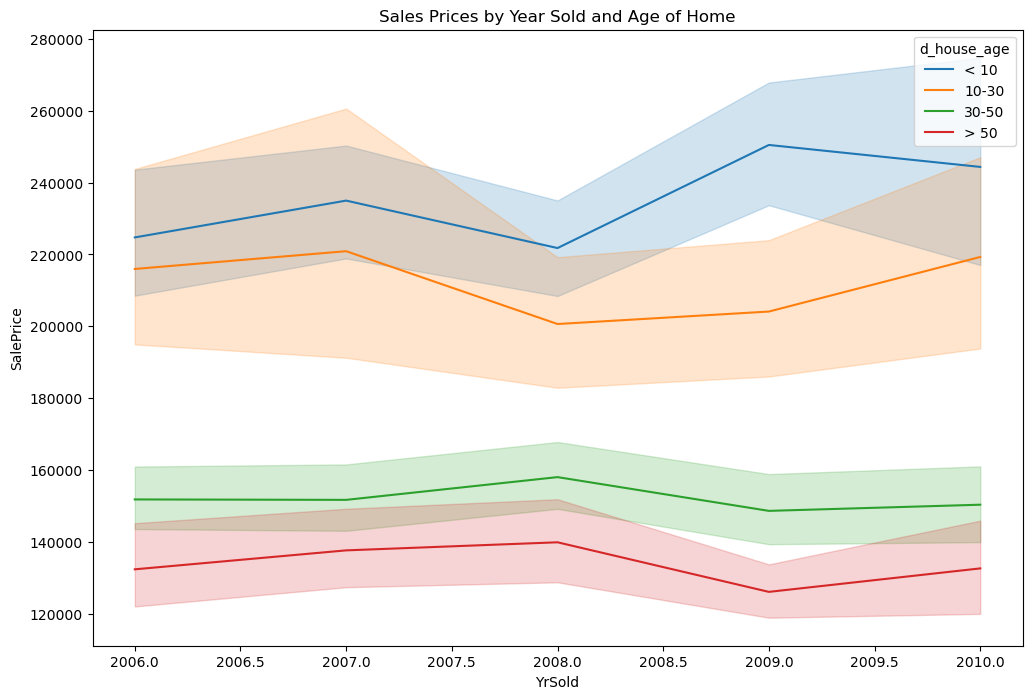

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Sales Prices by Year Sold and Age of Home')
sns.lineplot(data=train,
            x='YrSold',
            y='SalePrice',
            hue=labs);

The above graph tells us a few things:
     - newer homes fetch higher prices compared to older counterparts.
     - newer homes have greater variance and volatility in sale price compared to older (as evidenced by the bands) and the directions of the lines

Now that we have a basic set of numeric variables, let's create a baseline regessor and feed features into it to see if we can improve it.  Note, at this point, I'm not concerned with the type of model,I'm simply evaluating the featureset.

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

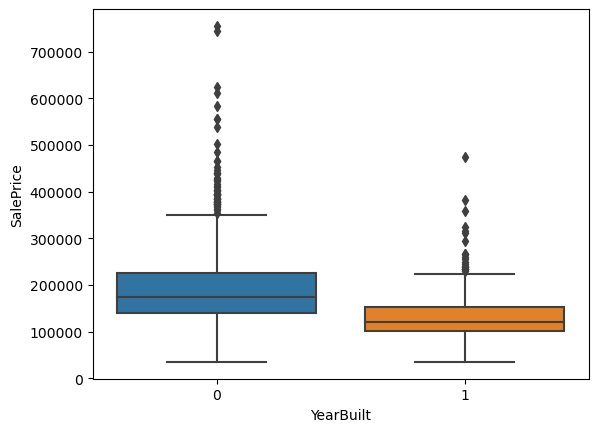

In [146]:
bf45 = train['YearBuilt'].apply(lambda x: 1 if x < 1946 else 0)
sns.boxplot(x=bf45, y=train['SalePrice'])


In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

class ConditionsOHETransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self,columns, rem_cols=None, agg_cols=None, comb=None, proportion=1):
        self.org_columns = columns
        self.columns = columns
        self.rem_cols = rem_cols
        self.agg_cols = agg_cols
        self.proportion = proportion
        self.comb = comb

    def fit(self, df, y=None):
        col1 = self.org_columns[0]
        col2 = self.org_columns[1]
        self.columns = list(set(df[col1]).union(set(df[col2])))
        if self.rem_cols is not None:
            self.parse_remove_cols()
        self.X = pd.DataFrame(columns=list(self.columns))
        return self
    
    def transform(self,df,y=None):
        X = self.X.copy()
        t = pd.get_dummies(df[self.org_columns],prefix_sep='_')
        if self.agg_cols != None:
            X = self.fit_agg(t,X,df)
        else:
            X = self.fit_binary(t,X)
        X.fillna(0,inplace=True,axis=1)
        return X
    
    def fit_transform(self, df,y=None):
        col1 = self.org_columns[0]
        col2 = self.org_columns[1]
        self.columns = list(set(df[col1]).union(set(df[col2])))
        if self.rem_cols is not None:
            self.parse_remove_cols()
        self.X = pd.DataFrame(columns=list(self.columns))
        X = self.X.copy()
        t = pd.get_dummies(df[self.org_columns],prefix_sep='_')
        if self.agg_cols != None:
            X = self.fit_agg(t,X,df)
        else:
            X = self.fit_binary(t,X)
        X.fillna(0,inplace=True,axis=1)
        return X
    
    def fit_binary(self,t,X):
        for col in self.X.columns:
            X[col] = t.apply(lambda x: 1 if np.sum([x[i] for i in t.columns if col in i]) > 0 else 0, axis=1)
        if self.comb != None:
            X['Rail'] = X.apply(lambda x: 1 if np.sum(x[self.comb]) > 0 else 0, axis=1)
            X.drop(columns=self.comb, axis=1, inplace=True)
        return X
    
    def fit_agg(self,t,X,df):
        if type(self.proportion) == str:
            proportion = df[self.proportion]
        else:
            proportion = 1
        
        df1 = (df.pivot(columns=[self.org_columns[0]],values=self.agg_cols[0])
                .fillna(0))
        df2  = (df.pivot(columns=[self.org_columns[1]],values=self.agg_cols[1])
                .fillna(0))
        for col in df2.columns:
            if col in df1.columns:
                df1[col] = (df1[col] + df2[col])/proportion
            else:
                df1[col] = df2[col]/proportion
        return df1

    
    def parse_remove_cols(self):
        if type(self.rem_cols) == list:
            self.columns = list(set(self.columns).difference(set(self.rem_cols)))
        elif type(self.rem_cols) == str:
            self.columns.remove(self.rem_cols)
        return None
    
    def set_output(self,transform):
        pass
    
    
class Cat2Val(BaseEstimator,TransformerMixin):
    
    def __init__(self, c_col, v_col):
        self.c_col = c_col
        self.v_col = v_col
        self.deep = True
        
    def fit(self, df, y=None):
        c_col = self.c_col
        self.columns = list(df[c_col].unique())
        return self
    
    def fit_transform(self, df, y=None):
        X = df.copy()
        c_col = self.c_col
        v_col = self.v_col
        X = pd.pivot(data=X[[c_col,v_col]],
              columns=c_col, values=v_col).fillna(0)
        if np.nan in X.columns:
            X.drop(columns=[np.nan], axis=1, inplace=True)
        X.fillna(0, inplace=True)
        self.columns = list(X.columns)
        return X
        
        
    def transform(self, df, y=None):
        X = pd.DataFrame(index= df.index, columns = self.columns)
        c_col = self.c_col
        v_col = self.v_col
        for col in self.columns:
            if col in list(df[c_col].unique()):
                X[col] = df.apply(lambda x: x[v_col] if x[c_col]==col else 0, axis=1)
            else:
                X[col] = 0
        if np.nan in X.columns:
            X.drop(columns=[np.nan], axis=1, inplace=True)
        X.fillna(0, inplace=True)
        return X
    
    def set_output(self,transform):
        pass
    

class Cat2Dummies(BaseEstimator,TransformerMixin):
    
    def __init__(self, c_col, categories):
        self.c_col = c_col
        self.categories = categories
        
    def fit(self, df, y=None):
        # X['new'] = df[c_col].apply(lambda x: x if x in self.categories_ else 'Other')
        # return self
        return self
    
    def fit_transform(self, df, y=None):
        X = pd.DataFrame(index=df.index)
        X['new'] = df[self.c_col].apply(lambda x: x if x in self.categories else f'{self.c_col}_Other')
        unique = set(X['new'].unique())
        X = pd.get_dummies(X, columns=['new'], prefix='', prefix_sep='').fillna(0)
        # add columns that weren't generated in X that were designated in self.categories.
        for col in list(set(self.categories + [f'{self.c_col}_Other']).difference(unique)):
            X[col] = 0
        return X
    
    
    def transform(self,df):
        X = pd.DataFrame(index=df.index)
        X['new'] = df[self.c_col].apply(lambda x: x if x in self.categories else f'{self.c_col}_Other')
        unique = set(X['new'].unique())
        X = pd.get_dummies(X, columns=['new'], prefix='', prefix_sep='').fillna(0)
        # add columns that weren't generated in X that were designated in self.categories.
        for col in list(set(self.categories + [f'{self.c_col}_Other']).difference(unique)):
            X[col] = 0
        return X
        
    def set_output(self,transform):
        pass
 
    
    
class SelectiveScaler(BaseEstimator, TransformerMixin):
    def __init__(self, scaler):
        self.scaler = scaler
    
    def fit(self, X, y=None):
        self.columns_to_scale_ = [x for x in X.columns if np.isin(X[x].unique(), [0.0,0,1.0, 1]).all() == False]
        # Fit the scaler on the selected columns
        self.scaler.fit(X[self.columns_to_scale_])
        return self
    
    def transform(self, X):
        # Scale the selected columns
        X_scaled = X.copy()
        X_scaled[self.columns_to_scale_] = self.scaler.transform(X[self.columns_to_scale_])
        return X_scaled

In [12]:
from sklearn.model_selection import train_test_split
inc_cols = dis_cols
# inc_cols.remove('MSSubClass')
ft_cat_cols = cat_cols[:2] + ['Neighborhood','BldgType','Condition1','Condition2','GarageType','Electrical', 'ExterQual', 'FireplaceQu','BsmtFinType1','BsmtFinType2', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'RoofStyle','RoofMatl']
X = train[inc_cols + ord_cols + ft_cat_cols]
y = np.log(train['SalePrice'])

X_train,X_val,y_train, y_val = train_test_split(X,y,
                                                  test_size=.1,
                                                  random_state=0)


/Users/davidboudia/anaconda3/envs/python3_11/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:343: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


                         0
mean_test_score  -0.140859
mean_train_score -0.130565


<Axes: title={'center': 'Feature Importance by Coefficients'}>

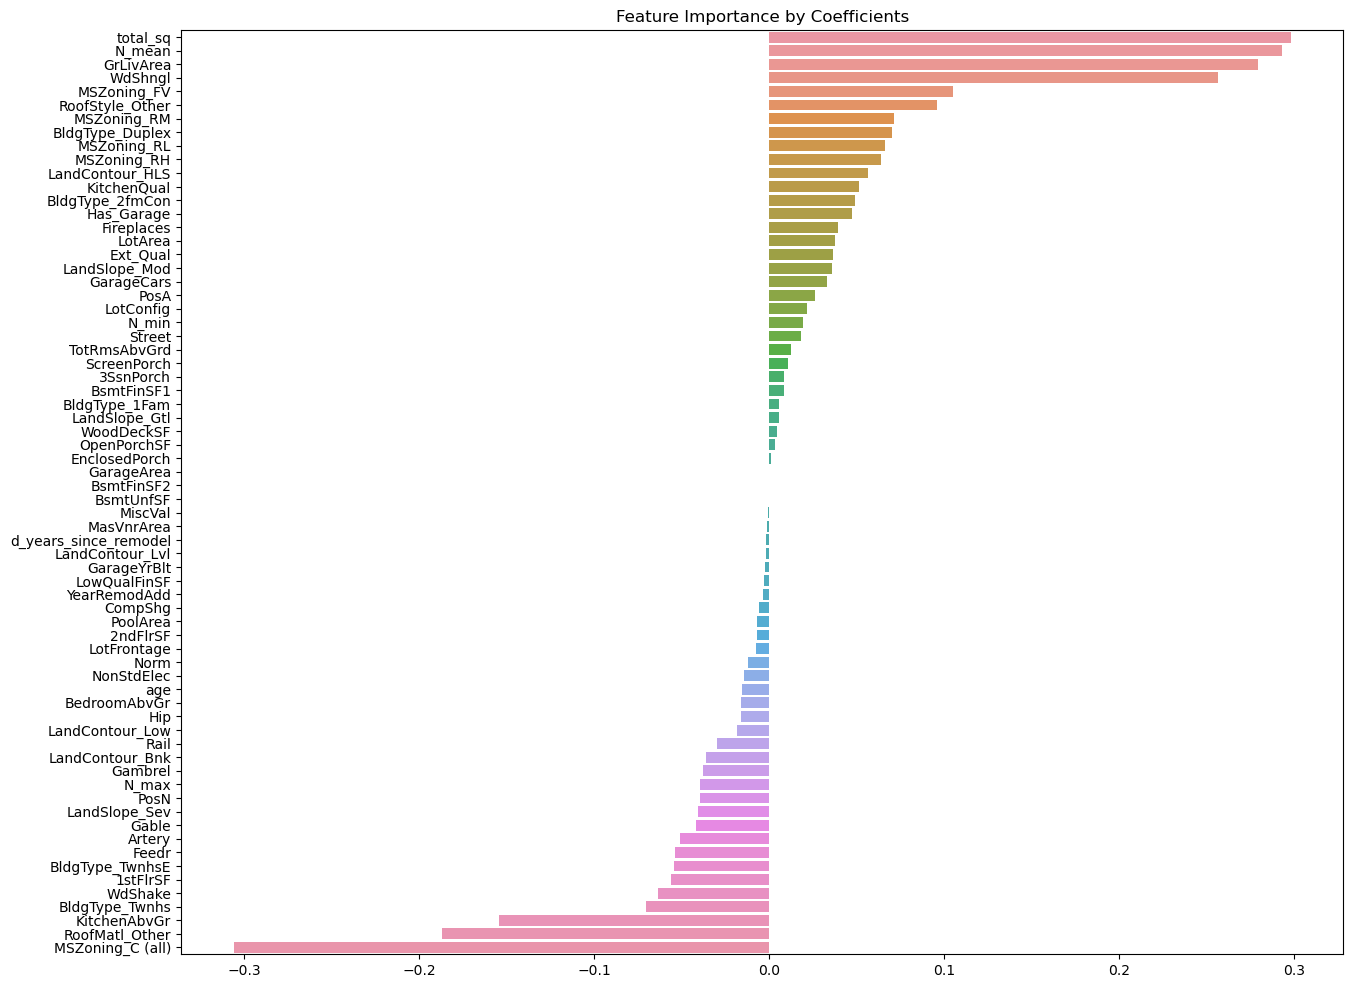

In [110]:
# Create a pipeline with the same procedure for imputation and 
# add scaling.  Run Gridsearch (if I choose to run a lot of variations)
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
import ConditionOHETransformer as cohe
from sklearn.neural_network import MLPRegressor
# import autopep8

# pep8.BaseReport

def get_age(df,cols):
    X = df.copy()
    X['age'] = X['YrSold'] - X['YearBuilt']
    X['age'] = X['age'].apply(lambda x: 0 if x < 0 else x)
    X['age'] = X['age'].apply(np.log1p)
    # X['d_qtr_sold'] = X['MoSold'].map({1:1, 2:1, 3:1, 4:2,5:2,6:2,7:3,8:3,9:3,10:4,11:4,12:4})
    # X['Garage_Age'] = X.apply(lambda x: (x['YrSold'] - x['GarageYrBlt']) if pd.isnull(x['GarageYrBlt']) == False else 0,axis=1)
    # X['Garage_Age'] = X['Garage_Age'].apply(lambda x: 0 if x < 0 else x)
    X['d_years_since_remodel'] = X.apply(lambda x: (x['YrSold'] - x['YearRemodAdd']) if (x['YrSold'] - x['YearRemodAdd']) > 0 else 0, axis=1)
    X.drop(columns=['MoSold', 'MSSubClass'],axis=1, inplace=True)
    return X


def get_time_since_Remodel(df,cols):
    X = df.copy()
    X['d_remod'] = X.apply(lambda x: x[cols[1]] - x[cols[0]] if x[cols[1]] - x[cols[0]] > 0 else 0, axis=1)
    return X


def binaryMapping(df,cdict,col):
    X = df.copy()
    X[col] = X[col].map(cdict)
    return X


def addColumns(df):
    X = df.copy()
    X['total_sq'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
    # X['AbvGr%'] = X['GrLivArea'] / X['total_sq']
    X.drop(columns=['BsmtFullBath', 'BsmtHalfBath','FullBath','HalfBath','TotalBsmtSF'],axis=1, inplace=True)
    return X

def miscFuncs(df):
    X = df.copy()
    # originally in the addColumns function
    X['total_bth'] = X['BsmtFullBath'] + (.5*X['BsmtHalfBath']) + X['FullBath'] + (.5*X['HalfBath'])
    X['Single_Story'] = X['MSSubClass'].apply(lambda x: 1 if x <= 40 else 0)
    X.drop(columns=['BsmtFullBath', 'BsmtHalfBath','FullBath','HalfBath','TotalBsmtSF'],axis=1, inplace=True)



def createConditionsColumns(df):
    X = df[['Condition1','Condition2']].copy()
    unique_cols = set(X['Condition1']).union(set(X['Condition2']))
    cols_df = pd.get_dummies(X)
    for col in unique_cols:
        X[col] = X.apply(lambda x: np.sum([x[i] for i in df.columns if col in i]), axis=1)
    return X[unique_cols]



def neighborhoodMean(df):
    X = df.copy()
    def get_price(mydict, x):
        key = (x['YrSold'],x['Neighborhood'])
        if key in mydict.keys():
            return mydict[(x['YrSold'],x['Neighborhood'])] 
        else:
            neigh = [x[1] for x in mydict.keys()]
            return np.mean([x for x in mydict.values() if key[1] in neigh ])

    meandict = train.groupby(['YrSold','Neighborhood'])['SalePrice'].mean().to_dict()
    X['N_mean'] = X.apply(lambda x: get_price(meandict,x) ,axis=1)

    mindict = train.groupby(['YrSold','Neighborhood'])['SalePrice'].min().to_dict()
    X['N_min'] = X.apply(lambda x: get_price(mindict,x) ,axis=1)
    
    maxdict = train.groupby(['YrSold','Neighborhood'])['SalePrice'].max().to_dict()
    X['N_max'] = X.apply(lambda x: get_price(maxdict,x) ,axis=1)
    
    X.drop(columns=['Neighborhood','YrSold'], axis=1, inplace=True)
    return X


def targetColMean(df,cat_col, target,new_col,drop=False):
    X = df.copy()
    
    def get_price(mydict, x):
        key = x[cat_col]
        if key in mydict.keys():
            return mydict[key] 
        else:
            return np.mean(list(mydict.values()))

    meandict = train.groupby(cat_col)[target].mean().to_dict()
    X[new_col] = X.apply(lambda x: get_price(meandict,x) ,axis=1)
    if drop:
        X.drop(columns=[cat_col], inplace=True, axis=1)
    return X
        

def MultDwell(df):
    X = df.copy()
    # X['d_multi'] = X['BldgType'].apply(lambda x: 1 if x != '1Fam' else 0)
    X = pd.get_dummies(X,columns=['BldgType'], drop_first=True)
    # X.drop(columns=['BldgType'],axis=1,inplace=True)
    return X


def CategoricalMapping(df):
    
    
    X= df.copy()
    X['Has_Garage'] = X['GarageType'].map({'2Types': 1, 'Attchd': 1, 'BuiltIn': 1, 'Basment': 1, 'Detachd':1 ,'CarPort':0, 'NA':0})
    X['NonStdElec'] = X['Electrical'].apply(lambda x: 1 if x != 'SBrkr' else 0)
    X['Ext_Qual'] = X['ExterQual'].map({'Ex':4,'Gd':3, 'TA':2,'Fa':1, 'Po':0}) 
    X['KitchenQual'] = X['KitchenQual'].map({'Ex': 4, 'Gd':3, 'TA':2, 'Fa': 1, 'Po':0})
    X.fillna(1,inplace=True,axis=1)
    X.drop(columns=['GarageType', 'Electrical','ExterQual','FireplaceQu'], axis=1, inplace=True)
    return X



def YearFeatures(df):
    X = df.copy()
    
    X['GarageYrBlt'] = X.apply(lambda x: x['GarageYrBlt'] - x['YearBuilt'], axis=1)
    X['GarageYrBlt'] = X['GarageYrBlt'].apply(lambda x: 0 if x < 0 else x)
    # X['YrSold'] = X['YrSold'].map({2006:0, 2007:1, 2008:2, 2009:3, 2010:4})
    X['YearRemodAdd'] = X.apply(lambda x: x['YearRemodAdd'] - x['YearBuilt'], axis=1)
    X['YearRemodAdd'] = X['YearRemodAdd'].apply(lambda x: 0 if x < 0 else x)
    
    X.drop(columns=['YearBuilt','YrSold'], axis=1, inplace=True)
    return X


def CalcPropUnfSQ(df,num, denom, new_col):
    X = df.copy()
    X[new_col] = X[num] / X[denom]
    return X


def get_nonbinarycols(df):
    lst = [x for x in df.columns if np.isin(df[x].unique(), [0.,1.]).all() == False]
    return lst 
    
    

num_dis_cols = [i for i in range(len(X.columns)) if X[X.columns[i]].dtypes in ['int64','float64'] and i not in ['MSSubClass']]
num_cat_cols = [i for i in range(len(X.columns)) if X.columns[i] in ['MSZoning','Street','Neighborhood']]
yr_cols = [x for x in range(len(dis_cols)) if dis_cols[x] in ['YrSold','YearBuilt', 'YearRemodAdd']]
num_ord_cols = [i for i in range(len(ord_cols))]
strdict = {'Pave':1,'Grvl':0}
num_remod = [i for i in num_dis_cols if X.columns[i] in {"YearRemodAdd","YrSold"}]



age_at_sale = (FunctionTransformer(get_age,
                                   kw_args={'cols': ['YrSold','YearBuilt', 'YearRemodAdd']})
               .set_output(transform="pandas"))

time_since_remod = (FunctionTransformer(get_time_since_Remodel,
                                        kw_args={"cols" : X.columns})
                    .set_output(transform="pandas"))

binarymapping = FunctionTransformer(binaryMapping, kw_args={'col': 'Street', 'cdict':strdict}).set_output(transform='pandas')
multidwell = FunctionTransformer(MultDwell).set_output(transform='pandas')
add_num_feats = FunctionTransformer(addColumns).set_output(transform='pandas')
neighborhood_mean =  FunctionTransformer(neighborhoodMean).set_output(transform='pandas') 
lotconfig = FunctionTransformer(binaryMapping, kw_args={'cdict': {'Inside':0, 'FR2': 0, 'CulDSac':1, 'Corner': 1, 'FR3':1},
                                                        'col': 'LotConfig'})




categoricalmap = FunctionTransformer(CategoricalMapping).set_output(transform='pandas')
yearfeats = FunctionTransformer(YearFeatures).set_output(transform='pandas')
# unfbsmtsqf = FunctionTransformer(CalcPropUnfSQ, kw_args={'num': 'BsmtUnfSF', 'denom': 'TotalBsmtSF', 'new_col' : 'Unfsq'}).set_output(transform='pandas')



log_transform = (FunctionTransformer(np.log1p).set_output(transform="pandas"))


simple_imputer = Pipeline(steps=[('simp_imp',SimpleImputer(strategy='most_frequent'))])

iter_impute = Pipeline(steps=[('iter_imp', IterativeImputer(max_iter=10, random_state=0))])



bsmt_cols = ['BsmtFinSF1',
             'BsmtFinSF2',
             'BsmtUnfSF', 
             'TotalBsmtSF',
             'BsmtFullBath',
             'BsmtHalfBath']

colimputers = (ColumnTransformer(transformers=[
                                               ('impstreet',simple_imputer,['Street']),
                                               ('constant_na',SimpleImputer(strategy='constant',fill_value='NA'),['GarageType','BsmtFinType1','BsmtFinType2', 'FireplaceQu']),
                                               ('constant_zero',SimpleImputer(strategy='constant', fill_value=0),['GarageYrBlt','MasVnrArea', 'GarageCars', 'GarageArea']),
                                               ('iter_impute',IterativeImputer(n_nearest_features=2,max_iter=10, random_state=0),['LotFrontage']),
                                               ('most_freq',SimpleImputer(strategy='most_frequent'),['Electrical', 'MSZoning']),
                                               ('Basement_cons', SimpleImputer(strategy='constant', fill_value=0),bsmt_cols)
                                            ],
                                remainder='passthrough',
                                verbose_feature_names_out=False)
               .set_output(transform='pandas'))
                                           
                                           
# ['LotFrontage','LotArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','GarageYrBlt','YearBuilt','YrSold','YearRemodAdd','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
ct = (ColumnTransformer(transformers=[('num_impute', 
                                       Pipeline(
                                           [
                                            ('age_at_sale',age_at_sale),
                                            ('add_num_feats', add_num_feats),
                                            ('yearfeats',yearfeats),
                                            # ('log_scale',log_transform),
                                           ]),dis_cols)
                                    ],
                       remainder='drop',
                       verbose_feature_names_out=False)
      .set_output(transform='pandas'))


Zone = ColumnTransformer([('zoning',OneHotEncoder(sparse_output=False),['MSZoning'])],remainder='drop', verbose_feature_names_out=False).set_output(transform='pandas')

binarymaps = ColumnTransformer([('street',
                            Pipeline(
                                [
                                 ('street_binarize',binarymapping)
                                ]),['Street',])
                           ],remainder='drop',
                            verbose_feature_names_out=False).set_output(transform='pandas')


                                               
neighborhood = (ColumnTransformer(transformers=[('neighborhood',
                                   Pipeline([('neighborhood_mean', neighborhood_mean)]),
                                            # ('bldgtype', bldgtype)]),
                                            # ('logchange',log_transform)]),
                                                 ['Neighborhood','YrSold'])],
                                 remainder='drop', 
                                 verbose_feature_names_out=False)
                .set_output(transform='pandas'))


multidwell = (ColumnTransformer(transformers=[('multi',OneHotEncoder(sparse_output=False, dtype='int64').set_output(transform='pandas'),['BldgType'])],
                               remainder='drop',
                               verbose_feature_names_out=False)
              .set_output(transform='pandas'))



conditions = (ColumnTransformer(transformers=[('condition',ConditionsOHETransformer(columns=['Condition1','Condition2'], rem_cols=None, comb=['RRNn','RRAn','RRNe','RRAe']),['Condition1','Condition2'])],remainder='drop',
                                verbose_feature_names_out=False))
bsmtfinish = ColumnTransformer(transformers=[('bsmtfinish',Pipeline([('ohe_transform',ConditionsOHETransformer(
                                                                            columns=['BsmtFinType1','BsmtFinType2'], 
                                                                            agg_cols=['BsmtFinSF1','BsmtFinSF2'],
                                                                            # proportion='TotalBsmtSF',
                                                                            rem_cols=None))
                                                                       ]),['BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF'])
                                            ],remainder='drop',verbose_feature_names_out=False).set_output(transform='pandas')

# unfbsmt = ColumnTransformer(transformers=[('unfbsmt',unfbsmtsqf,['BsmtUnfSF','TotalBsmtSF'])], remainder='drop', verbose_feature_names_out=False).set_output(transform='pandas')



roof_style = ColumnTransformer(transformers=[('roofstyle',Cat2Dummies('RoofStyle',['Gable','Hip', 'Gambrel']),['RoofStyle'])],
                              remainder='drop', verbose_feature_names_out=False).set_output(transform='pandas')

roof_mat = ColumnTransformer(transformers=[('roofmat', Cat2Dummies('RoofMatl',['CompShg','WdShngl','WdShake']),['RoofMatl'])],
                             remainder='drop', verbose_feature_names_out=False).set_output(transform='pandas')


final_imputer = (ColumnTransformer(transformers=[('final_impute',SimpleImputer(),num_dis_cols)
                                               ],
                                  remainder='passthrough',
                                  verbose_feature_names_out=False)
                 .set_output(transform='pandas'))



categorical_transformers = ColumnTransformer(transformers=[('garage',categoricalmap,
                                                            ['GarageType','Electrical','ExterQual','FireplaceQu','KitchenQual']
                                                           )],
                                             remainder='drop',
                                             verbose_feature_names_out=False).set_output(transform='pandas')


# removed 'total_sq' from scale_cols
scale_cols = ['N_mean','N_min','N_max','GrLivArea','LotFrontage','LotArea','YearRemodAdd', 
              'MasVnrArea','BsmtFinSF1','1stFlrSF','2ndFlrSF','LowQualFinSF','GarageYrBlt','WoodDeckSF','OpenPorchSF',
              'EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','PoolArea','total_sq']
scale_ct = ColumnTransformer(transformers=[('log_scaled',log_transform,scale_cols),
                                        # ('robust', RobustScaler(with_centering=True,with_scaling=True).set_output(transform='pandas'),['GrLivArea','PoolArea', '1stFlrSF']),
                                          ],remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

stdscales = ColumnTransformer(transformers=[('stdscale',StandardScaler().set_output(transform='pandas'), ['Bld_Mean','ALQ','BLQ','GLQ','LwQ','NA','Rec', 'MSSubClass','YearBuilt','BsmtFinSF2','BsmtUnfSF','GarageArea','d_years_since_remodel']
                                                                                                                                           #  [x for x in X.columns if x not in ['A','C',
                                                                                                                                           #  'FV','I',
                                                                                                                                           #  'RH','RL',
                                                                                                                                           #  'RP','RM',
                                                                                                                                           #  'ALQ','GLQ','BLQ','Rec','LwQ'
                                                                                                                                           #  'Unf','NA','Feedr','POSn'
                                                                                                                                           # 'BldgType_Duplex','BldgType_2fmConn','BldgType_1Fam',
                                                                                                                                           #  'BldgType_
                                                                                                                                           # 'LandContour_HLS','LandContour_Lvl','LandContour_Low',
                                                                                                                                           #  'LandContour_Bnk',
                                                                                                                                           # 'LandSlope_Mod','LandSlope_Gtl','LandSlope_Sev',
                                                                                                                                           # ]
                                                                                                                                           #  ]
                                            )], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')
contour = ColumnTransformer(transformers=[('landcont', OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype='int64').set_output(transform='pandas'),['LandContour'])], remainder='drop', verbose_feature_names_out=False).set_output(transform='pandas')
landslope = ColumnTransformer(transformers=[('slope', OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas'),['LandSlope'])], remainder='drop', verbose_feature_names_out=False).set_output(transform='pandas')
lot_config = ColumnTransformer(transformers=[('conf', lotconfig,['LotConfig'])],remainder='drop',verbose_feature_names_out=False).set_output(transform='pandas')
misc_feats = ColumnTransformer(transformers=[('hmm', Cat2Val(c_col='MiscFeature',v_col='MiscVal'),['MiscFeature','MiscVal'])],
                               remainder='drop', verbose_feature_names_out=False).set_output(transform='pandas')  # this was not a good feature



fu = FeatureUnion([
                   ('Zone_feats',Zone),
                   ('street_binarize', binarymaps),
                   ('neighborhood',neighborhood),
                   ('mult',multidwell),
                   ('cond',conditions),
                   # ('bsmt',bsmtfinish),
                   ('contour', contour),
                   ('landslope',landslope),
                   ('roof',roof_style),
                   ('lot_conf',lot_config),
                   # ('unfbsmt', unfbsmt),
                   ('catmap', categorical_transformers),
                   # ('featsy',misc_feats),
                   
                   ('roof_matrl', roof_mat),
                   ('num_feats', ct),
                   ]).set_output(transform='pandas')



pipe = Pipeline([ 
                ('colimputers',colimputers),
                ('transform',fu),
                ('scalers', scale_ct),
                # ('normscale',Normalizer(norm='l1').set_output(transform='pandas')),
                ('model',LinearRegression())
                # ('model', MLPRegressor(activation='identity', solver='sgd',random_state=0))
                ])


params = {}


scoring = make_scorer(mean_squared_error,
                      squared=False,
                      greater_is_better=False)


grid = GridSearchCV(pipe,
                    param_grid=params,
                    scoring=scoring,
                    cv=10,
                    return_train_score=True)


res = grid.fit(X, y)
print(pd.DataFrame(res.cv_results_).T.loc[['mean_test_score','mean_train_score']])

est = res.best_estimator_
features = dict(zip(est.named_steps['model'].feature_names_in_, est.named_steps['model'].coef_))
srs = pd.Series(features).sort_values(ascending=False)
plt.figure(figsize=(15,12))
plt.title('Feature Importance by Coefficients')
sns.barplot(x=srs.values, y=srs.index)


# 

In [105]:
ypreds = est.predict(X_val)
mean_squared_error(y_val,ypreds, squared=False)

0.12144385167586019

In [289]:
est.named_steps['transform'].transform(X)['total_sq'].describe()

count     1460.000000
mean      2567.048630
std        821.714421
min        334.000000
25%       2009.500000
50%       2474.000000
75%       3004.000000
max      11752.000000
Name: total_sq, dtype: float64

In [108]:
pipe.fit(X,y)

# df = est.named_steps['scalers'].transform(df)
# # df = pipe.named_steps['stdscale'].fit_transform(df)


# df = est.named_steps['scalers'].transform(df)
# df = est.named_steps['stdscale'].transform(df)
# smp = df.sample(10)
# smp
# ss = StandardScaler().set_output(transform='pandas')
# data = ss.fit_transform(df)
# data
# lr = LinearRegression()
# lr.fit(data,y)
# d = dict(zip(data.columns, lr.coef_))
# d
# sorted(d, key= lambda x: d[x],reverse=False)

# df = est.named_steps['scalers'].transform(df)

# df['SalePrice'] = np.exp(y)
# df.GarageCars
# df[['total_sq','SalePrice']].corr()

# df = est.named_steps['scalers'].transform(df)
# # test = pd.read_csv('kaggle/input/house-prices-advanced-regression-techniques/test.csv')
# x_t = pipe.named_steps['colimputers'].transform(test)
# pipe.named_steps['transform'].transform(x_t)

Pipeline(steps=[('colimputers',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impstreet',
                                                  Pipeline(steps=[('simp_imp',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Street']),
                                                 ('constant_na',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant'),
                                                  ['GarageType', 'BsmtFinType1',
                                                   'BsmtFinType2',
                                                   'FireplaceQu']),
                                                 ('constant_zero',
                                                  SimpleImputer(fill_value...
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['N_mean', 'N_min', 'N_max',
                                                   'GrLivArea', 'LotFrontage',
                                                   'LotArea', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF',
                                                   'GarageYrBlt', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', '3SsnPorch',
                                                   'ScreenPorch', 'MiscVal',
                                                   'PoolArea', 'total_sq'])],
                                   verbose_feature_names_out=False)),
                ('model', LinearRegression())])

# Error Analysis

In [19]:
FA = X.copy()
FA = est.named_steps['colimputers'].transform(FA)
FA = est.named_steps['transform'].transform(FA)
FA['SalePrice'] = np.exp(y)

FA['PredictedPrice'] = np.exp(ypreds)
FA['Delta'] = abs(FA['SalePrice'] - FA['PredictedPrice'])
FA = FA.sort_values('Delta', ascending=False)
FA.head(10)
FA.head(1)
FA.corr().iloc[-1, :].sort_values(ascending=False)

/var/folders/y2/s0rssrh12596xwpyfp42jb0h0000gn/T/ipykernel_13572/3524824965.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  FA.corr().iloc[-1, :].sort_values(ascending=False)


Delta                    1.000000
total_sq                 0.512948
GrLivArea                0.459782
SalePrice                0.455092
1stFlrSF                 0.427914
                           ...   
LandContour_Lvl         -0.125211
d_years_since_remodel   -0.131363
age                     -0.159900
CompShg                 -0.164679
Gable                   -0.176057
Name: Delta, Length: 67, dtype: float64

Text(0, 0.5, 'Variance')

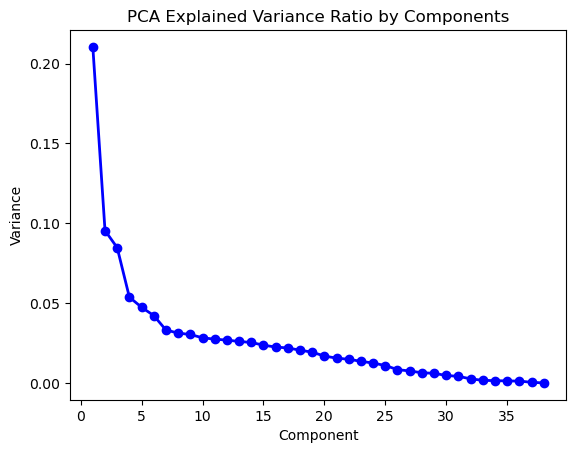

In [697]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = res.best_estimator_.named_steps['transform'].fit_transform(X)
X_std = StandardScaler().fit_transform(df)

pca = PCA(n_components=len(df.columns),random_state=0)
X_pca = pca.fit_transform(X_std)

components = np.arange(pca.n_components_) + 1
plt.plot(components, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('PCA Explained Variance Ratio by Components')
plt.xlabel('Component')
plt.ylabel('Variance')


In [32]:
test_path = 'kaggle/input/house-prices-advanced-regression-techniques/test.csv'
test = pd.read_csv(test_path)
test.isnull().any().to_frame().T

# k.describe()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0  False       False      True         True    False   False   True     False   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0        False       True      False      False         False       False   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       False     False       False        False        False      False   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0         False      False     False         True         True        True   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0        True      False      False       False      True      True   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0          True          True        True          True        True   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0       True         True    False      False       False       False   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0     False     False         False      False          True          True   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0     False     False         False         False         True         False   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  \
0        True       False         True        True         True          True   

   GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
0        True        True        True        True       False       False   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  \
0        False          False      False        False     False    True   

   Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0   True         True    False   False   False      True          False

In [72]:
def generateSubmission(model,path):
    test = pd.read_csv(path)
    X_test = test[dis_cols + ord_cols + ft_cat_cols] # Use same columns used in training
    ytestpreds = model.predict(X_test)
    ids = test['Id'].values.reshape(-1,1)
    prices = np.exp(ytestpreds).reshape(-1,1)
    ids.shape,prices.shape
    sub = pd.DataFrame(data=np.hstack((ids,prices)),
            columns=['Id','SalePrice'])
             
    sub['Id'] = sub['Id'].astype('int')
    sub.to_csv('test_submission.csv', index=False)


In [109]:
generateSubmission(est,'kaggle/input/house-prices-advanced-regression-techniques/test.csv')
# test = pd.read_csv('kaggle/input/house-prices-advanced-regression-techniques/test.csv', index_col='Id')
# X_test = test[dis_cols + ord_cols + ft_cat_cols] 
# df = est.named_steps['colimputers'].transform(X_test)
# df.info()

## Housing Features EDA

Before we can run correlation analysis with the target (SalesPrice), we need to understand the data behind each field and visualize.  Some fields are numeric but ordinal in nature which will require spearman vs pearson correlation, while certain features might have little to no correlation based on their values but contain latent data we can extract. 

In [ ]:
# First, start with the MSSubClass
show('MSSubClass')

MSSubClass: Identifies the type of dwelling involved in the sale.	
 
         20	1-STORY 1946 & NEWER ALL STYLES
         30	1-STORY 1945 & OLDER
         40	1-STORY W/FINISHED ATTIC ALL AGES
         45	1-1/2 STORY - UNFINISHED ALL AGES
         50	1-1/2 STORY FINISHED ALL AGES
         60	2-STORY 1946 & NEWER
         70	2-STORY 1945 & OLDER
         75	2-1/2 STORY ALL AGES
         80	SPLIT OR MULTI-LEVEL
         85	SPLIT FOYER
         90	DUPLEX - ALL STYLES AND AGES
        120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
        150	1-1/2 STORY PUD - ALL AGES
        160	2-STORY PUD - 1946 & NEWER
        180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
        190	2 FAMILY CONVERSION - ALL STYLES AND AGES
 



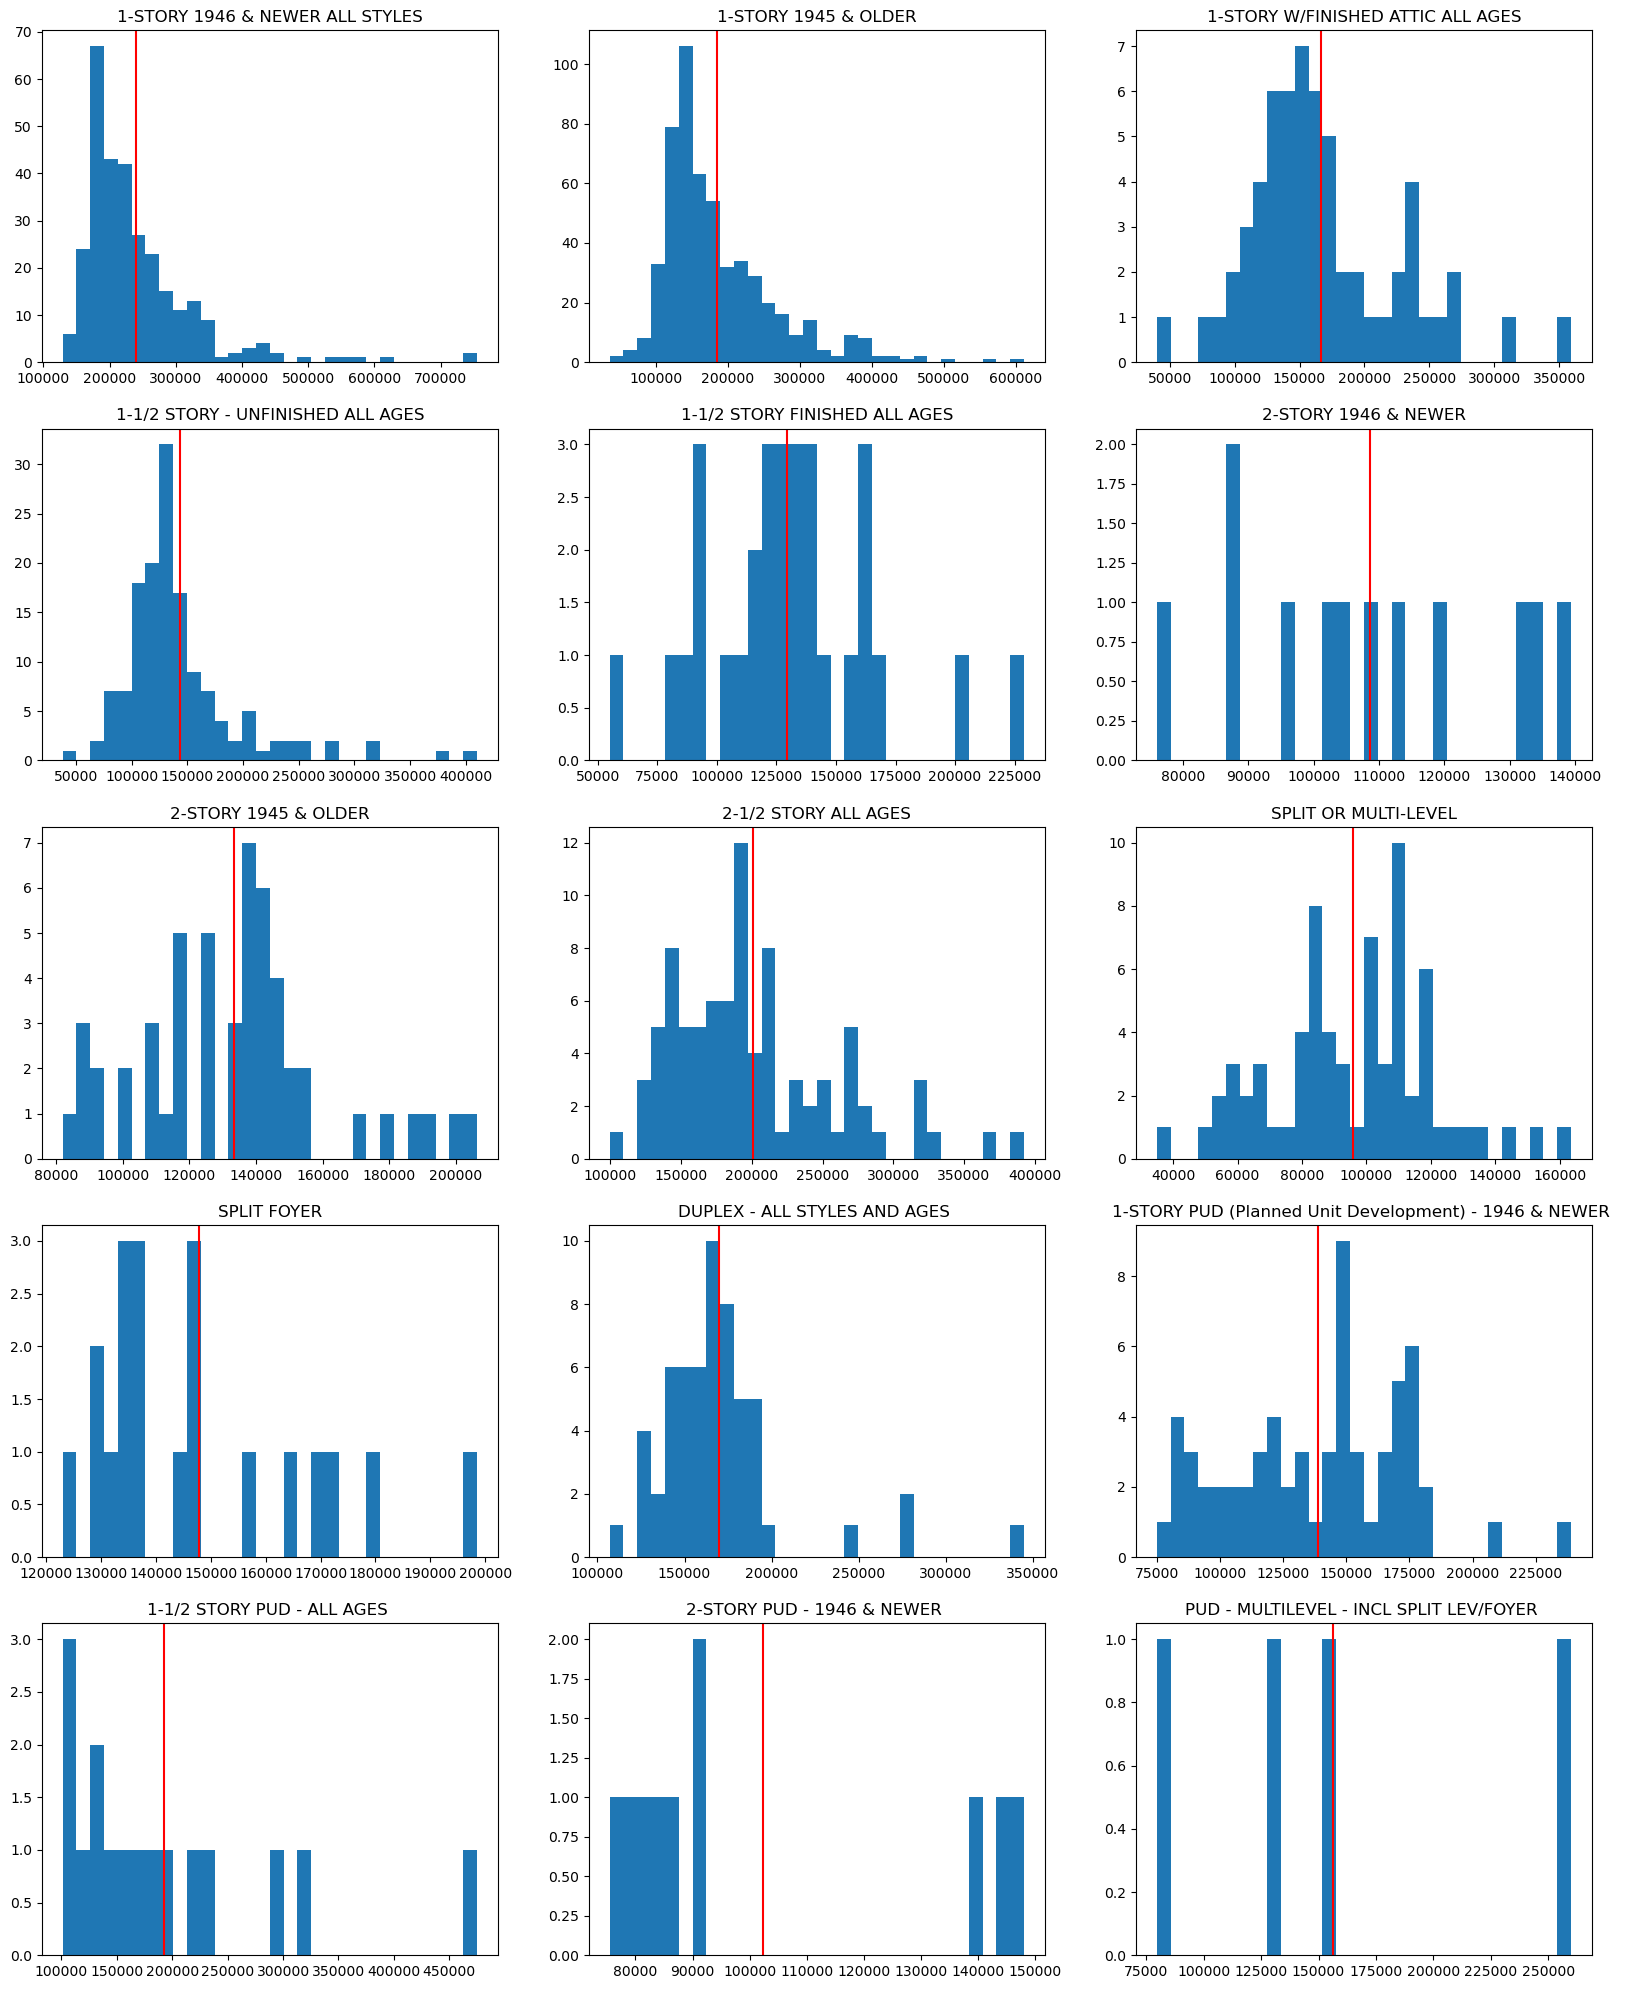

In [ ]:
docdict['MSSubClass']
newstr = re.sub(r'\s\s','',docdict['MSSubClass']['text'])
newstr = re.sub(r'[0-9]+\t','\t',newstr).split('\t')[1:]
newstr

fig, axes = plt.subplots(5,3,figsize=(20,25))
axes = axes.flatten()
for idx,cat in enumerate(train['MSSubClass'].unique()):    
    cat_df = train[train['MSSubClass']==cat]
    m = cat_df['SalePrice'].mean()
    axes[idx].hist(x=cat_df['SalePrice'],
                   bins=30)
    axes[idx].axvline(m, color = 'r', )
    axes[idx].set_title(f"{newstr[idx]}")


# plt.figure(figsize=(15,10))
# sns.boxplot(data=train,x='MSSubClass',y='SalePrice')

In [ ]:
#The graphs above show a large number of single-story homes that have fetched a higher price compared to their less frequent 2-story 
#counterparts.  One thing we can see is that duplex,multifamily properties are much less.  We can create an encoding to capture this.

In [ ]:
show('MSSubClass')

story =[90,190]
train['d_multi_fam'] = train['MSSubClass'].apply(lambda x: 1 if x in story else 0)
np.corrcoef(train['d_multi_fam'],train['SalePrice'])



MSSubClass: Identifies the type of dwelling involved in the sale.	
 
         20	1-STORY 1946 & NEWER ALL STYLES
         30	1-STORY 1945 & OLDER
         40	1-STORY W/FINISHED ATTIC ALL AGES
         45	1-1/2 STORY - UNFINISHED ALL AGES
         50	1-1/2 STORY FINISHED ALL AGES
         60	2-STORY 1946 & NEWER
         70	2-STORY 1945 & OLDER
         75	2-1/2 STORY ALL AGES
         80	SPLIT OR MULTI-LEVEL
         85	SPLIT FOYER
         90	DUPLEX - ALL STYLES AND AGES
        120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
        150	1-1/2 STORY PUD - ALL AGES
        160	2-STORY PUD - 1946 & NEWER
        180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
        190	2 FAMILY CONVERSION - ALL STYLES AND AGES
 



array([[ 1.        , -0.14995127],
       [-0.14995127,  1.        ]])

In [ ]:
lst_type = [20,30,40,45,50,120,150]
tst = train['MSSubClass'].apply(lambda x: 1 if x in lst_type and x not in story else 0)
np.corrcoef(tst,train['SalePrice'])


array([[ 1.        , -0.14383158],
       [-0.14383158,  1.        ]])

In [ ]:
# 2-Story 1946 and newer houses (60) are the price leaders of the class in IQR
# Planned Unit Developments of 1946 or later are high second highest
# Followed by 1-Story 1946 and Newer models

# Conversely 1-story older models are the lowest priced
# it might be worht lumping these based on stories

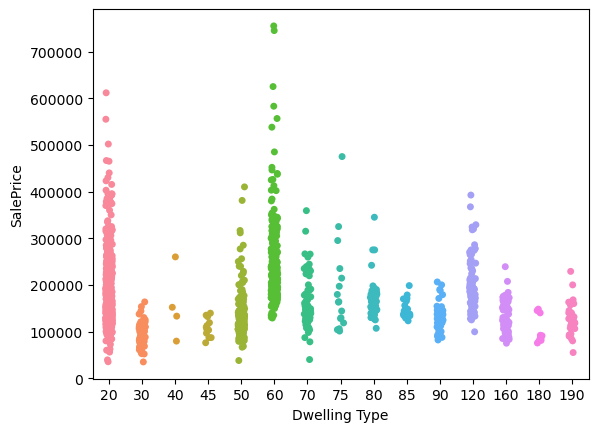

In [ ]:
sns.stripplot(data=train,
            x='MSSubClass',y='SalePrice')
plt.xlabel('Dwelling Type');

In [ ]:
show('MSZoning')

MSZoning: Identifies the general zoning classification of the sale.
 		
        A	Agriculture
        C	Commercial
        FV	Floating Village Residential
        I	Industrial
        RH	Residential High Density
        RL	Residential Low Density
        RP	Residential Low Density Park 
        RM	Residential Medium Density
 	



In [ ]:

train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

<Figure size 1000x1000 with 0 Axes>

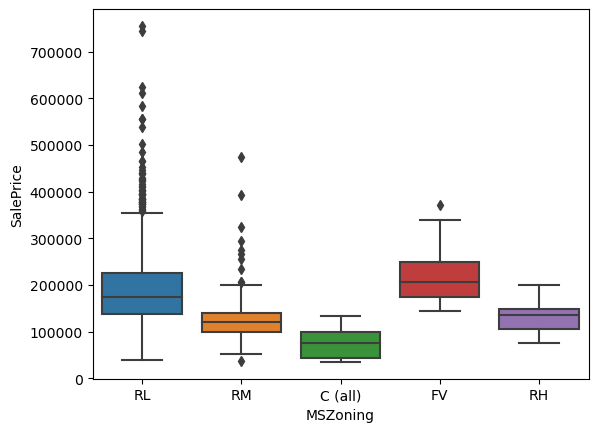

<Figure size 1000x1000 with 0 Axes>

In [ ]:
#Looks like all of the categories are not represented in training set. 

sns.boxplot(data=train,
           x='MSZoning',
           y='SalePrice')
plt.figure(figsize=(10,10))

In [ ]:
#Floating Village has the highest median sales price though RL (Residential Low Density) has the widest range
# and several high priced outliers.  However, there are not a substantial number of these

# Commerical zoning appears to have the lowest sales prices


train['d_residential'] = train['MSZoning'].apply(lambda x: 1 if x != 'C (all)' else 0)
np.corrcoef(train['d_residential'],train['SalePrice'])


array([[1.        , 0.11125658],
       [0.11125658, 1.        ]])

LotFrontage: Linear feet of street connected to property
 

Num Missing / Missing Percentage: 259 0.1773972602739726


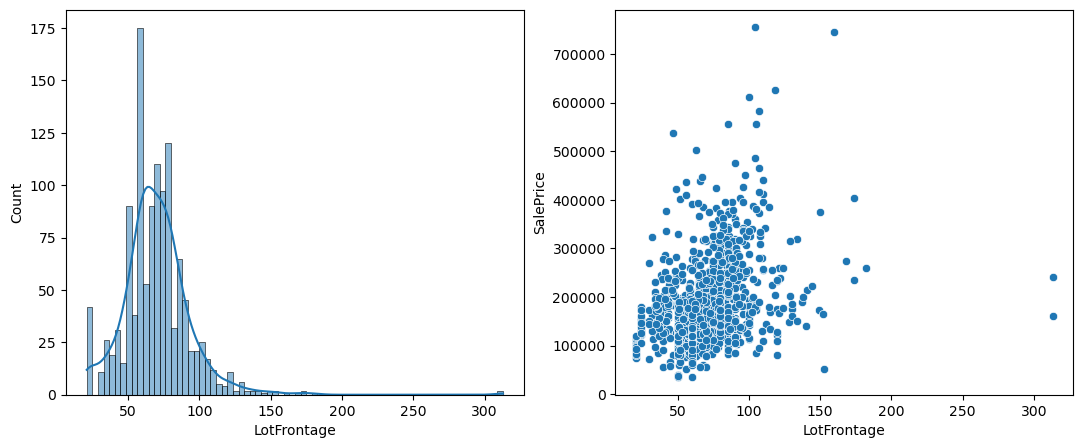

In [ ]:
show('LotFrontage')
print('Num Missing / Missing Percentage:',train['LotFrontage'].isnull().sum(),train['LotFrontage'].isnull().sum() / len(train) )

fig,ax = plt.subplots(1,2,figsize=(13,5))


sns.histplot(x=train['LotFrontage'],kde=True, ax=ax[0]);

sns.scatterplot(data=train,
               x='LotFrontage',
               y='SalePrice',
               ax=ax[1]);

LotArea: Lot size in square feet
 



<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

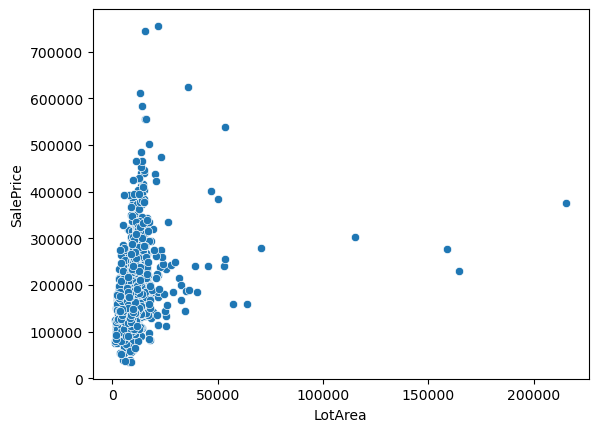

In [ ]:
show('LotArea')

sns.scatterplot(data=train,
           x='LotArea',
           y='SalePrice')

Street: Type of road access to property
 
        Grvl	Gravel	
        Pave	Paved
        	



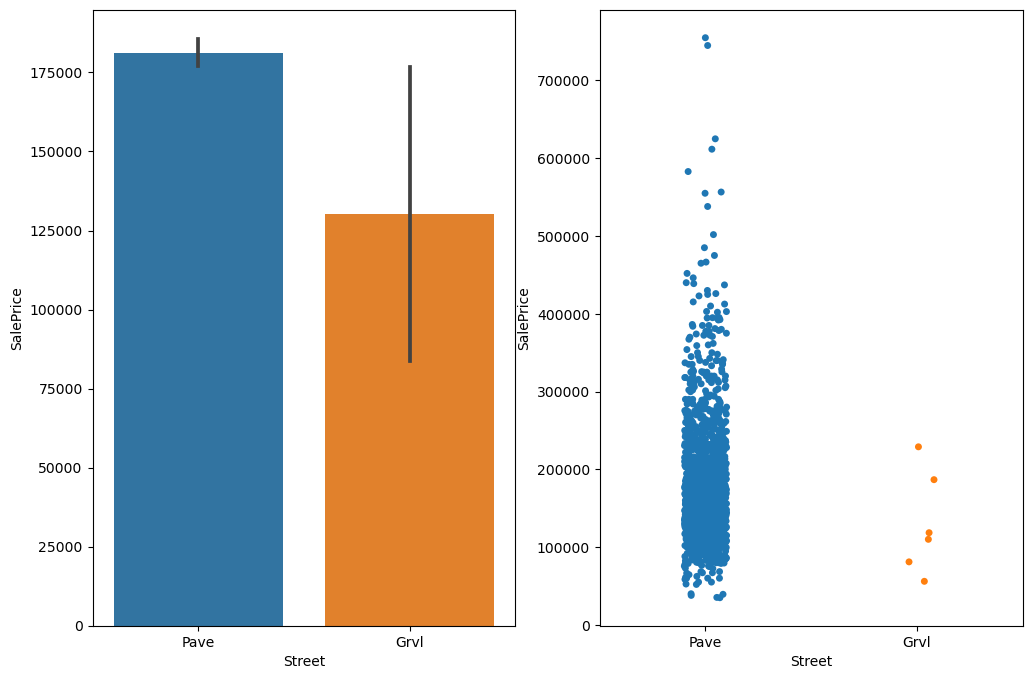

In [ ]:
show("Street")

fig, ax = plt.subplots(1,2,figsize=(12,8))

sns.barplot(data=train,
           x='Street',
           y='SalePrice',
           ax=ax[0])

sns.stripplot(data=train,
               x='Street',
               y='SalePrice',
               ax=ax[1]);

In [ ]:
# Properties on Paved streets have a higher average sales price but there are so few
# examples of Gravel that it's not a very good comparison (esp since there's a large range among
# the few points)

In [ ]:
show('Alley')
print(train['Alley'].isnull().sum())
train['Alley'].value_counts()


Alley: Type of alley access to property
 
        Grvl	Gravel
        Pave	Paved
        NA 	No alley access
 		

1369


Grvl    50
Pave    41
Name: Alley, dtype: int64

In [ ]:
#There are not enough entries to make this a high-information field. We may 
# need to revisit this later to see if there are fields that inform these values

In [ ]:
show('LotShape')
print(train['LotShape'].isnull().sum())
train['LotShape'].value_counts()

LotShape: General shape of property
 
        Reg	Regular	
        IR1	Slightly irregular
        IR2	Moderately Irregular
        IR3	Irregular
        

0


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

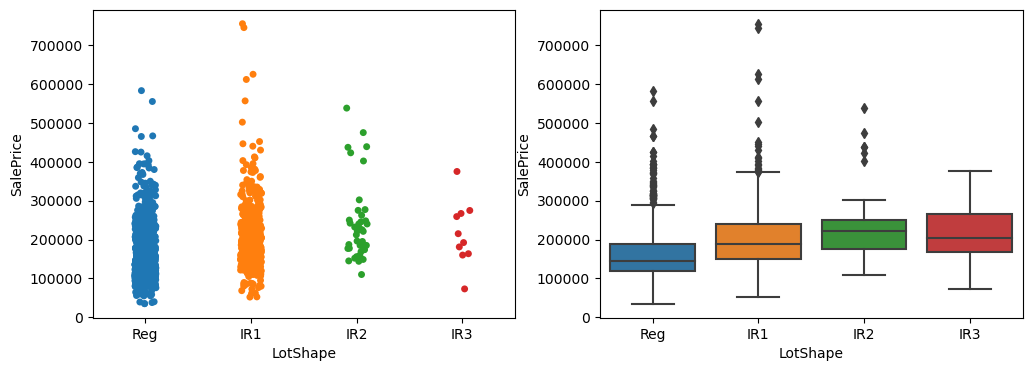

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
sns.stripplot(data=train,
             x='LotShape',
             y='SalePrice',
             ax=ax[0])

sns.boxplot(data=train,
           x='LotShape',
           y='SalePrice',
           ax=ax[1])

# Most of the losts are regular sized and shows that the median sale price compared to
# to the other lot types is lower.  IR1 has a higher median value and IQR, upper QTR and larger range of
# outliers compared to Reg.  IR2 shows a narrower range of IQR compared to the others but makes sense compared
# to the fewer examples.  IR3 is too few data points causing a larger variance in the data

In [ ]:
# It seems we can gain some decent information from checking if the property
# is Regular Lot Shape (cheaper) or not

#Grab the mean  house price based on the different lot shape
lotagg = train.groupby('LotShape')['SalePrice'].agg(['mean','median','std'])
train['d_mean_lotshape'] = train['LotShape'].apply(lambda x: lotagg.loc[x,'mean'])
train[['d_mean_lotshape','SalePrice']].corr()


d_mean_lotshape  SalePrice
d_mean_lotshape         1.000000   0.276362
SalePrice               0.276362   1.000000

In [ ]:
show('LandContour')
#assumption: the less flatness the greater the price

LandContour: Flatness of the property
 
        Lvl	Near Flat/Level	
        Bnk	Banked - Quick and significant rise from street grade to building
        HLS	Hillside - Significant slope from side to side
        Low	Depression
 		



<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

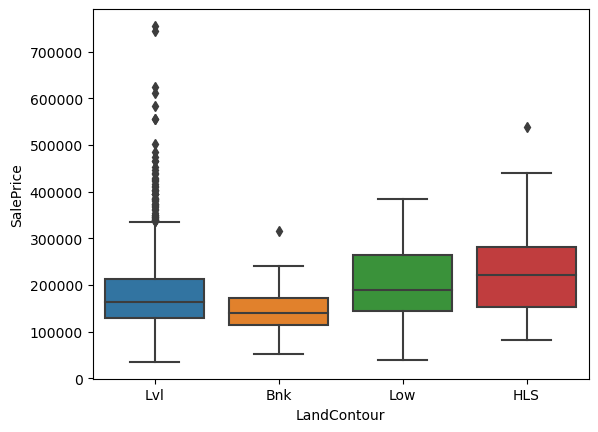

In [ ]:
sns.boxplot(data=train, x='LandContour',y='SalePrice')

In [ ]:
# There are quite a few outliers for Lvl (it's also the most
# Dominant class).  This may make it a less useful predictor of
# saleprice. 

train[train['LandContour']=='Lvl'][['SalePrice']].describe()

SalePrice
count    1311.000000
mean   180183.746758
std     78463.567918
min     34900.000000
25%    130000.000000
50%    162900.000000
75%    212000.000000
max    755000.000000

In [ ]:
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
show('Utilities')
print(train['Utilities'].isnull().sum())

Utilities: Type of utilities available
 		
        AllPub	All public Utilities (E,G,W,& S)	
        NoSewr	Electricity, Gas, and Water (Septic Tank)
        NoSeWa	Electricity and Gas Only
        ELO	Electricity only	
 	

0


In [ ]:
train['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig: Lot configuration
 
        Inside	Inside lot
        Corner	Corner lot
        CulDSac	Cul-de-sac
        FR2	Frontage on 2 sides of property
        FR3	Frontage on 3 sides of property
 	



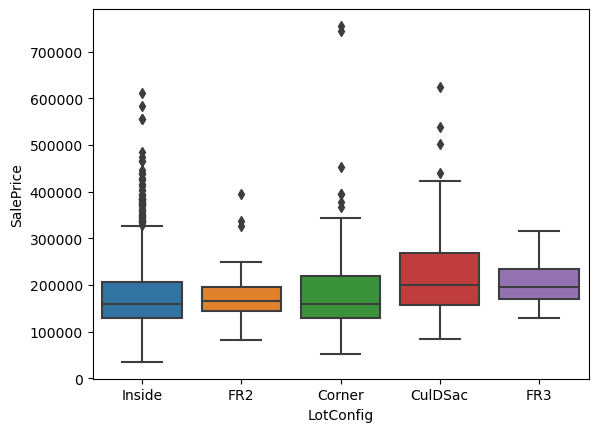

In [ ]:
# Utilities is not a helpful column.

show('LotConfig')
train['LotConfig'].value_counts()
get_box_plot('LotConfig')

tst = train['LotConfig'].apply(lambda x: 'Inside' if x == 'Inside' else 'Other')

# sns.boxplot(x=tst, y=train['SalePrice'])

LandSlope: Slope of property
 		
        Gtl	Gentle slope
        Mod	Moderate Slope	
        Sev	Severe Slope
 	



Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

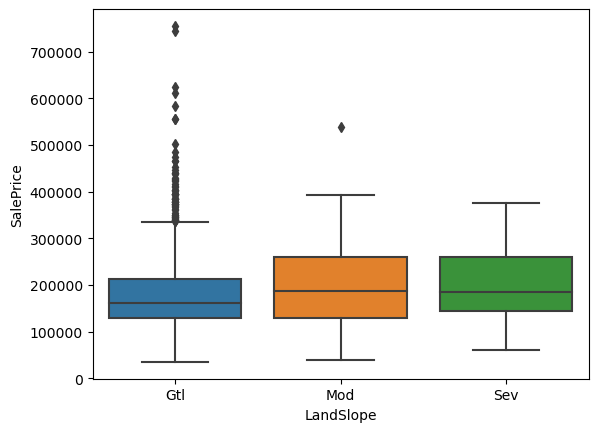

In [ ]:
show('LandSlope')
get_box_plot('LandSlope')
train['LandSlope'].value_counts()

In [ ]:
overall = train['SalePrice'].describe()
print(overall)
neighbs = train.groupby('Neighborhood')['SalePrice'].agg(['mean','median','min','max']).sort_values('mean',ascending=False)
neighbs

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


mean    median     min     max
Neighborhood                                         
NoRidge       335295.317073  301500.0  190000  755000
NridgHt       316270.623377  315000.0  154000  611657
StoneBr       310499.000000  278000.0  170000  556581
Timber        242247.447368  228475.0  137500  378500
Veenker       238772.727273  218000.0  162500  385000
Somerst       225379.837209  225500.0  144152  423000
ClearCr       212565.428571  200250.0  130000  328000
Crawfor       210624.725490  200624.0   90350  392500
CollgCr       197965.773333  197200.0  110000  424870
Blmngtn       194870.882353  191000.0  159895  264561
Gilbert       192854.506329  181000.0  141000  377500
NWAmes        189050.068493  182900.0   82500  299800
SawyerW       186555.796610  179900.0   76000  320000
Mitchel       156270.122449  153500.0   84500  271000
NAmes         145847.080000  140000.0   87500  345000
NPkVill       142694.444444  146000.0  127500  155000
SWISU         142591.360000  139500.0   60000  200000
Blueste       137500.000000  137500.0  124000  151000
Sawyer        136793.135135  135000.0   62383  190000
OldTown       128225.300885  119000.0   37900  475000
Edwards       128219.700000  121750.0   58500  320000
BrkSide       124834.051724  124300.0   39300  223500
BrDale        104493.750000  106000.0   83000  125000
IDOTRR        100123.783784  103000.0   34900  169500
MeadowV        98576.470588   88000.0   75000  151400

In [ ]:
# We'll divide neighborhoods into three groups:lower, mid and high using the training set's IQR
def create_neighborhood_ratings():
    prices = (train.groupby('Neighborhood')['SalePrice']
              .agg(['mean','median'])
              .sort_values('mean',ascending=False))
    
    low = set(prices[prices['mean'] < 130000].index)
    high = set(prices[prices['mean'] > overall.loc['75%']].index)
    btn = set(prices.index) - low - high
    return low, high, btn

low, high, btn = create_neighborhood_ratings()


train['d_mean_neighbor_price'] = train['Neighborhood'].apply(lambda x: neighbs.loc[x,'mean'])
# train['d_median_neighbor_price'] = train['Neighborhood'].apply(lambda x: neighbs.loc[x,'median'])
# train['d_min_neighbor_price'] = train['Neighborhood'].apply(lambda x: neighbs.loc[x,'min'])
# train['d_max_neighbor_price'] = train['Neighborhood'].apply(lambda x: neighbs.loc[x,'max'])



In [ ]:
train[['d_mean_neighbor_price','d_median_neighbor_price',
       'd_min_neighbor_price','d_max_neighbor_price',
       'SalePrice']].corr()

KeyError: "['d_median_neighbor_price', 'd_min_neighbor_price', 'd_max_neighbor_price'] not in index"

In [ ]:
# Pretty significant correlation btn mean and median prices for each neighborhood
# I feel either could be very helpful determining sale price

In [ ]:
from sklearn.model_selection import train_test_split

cols = get_columns_by_type()
X_cols = cols[0]
# X_cols = [x for x in train.columns if train[x].dtypes in ['int64','float64'] and x not in ord_cols]
# X_cols.remove('d_max_neighbor_price')
# X_cols.remove('d_min_neighbor_price')
# X_cols.remove('d_median_neighbor_price')
# X_cols.remove('d_multi_fam')
# X_cols.remove('d_residential')
# X_cols = X_cols[:3]

X_cols = [x for x in X_cols if x != 'SalePrice']
X = train[X_cols]
y = np.log(train['SalePrice'])

X_train,X_test,y_train, y_test = train_test_split(X,y,
                                                  test_size=.1,
                                                  random_state=0)



In [ ]:
X_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'd_house_age',
 'd_multi_fam',
 'd_residential',
 'd_mean_lotshape',
 'd_mean_neighbor_price']

In [ ]:
# Create a pipeline with the same procedure for imputation and 
# add scaling.  Run Gridsearch (if I choose to run a lot of variations)
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

pipe = Pipeline([('impute',IterativeImputer()),
                 ('scaling',StandardScaler()),
                 ('model',LinearRegression())
                ])



params = {
    'impute__sample_posterior':[True],
    'impute__max_iter': [10],
    'impute__n_nearest_features': [2,3,4],
    'impute__random_state' : [0]
}


grid = GridSearchCV(pipe,
                    param_grid=params,
                    scoring=make_scorer(mean_squared_error,
                                        squared=False),
                    cv=10,
                    n_jobs=-1,
                    return_train_score=True
                   )


res = grid.fit(X_train, y_train)
pd.DataFrame(res.cv_results_).T.loc[['mean_test_score','mean_train_score']]



0         1         2
mean_test_score   0.146939  0.146849  0.146725
mean_train_score  0.135248  0.135338  0.135415

In [ ]:
features = np.array(X_cols)
print(features[np.argsort(res.best_estimator_['model'].coef_)[::-1]])

coefs = pd.DataFrame(index=features,
             data=res.best_estimator_['model'].coef_,
            columns=['value'])

coefs['value'] = pd.to_numeric(coefs['value'])
coefs
# ary = abs(res.best_estimator_['model'].coef_)
# sort = np.argsort(ary)[::-1]
# X.columns[sort],ary


['2ndFlrSF' '1stFlrSF' 'LowQualFinSF' 'YrSold' 'BsmtFinSF1' 'BsmtUnfSF'
 'BsmtFinSF2' 'OverallQual' 'd_mean_neighbor_price' 'OverallCond'
 'GarageCars' 'BsmtFullBath' 'TotRmsAbvGrd' 'Fireplaces' 'd_residential'
 'YearRemodAdd' 'ScreenPorch' 'FullBath' 'd_multi_fam' 'LotArea'
 'WoodDeckSF' 'HalfBath' 'EnclosedPorch' 'GarageArea' '3SsnPorch'
 'BsmtHalfBath' 'd_mean_lotshape' 'OpenPorchSF' 'GarageYrBlt' 'MoSold'
 'BedroomAbvGr' 'MiscVal' 'LotFrontage' 'MasVnrArea' 'PoolArea'
 'KitchenAbvGr' 'MSSubClass' 'TotalBsmtSF' 'YearBuilt' 'd_house_age'
 'GrLivArea']


value
MSSubClass            -2.933994e-02
LotFrontage           -5.797751e-03
LotArea                1.378979e-02
OverallQual            9.229525e-02
OverallCond            5.435933e-02
YearBuilt             -1.528384e+10
YearRemodAdd           2.131060e-02
MasVnrArea            -6.508873e-03
BsmtFinSF1             5.135970e+08
BsmtFinSF2             1.764529e+08
BsmtUnfSF              4.896271e+08
TotalBsmtSF           -4.903604e+08
1stFlrSF               4.304317e+10
2ndFlrSF               4.870800e+10
LowQualFinSF           5.506797e+09
GrLivArea             -5.854499e+10
BsmtFullBath           3.292943e-02
BsmtHalfBath           7.736124e-03
FullBath               1.686528e-02
HalfBath               1.296072e-02
BedroomAbvGr          -7.817334e-04
KitchenAbvGr          -1.934739e-02
TotRmsAbvGrd           3.144572e-02
Fireplaces             2.914017e-02
GarageYrBlt            9.422880e-04
GarageCars             4.349106e-02
GarageArea             8.807510e-03
WoodDeckSF             1.330390e-02
OpenPorchSF            2.356259e-03
EnclosedPorch          9.605092e-03
3SsnPorch              8.232408e-03
ScreenPorch            1.954190e-02
PoolArea              -1.281624e-02
MiscVal               -1.186210e-03
MoSold                 6.844189e-04
YrSold                 6.704788e+08
d_house_age           -1.530655e+10
d_multi_fam            1.686022e-02
d_residential          2.684396e-02
d_mean_lotshape        3.515282e-03
d_mean_neighbor_price  7.890443e-02

In [ ]:
train[['d_mean_neighbor_price','SalePrice']].corr()

d_mean_neighbor_price  SalePrice
d_mean_neighbor_price                1.00000    0.73863
SalePrice                            0.73863    1.00000

In [ ]:
show('Condition1')

Condition1: Proximity to various conditions
 	
        Artery	Adjacent to arterial street
        Feedr	Adjacent to feeder street	
        Norm	Normal	
        RRNn	Within 200' of North-South Railroad
        RRAn	Adjacent to North-South Railroad
        PosN	Near positive off-site feature--park, greenbelt, etc.
        PosA	Adjacent to postive off-site feature
        RRNe	Within 200' of East-West Railroad
        RRAe	Adjacent to East-West Railroad
 	



In [ ]:
train['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [ ]:
# sns.boxplot(data=train,
#            x='Condition1',
#            y='SalePrice')

In [ ]:
# show('Condition2')
# sns.boxplot(data=train,
#            x='Condition2',
#            y='SalePrice')

In [ ]:
cross_cond =train.groupby(['Condition1',
               'Condition2'])['SalePrice'].agg(['count','mean','median','min','max']).reset_index()

cool= train.apply(lambda x: cross_cond[(cross_cond['Condition1']==x['Condition1']) &
                                      (cross_cond['Condition2']==x['Condition2'])][['mean']] ,axis=1)

In [ ]:
np.corrcoef(tst,train['SalePrice'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

There are a lot of categorical features to evaluate. In order to see the data, I'm going to incorporate my documentation display function to make it easy to interpret the categories along with two visualizations - a box and whisker plot an a stripplot. Both will be helpful in understanding the distributions of the feature's categories. I like the boxplot as it will give me information like Intra Quartile Range and I'll overlay the mean to see the disparity btn the median.  I like the stripplot for visualizing the density of points.  This is beneficial as for seeing categorical imbalances that would be missed in the boxplot. After I run this, I'll manually go through each variable and take note of their available values and distributions.

MSZoning: Identifies the general zoning classification of the sale.
 		
        A	Agriculture
        C	Commercial
        FV	Floating Village Residential
        I	Industrial
        RH	Residential High Density
        RL	Residential Low Density
        RP	Residential Low Density Park 
        RM	Residential Medium Density
 	



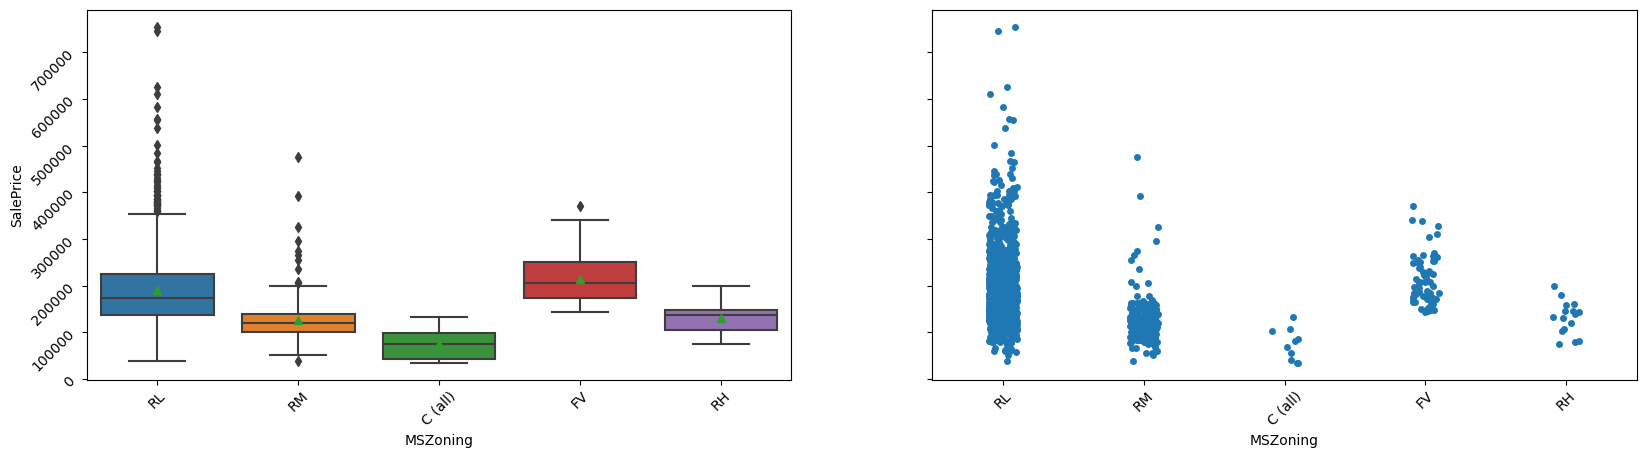

Street: Type of road access to property
 
        Grvl	Gravel	
        Pave	Paved
        	



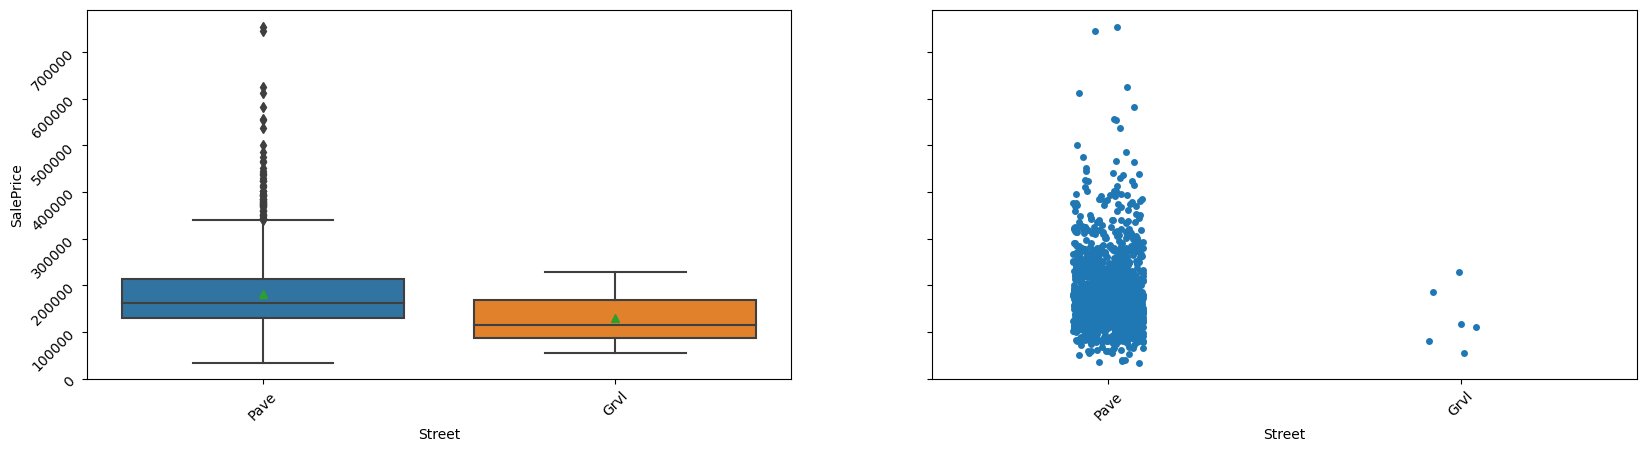

Alley: Type of alley access to property
 
        Grvl	Gravel
        Pave	Paved
        NA 	No alley access
 		



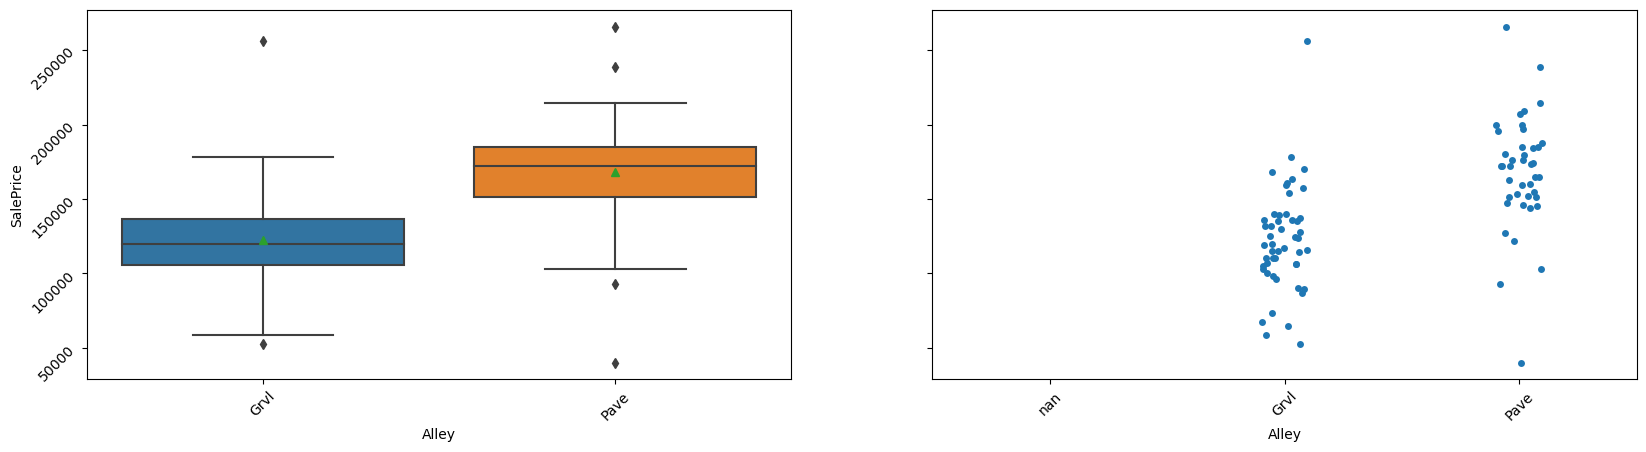

LotShape: General shape of property
 
        Reg	Regular	
        IR1	Slightly irregular
        IR2	Moderately Irregular
        IR3	Irregular
        



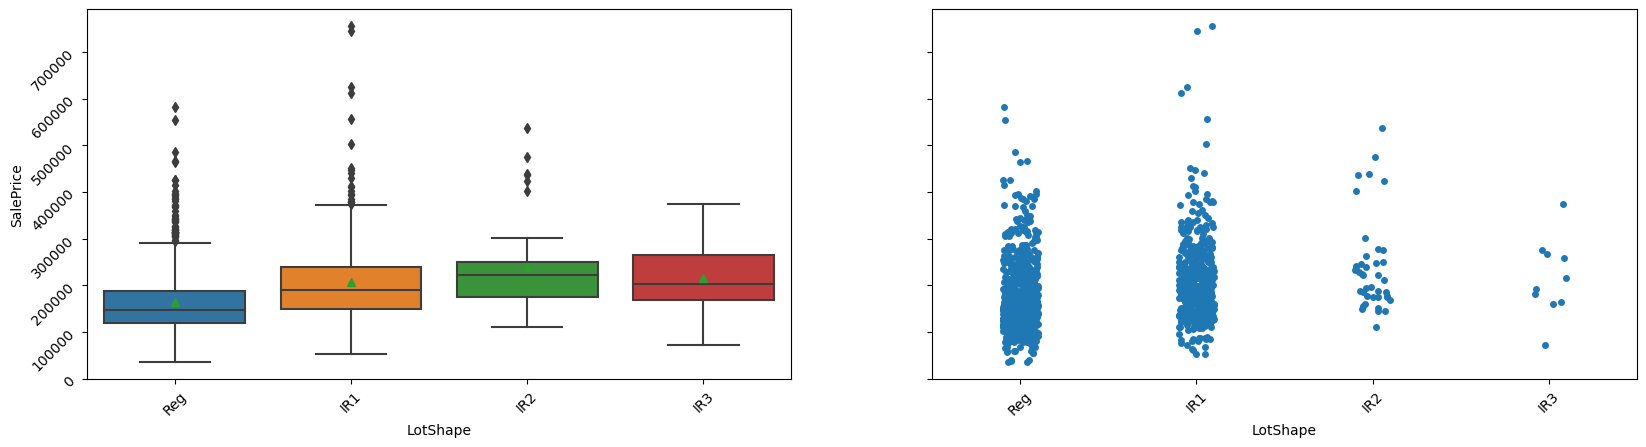

LandContour: Flatness of the property
 
        Lvl	Near Flat/Level	
        Bnk	Banked - Quick and significant rise from street grade to building
        HLS	Hillside - Significant slope from side to side
        Low	Depression
 		



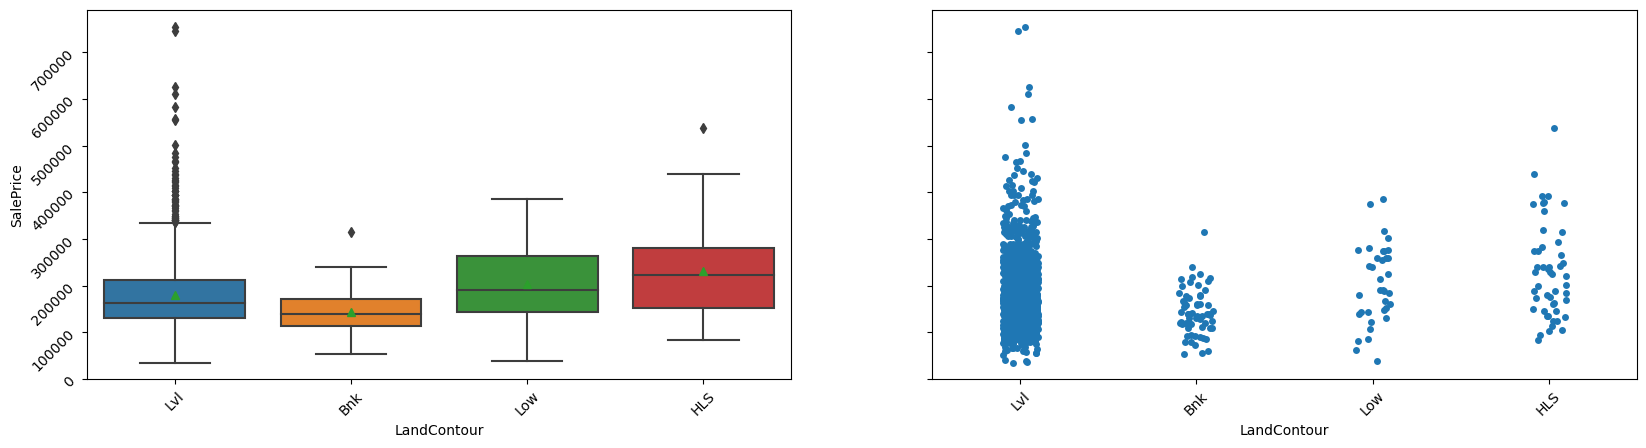

Utilities: Type of utilities available
 		
        AllPub	All public Utilities (E,G,W,& S)	
        NoSewr	Electricity, Gas, and Water (Septic Tank)
        NoSeWa	Electricity and Gas Only
        ELO	Electricity only	
 	



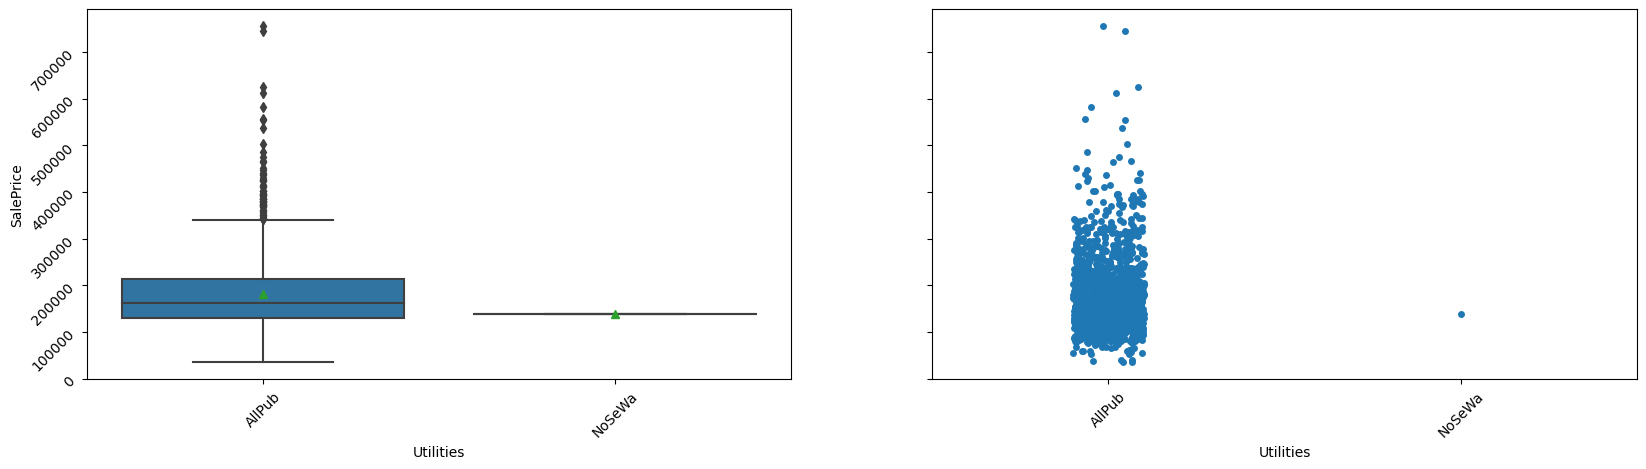

LotConfig: Lot configuration
 
        Inside	Inside lot
        Corner	Corner lot
        CulDSac	Cul-de-sac
        FR2	Frontage on 2 sides of property
        FR3	Frontage on 3 sides of property
 	



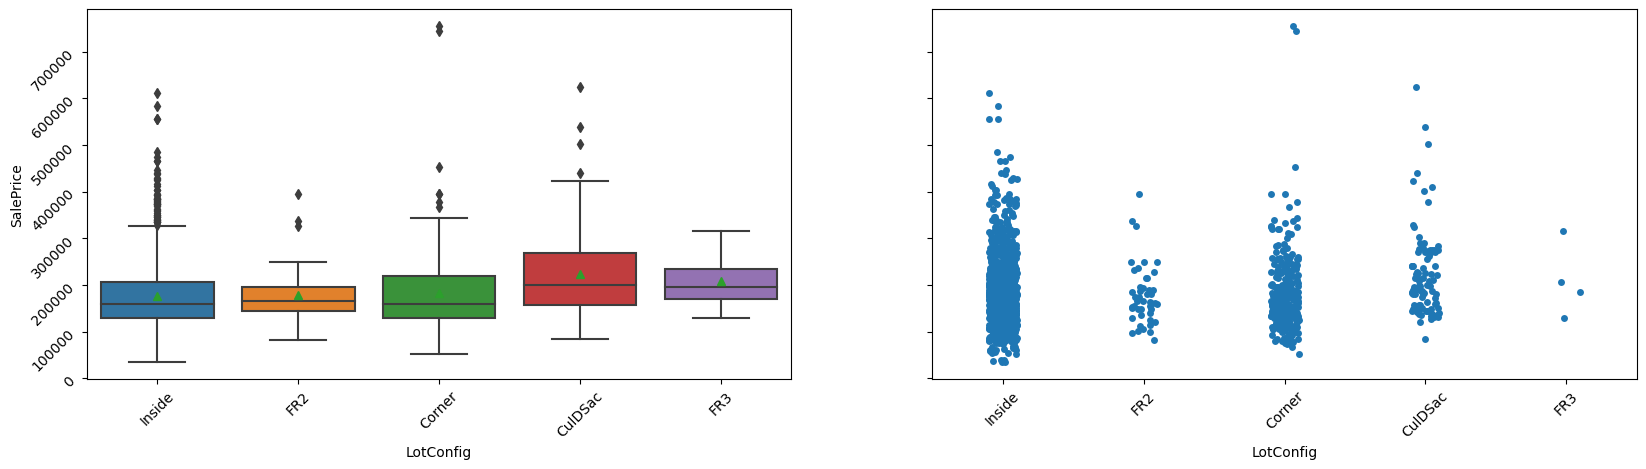

LandSlope: Slope of property
 		
        Gtl	Gentle slope
        Mod	Moderate Slope	
        Sev	Severe Slope
 	



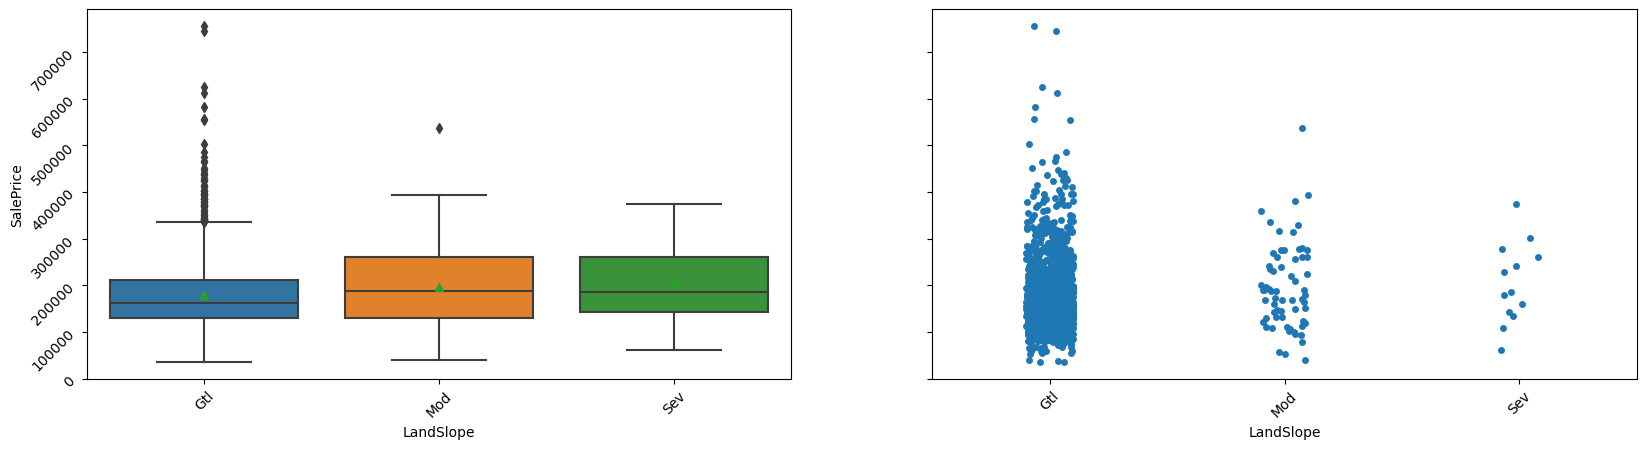

Neighborhood: Physical locations within Ames city limits
 
        Blmngtn	Bloomington Heights
        Blueste	Bluestem
        BrDale	Briardale
        BrkSide	Brookside
        ClearCr	Clear Creek
        CollgCr	College Creek
        Crawfor	Crawford
        Edwards	Edwards
        Gilbert	Gilbert
        IDOTRR	Iowa DOT and Rail Road
        MeadowV	Meadow Village
        Mitchel	Mitchell
        Names	North Ames
        NoRidge	Northridge
        NPkVill	Northpark Villa
        NridgHt	Northridge Heights
        NWAmes	Northwest Ames
        OldTown	Old Town
        SWISU	South & West of Iowa State University
        Sawyer	Sawyer
        SawyerW	Sawyer West
        Somerst	Somerset
        StoneBr	Stone Brook
        Timber	Timberland
        Veenker	Veenker
 			



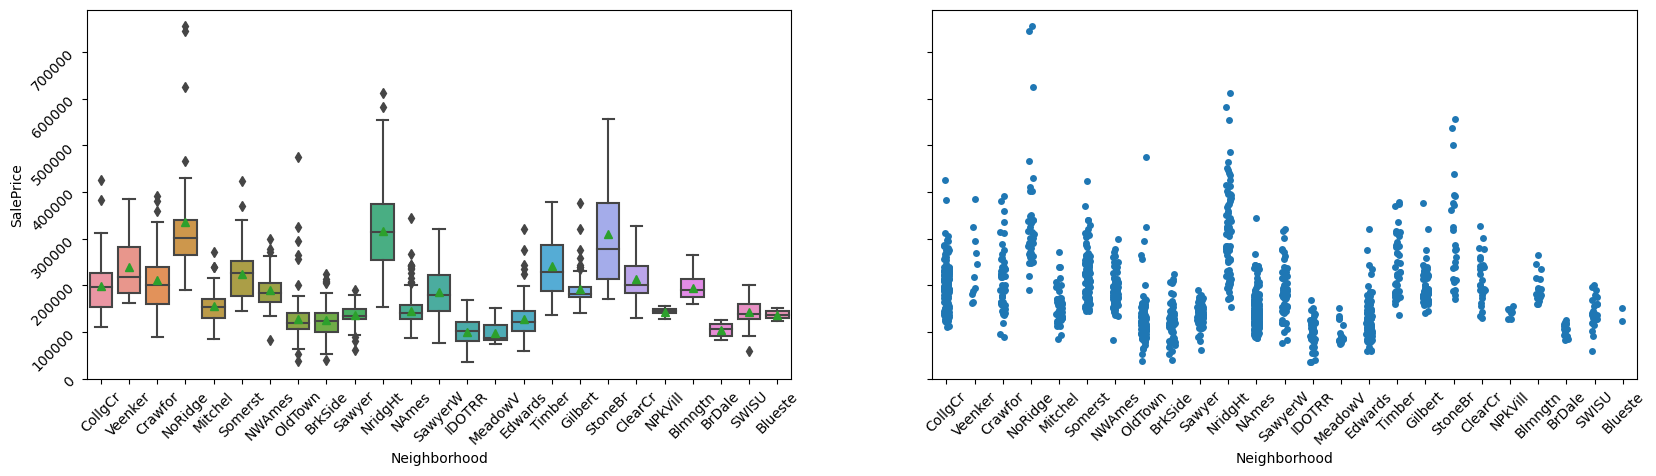

Condition1: Proximity to various conditions
 	
        Artery	Adjacent to arterial street
        Feedr	Adjacent to feeder street	
        Norm	Normal	
        RRNn	Within 200' of North-South Railroad
        RRAn	Adjacent to North-South Railroad
        PosN	Near positive off-site feature--park, greenbelt, etc.
        PosA	Adjacent to postive off-site feature
        RRNe	Within 200' of East-West Railroad
        RRAe	Adjacent to East-West Railroad
 	



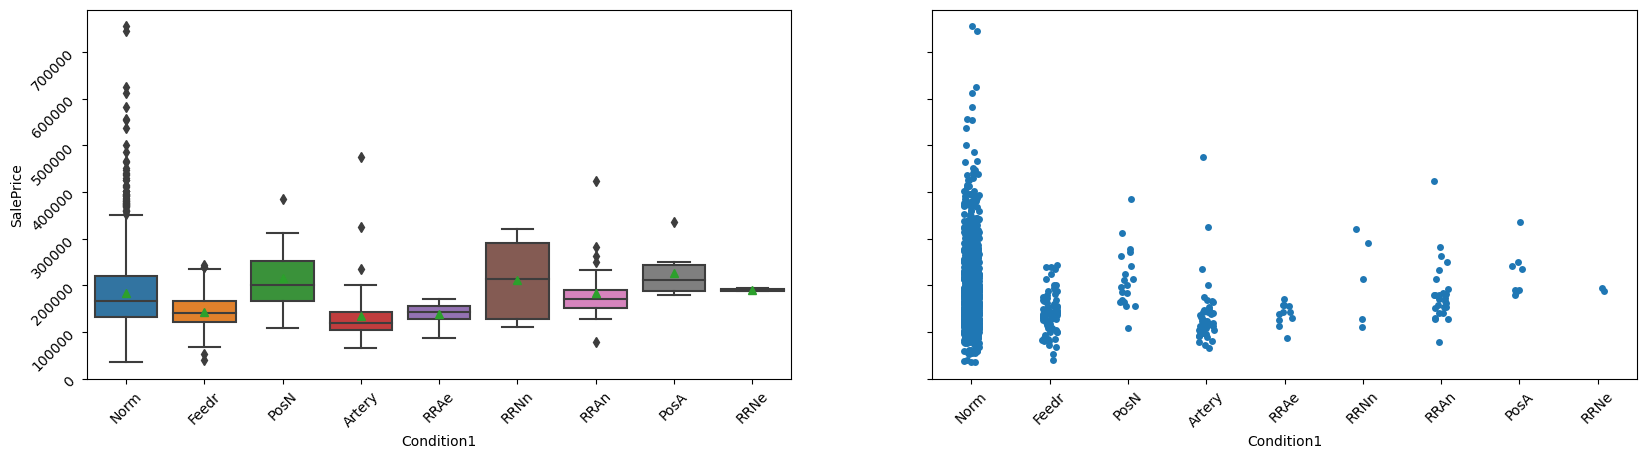

Condition2: Proximity to various conditions (if more than one is present)
 		
        Artery	Adjacent to arterial street
        Feedr	Adjacent to feeder street	
        Norm	Normal	
        RRNn	Within 200' of North-South Railroad
        RRAn	Adjacent to North-South Railroad
        PosN	Near positive off-site feature--park, greenbelt, etc.
        PosA	Adjacent to postive off-site feature
        RRNe	Within 200' of East-West Railroad
        RRAe	Adjacent to East-West Railroad
 	



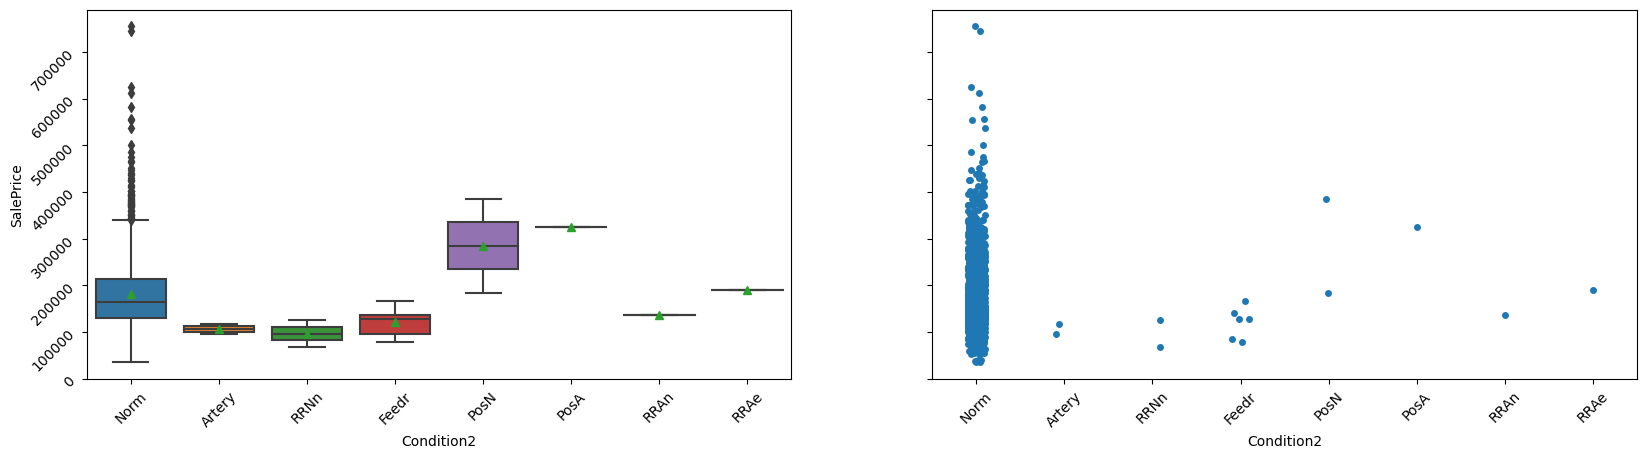

BldgType: Type of dwelling
 		
        1Fam	Single-family Detached	
        2FmCon	Two-family Conversion; originally built as one-family dwelling
        Duplx	Duplex
        TwnhsE	Townhouse End Unit
        TwnhsI	Townhouse Inside Unit
 	



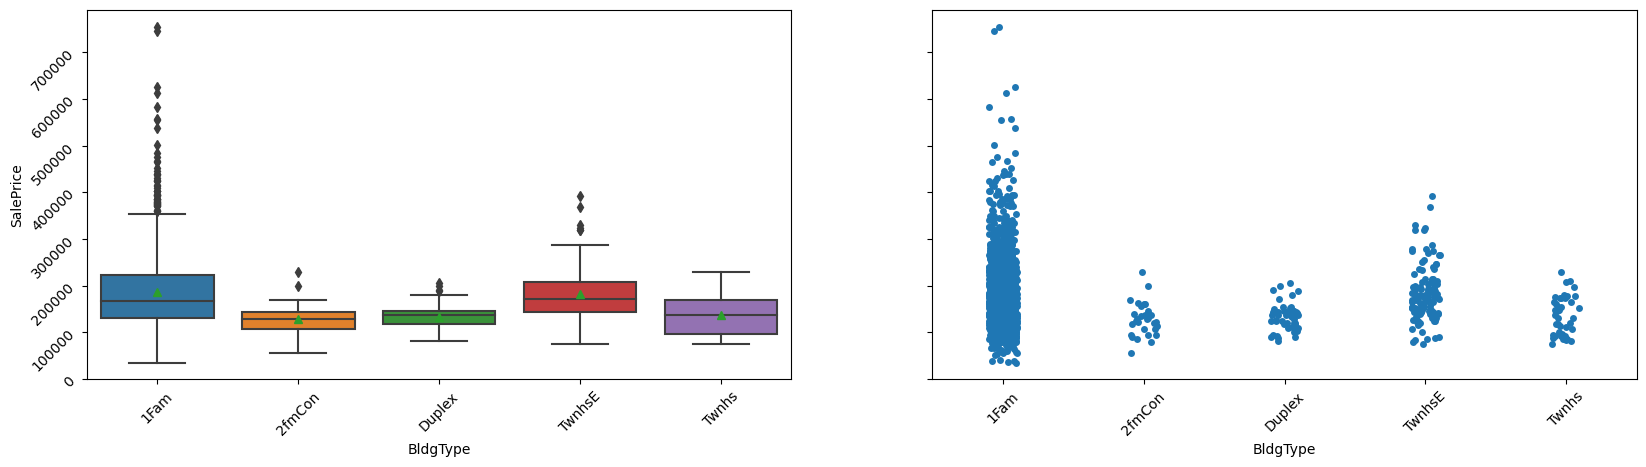

HouseStyle: Style of dwelling
 	
        1Story	One story
        1.5Fin	One and one-half story: 2nd level finished
        1.5Unf	One and one-half story: 2nd level unfinished
        2Story	Two story
        2.5Fin	Two and one-half story: 2nd level finished
        2.5Unf	Two and one-half story: 2nd level unfinished
        SFoyer	Split Foyer
        SLvl	Split Level
 	



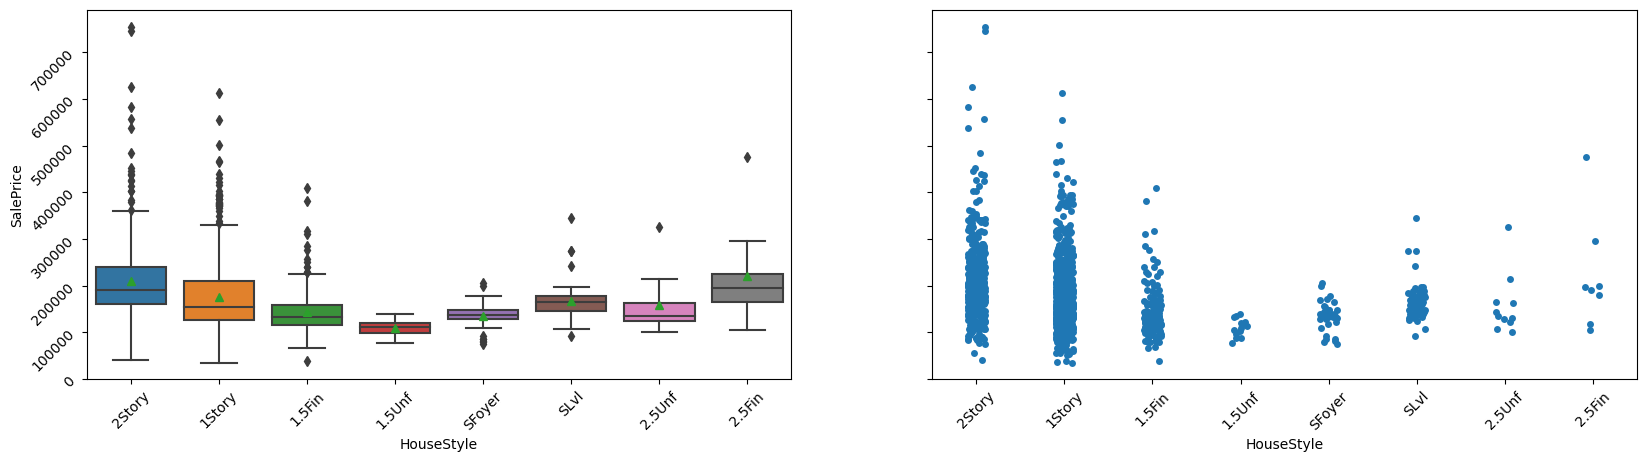

RoofStyle: Type of roof
 
        Flat	Flat
        Gable	Gable
        Gambrel	Gabrel (Barn)
        Hip	Hip
        Mansard	Mansard
        Shed	Shed
 		



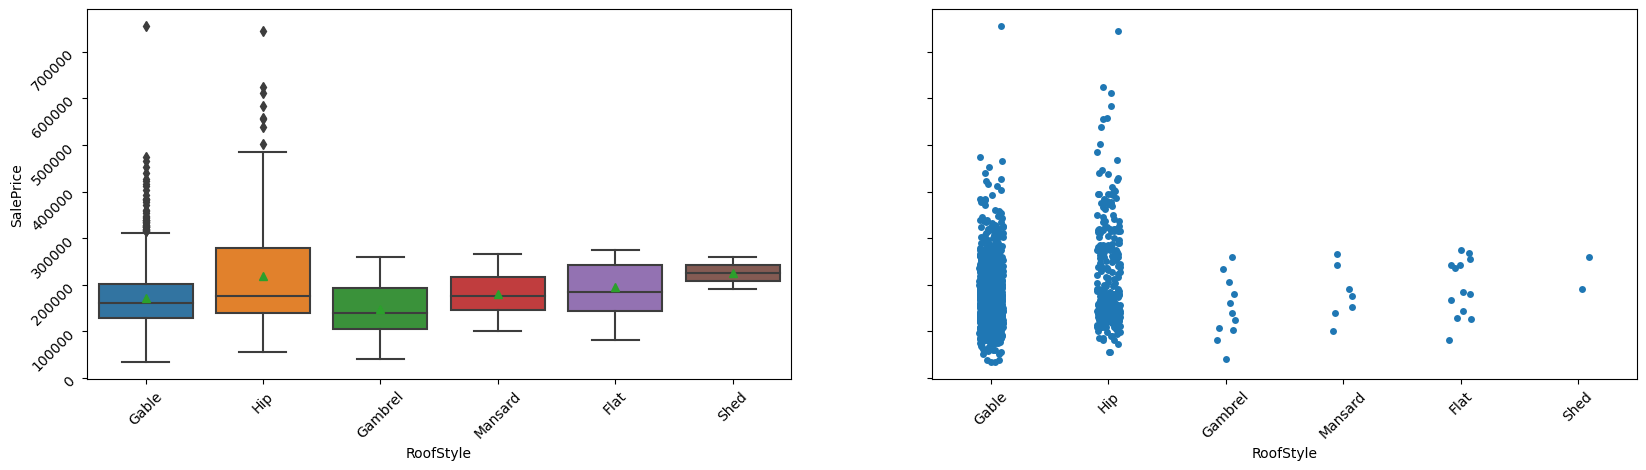

RoofMatl: Roof material
 
        ClyTile	Clay or Tile
        CompShg	Standard (Composite) Shingle
        Membran	Membrane
        Metal	Metal
        Roll	Roll
        Tar&Grv	Gravel & Tar
        WdShake	Wood Shakes
        WdShngl	Wood Shingles
 		



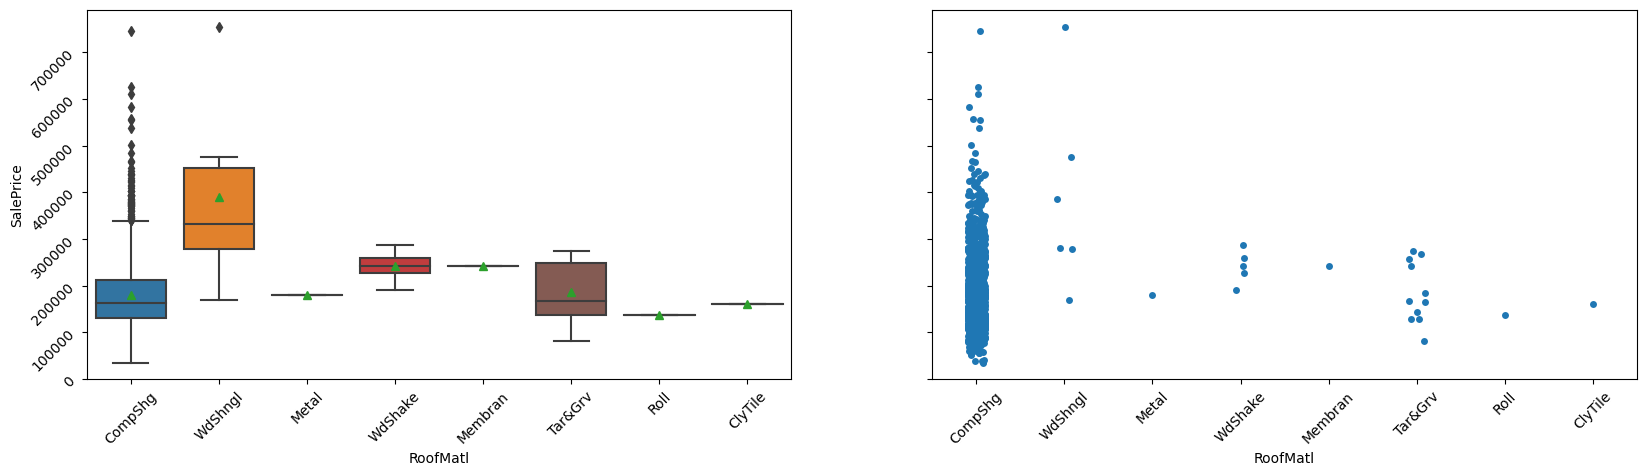

Exterior1st: Exterior covering on house
 
        AsbShng	Asbestos Shingles
        AsphShn	Asphalt Shingles
        BrkComm	Brick Common
        BrkFace	Brick Face
        CBlock	Cinder Block
        CemntBd	Cement Board
        HdBoard	Hard Board
        ImStucc	Imitation Stucco
        MetalSd	Metal Siding
        Other	Other
        Plywood	Plywood
        PreCast	PreCast	
        Stone	Stone
        Stucco	Stucco
        VinylSd	Vinyl Siding
        Wd Sdng	Wood Siding
        WdShing	Wood Shingles
 	



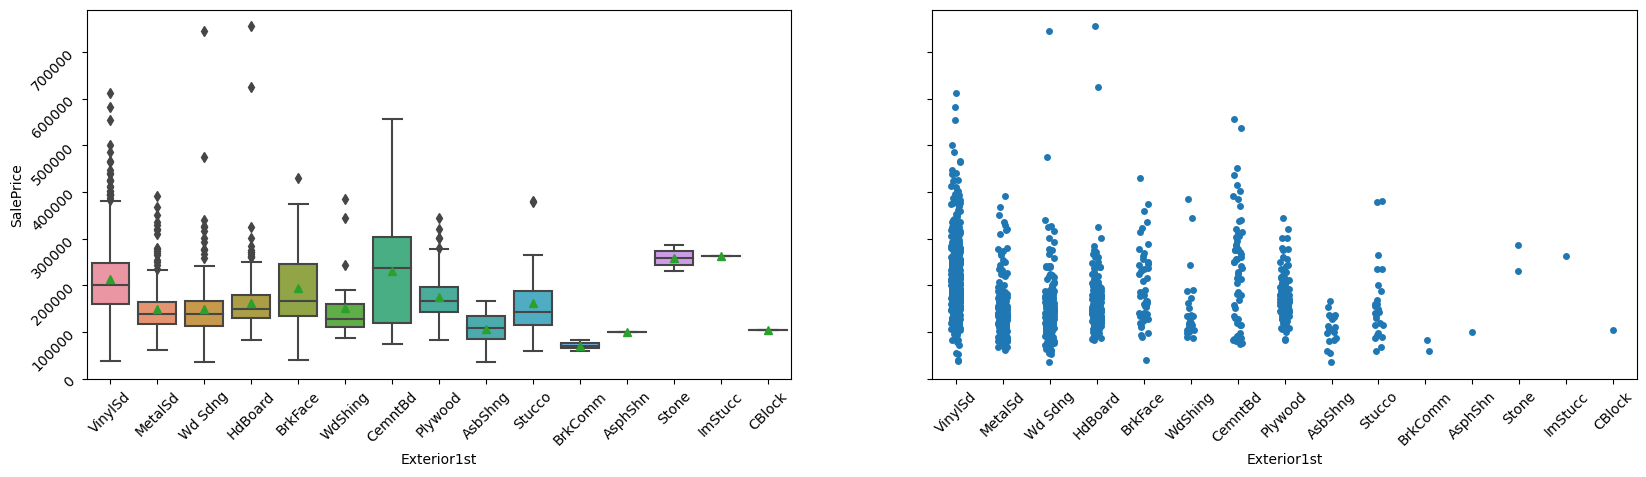

Exterior2nd: Exterior covering on house (if more than one material)
 
        AsbShng	Asbestos Shingles
        AsphShn	Asphalt Shingles
        BrkComm	Brick Common
        BrkFace	Brick Face
        CBlock	Cinder Block
        CemntBd	Cement Board
        HdBoard	Hard Board
        ImStucc	Imitation Stucco
        MetalSd	Metal Siding
        Other	Other
        Plywood	Plywood
        PreCast	PreCast
        Stone	Stone
        Stucco	Stucco
        VinylSd	Vinyl Siding
        Wd Sdng	Wood Siding
        WdShing	Wood Shingles
 	



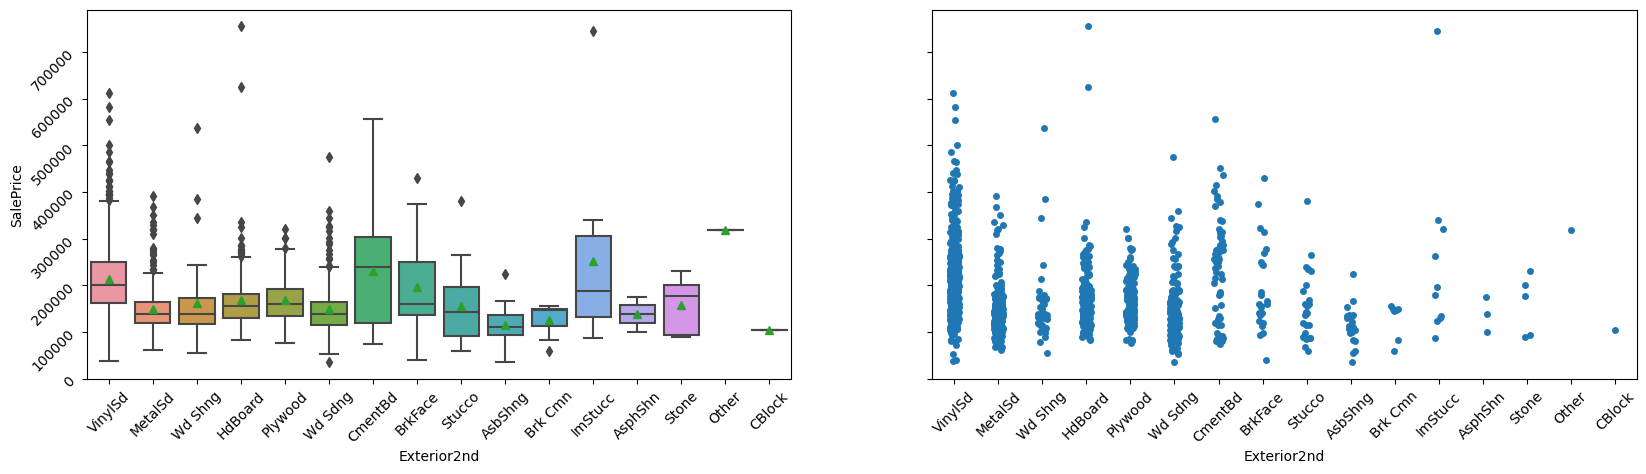

MasVnrType: Masonry veneer type
 
        BrkCmn	Brick Common
        BrkFace	Brick Face
        CBlock	Cinder Block
        None	None
        Stone	Stone
 	



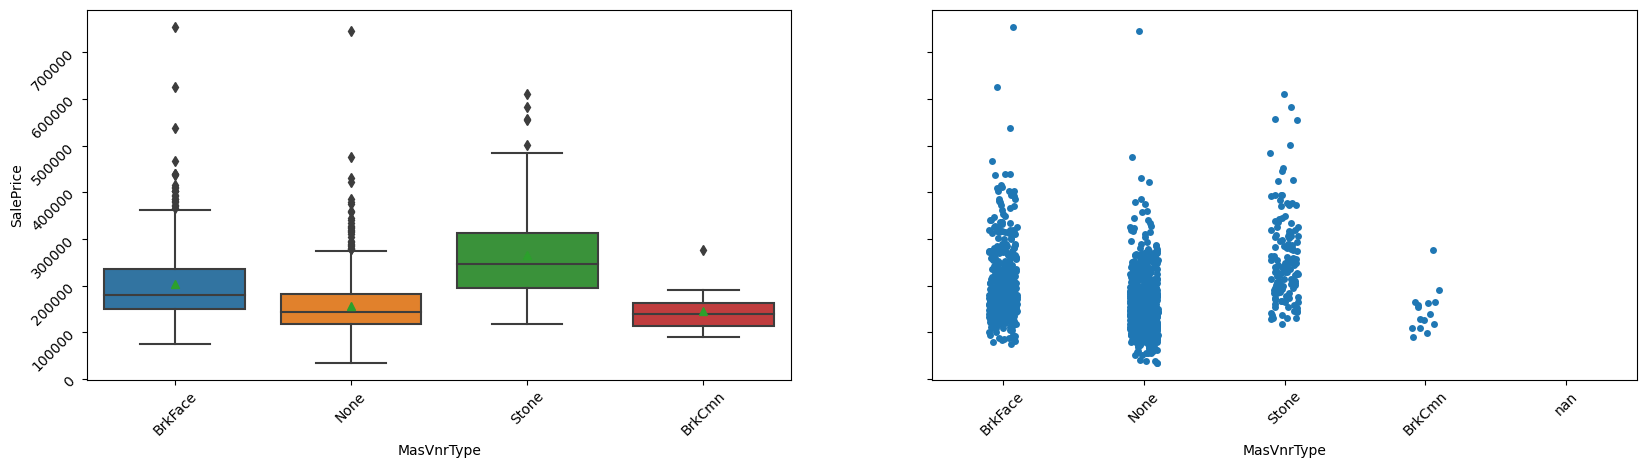

ExterQual: Evaluates the quality of the material on the exterior 
 		
        Ex	Excellent
        Gd	Good
        TA	Average/Typical
        Fa	Fair
        Po	Poor
 		



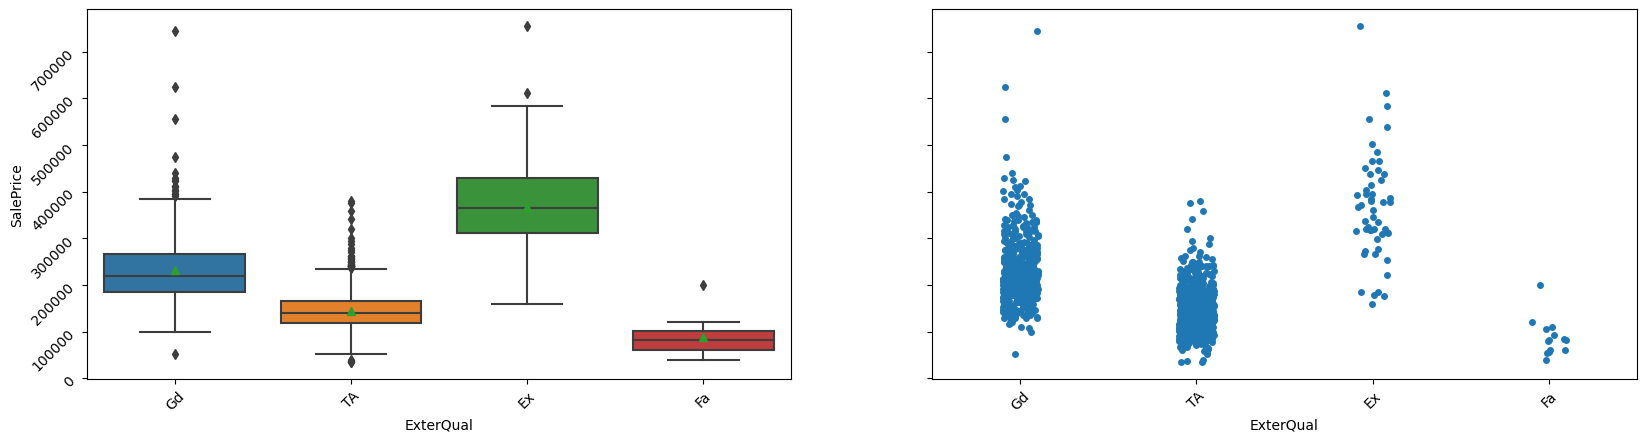

ExterCond: Evaluates the present condition of the material on the exterior
 		
        Ex	Excellent
        Gd	Good
        TA	Average/Typical
        Fa	Fair
        Po	Poor
 		



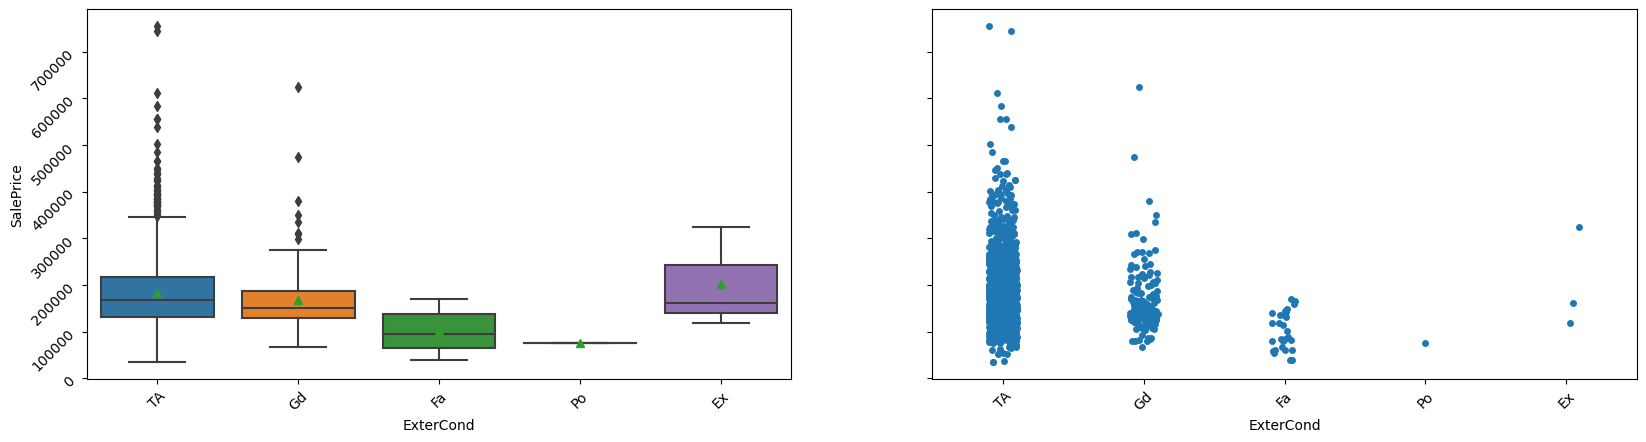

Foundation: Type of foundation
 		
        BrkTil	Brick & Tile
        CBlock	Cinder Block
        PConc	Poured Contrete	
        Slab	Slab
        Stone	Stone
        Wood	Wood
 		



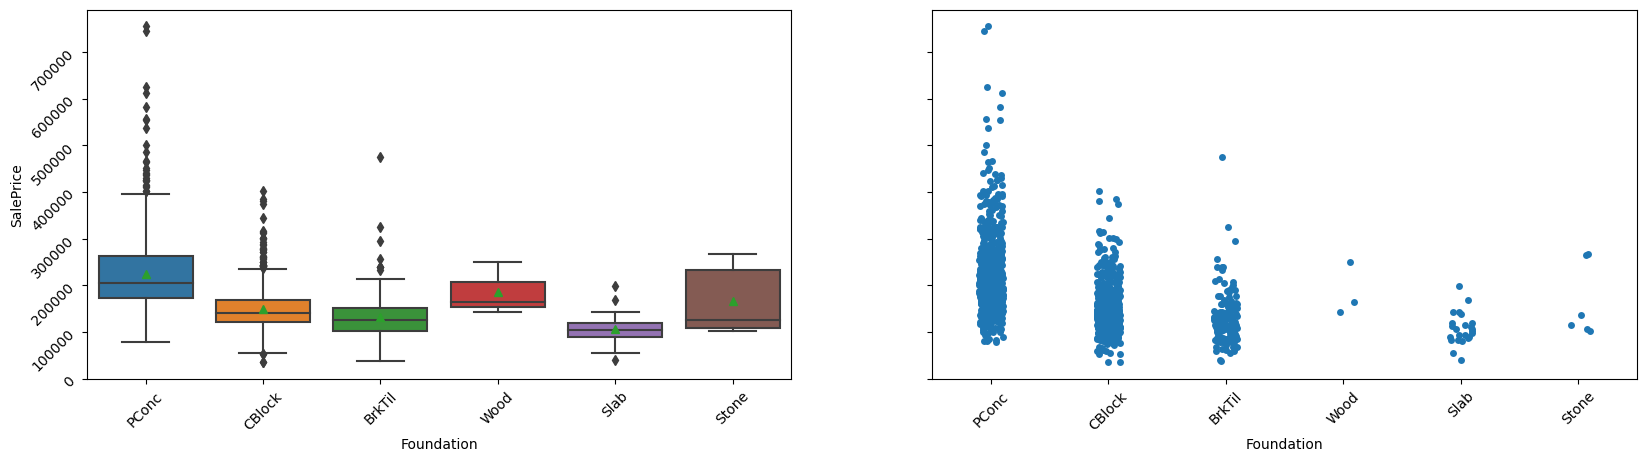

BsmtQual: Evaluates the height of the basement
 
        Ex	Excellent (100+ inches)	
        Gd	Good (90-99 inches)
        TA	Typical (80-89 inches)
        Fa	Fair (70-79 inches)
        Po	Poor (<70 inches
        NA	No Basement
 		



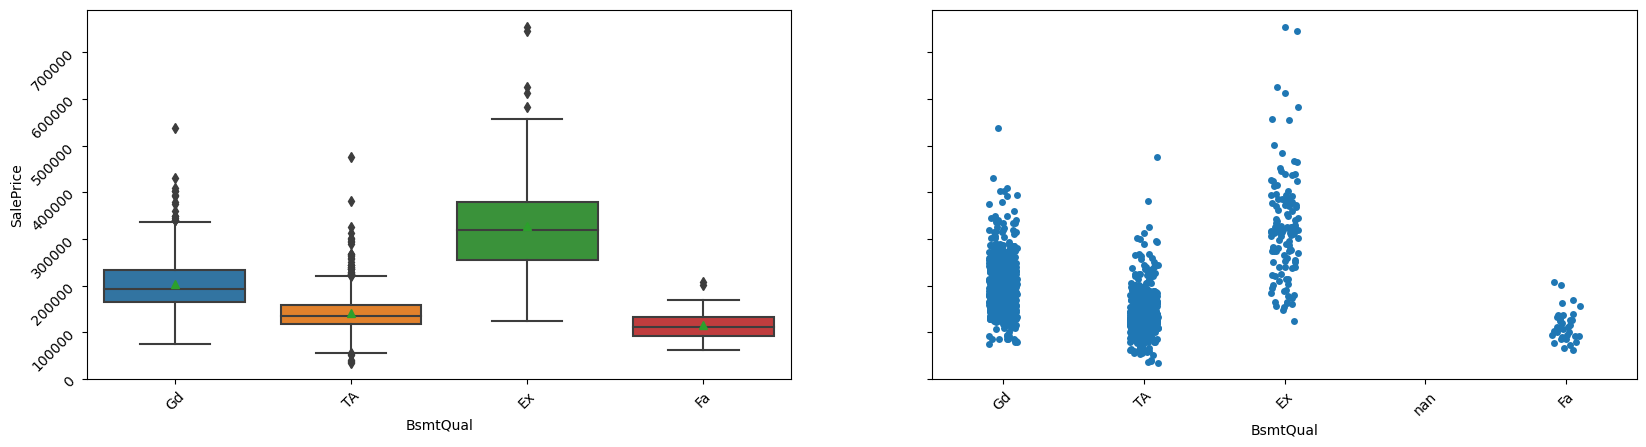

BsmtCond: Evaluates the general condition of the basement
 
        Ex	Excellent
        Gd	Good
        TA	Typical - slight dampness allowed
        Fa	Fair - dampness or some cracking or settling
        Po	Poor - Severe cracking, settling, or wetness
        NA	No Basement
 	



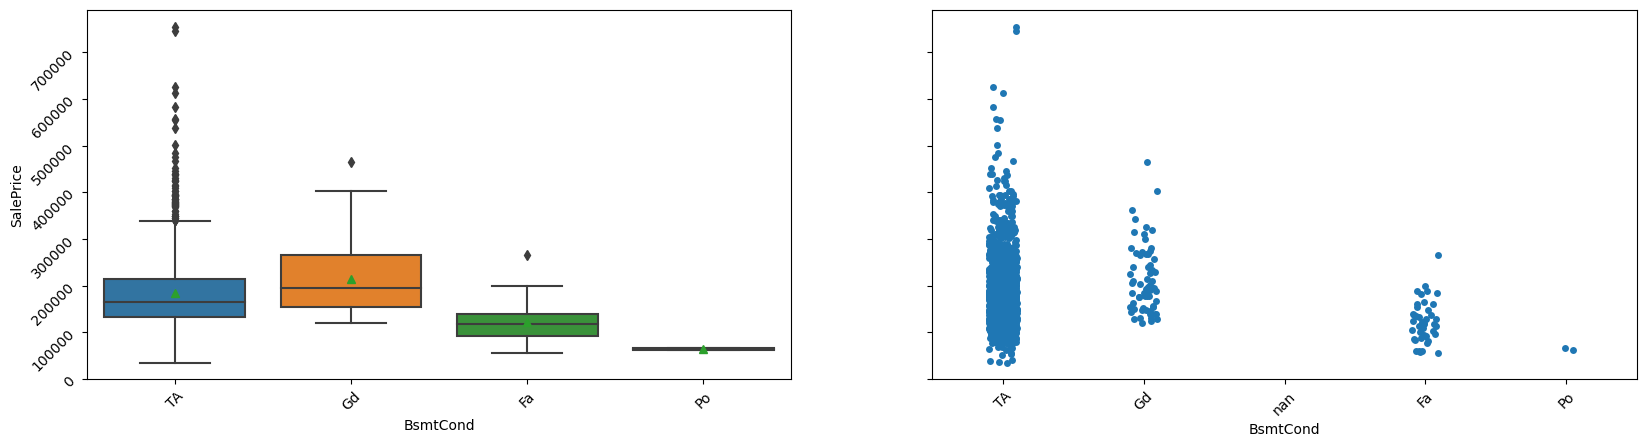

BsmtExposure: Refers to walkout or garden level walls
 
        Gd	Good Exposure
        Av	Average Exposure (split levels or foyers typically score average or above)	
        Mn	Mimimum Exposure
        No	No Exposure
        NA	No Basement
 	



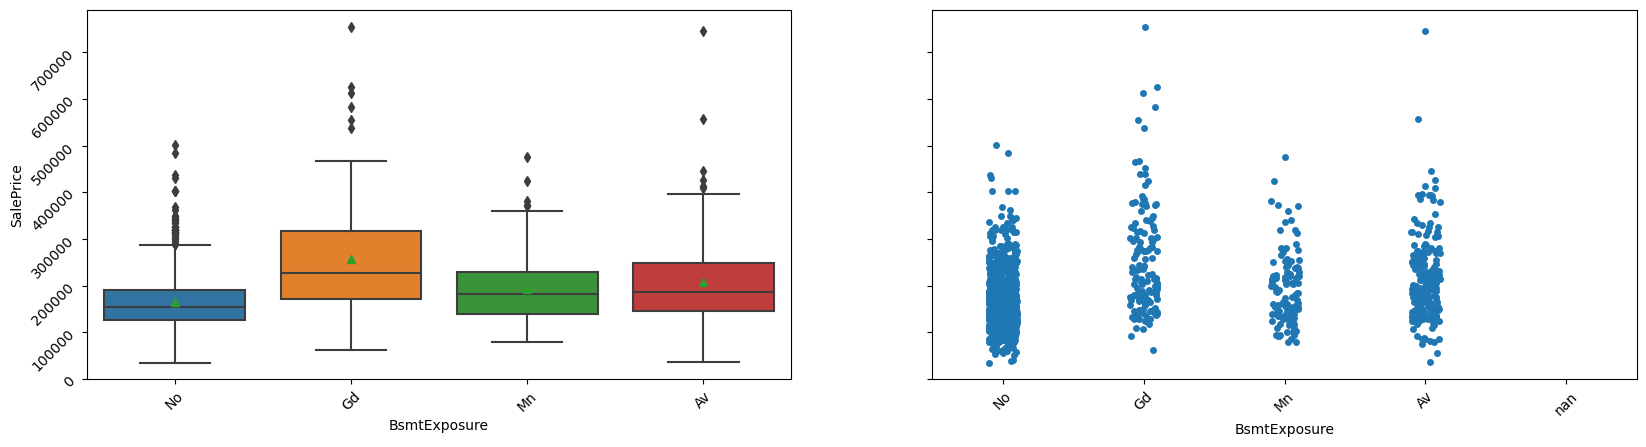

BsmtFinType1: Rating of basement finished area
 
        GLQ	Good Living Quarters
        ALQ	Average Living Quarters
        BLQ	Below Average Living Quarters	
        Rec	Average Rec Room
        LwQ	Low Quality
        Unf	Unfinshed
        NA	No Basement
 		



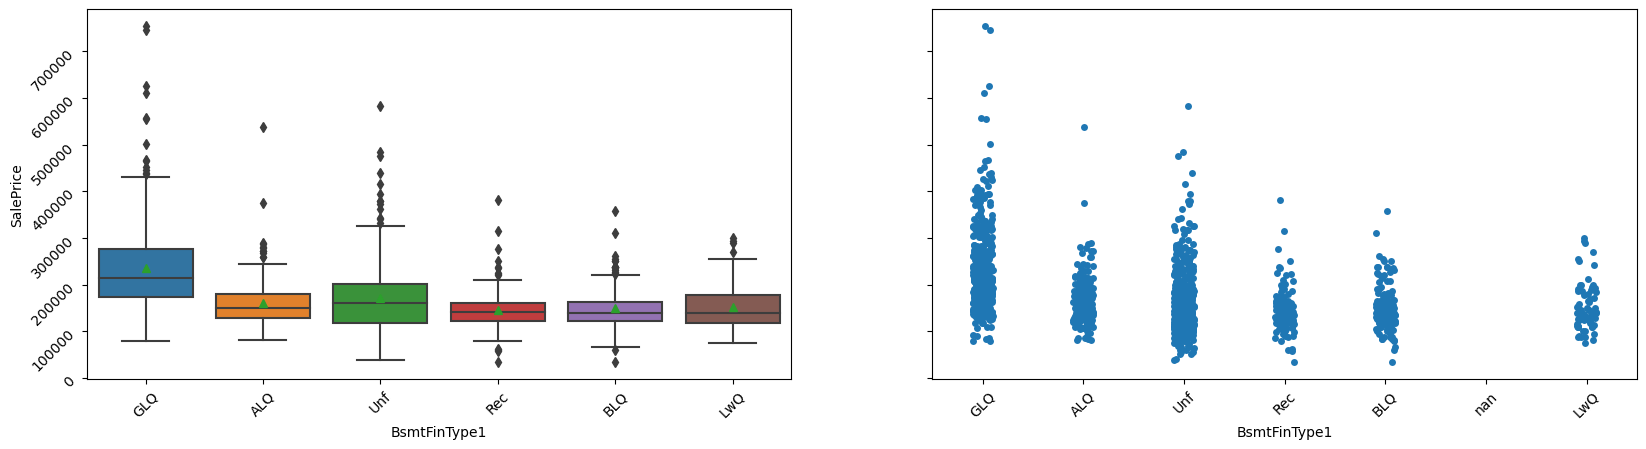

BsmtFinType2: Rating of basement finished area (if multiple types)
 
        GLQ	Good Living Quarters
        ALQ	Average Living Quarters
        BLQ	Below Average Living Quarters	
        Rec	Average Rec Room
        LwQ	Low Quality
        Unf	Unfinshed
        NA	No Basement
 



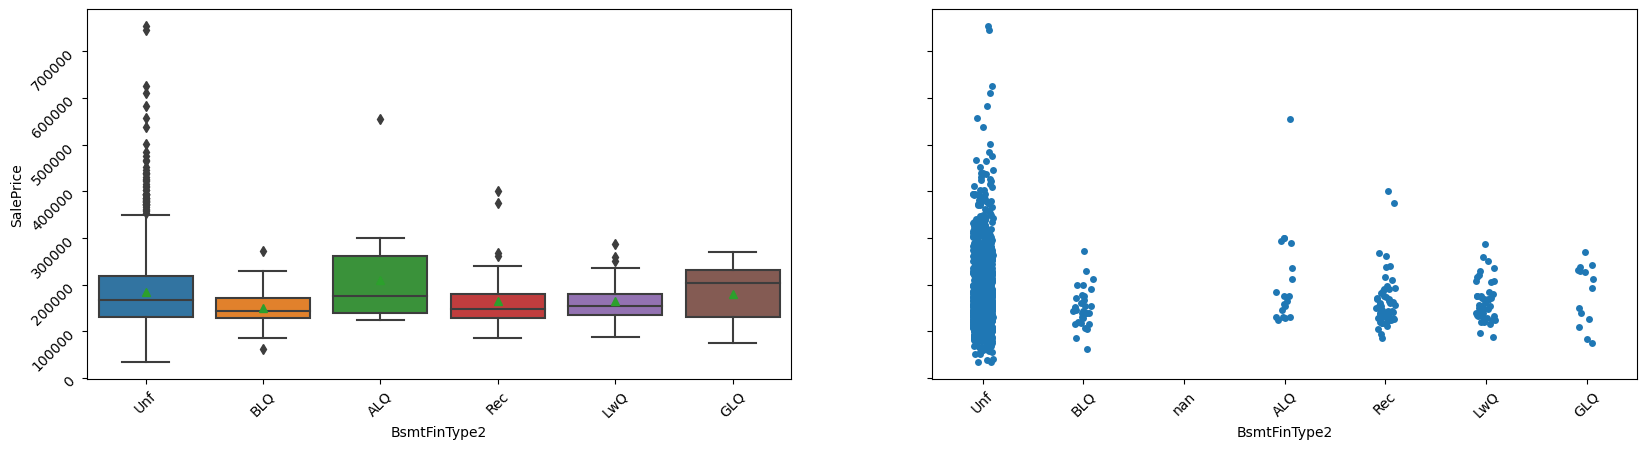

Heating: Type of heating
 		
        Floor	Floor Furnace
        GasA	Gas forced warm air furnace
        GasW	Gas hot water or steam heat
        Grav	Gravity furnace	
        OthW	Hot water or steam heat other than gas
        Wall	Wall furnace
 		



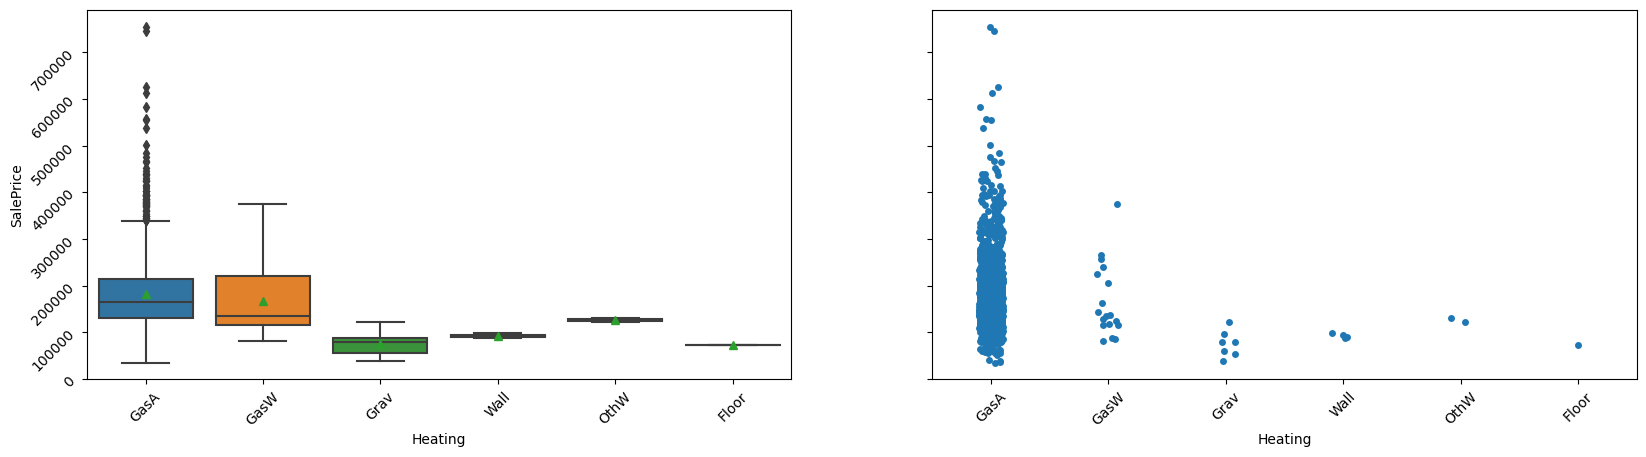

HeatingQC: Heating quality and condition
 
        Ex	Excellent
        Gd	Good
        TA	Average/Typical
        Fa	Fair
        Po	Poor
 		



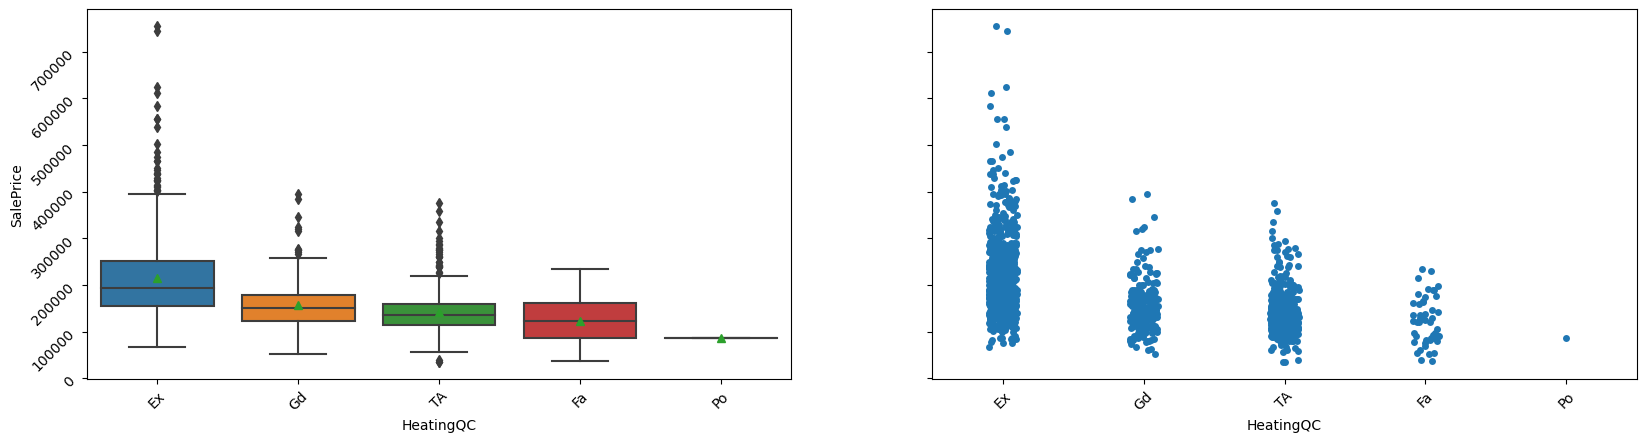

CentralAir: Central air conditioning
 
        N	No
        Y	Yes
 		



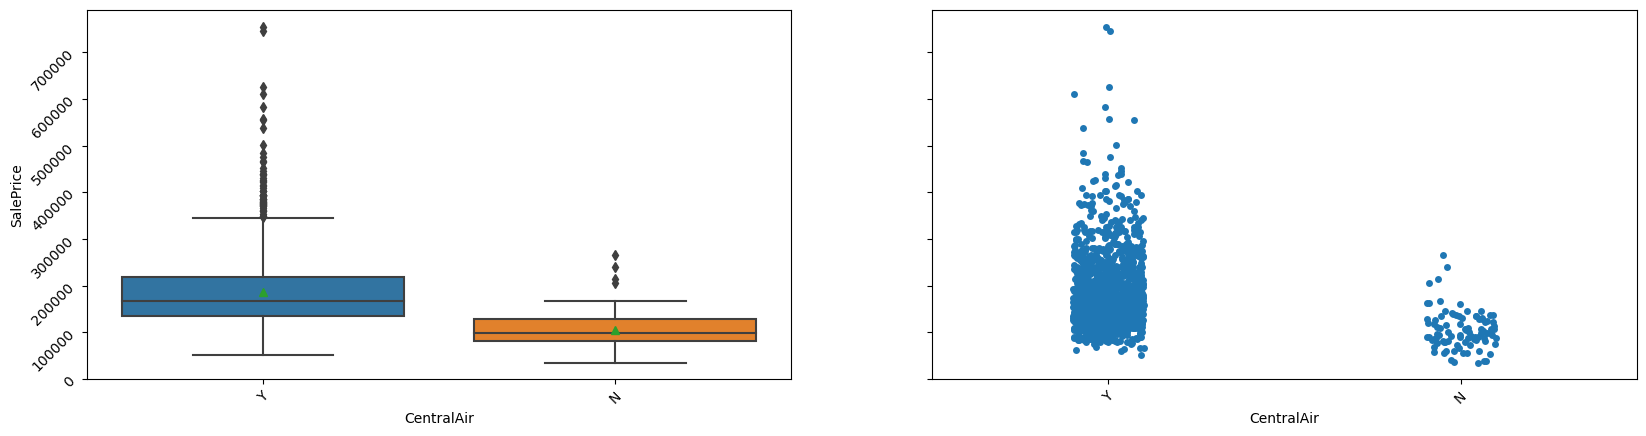

Electrical: Electrical system
 
        SBrkr	Standard Circuit Breakers & Romex
        FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
        FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
        FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
        Mix	Mixed
 		



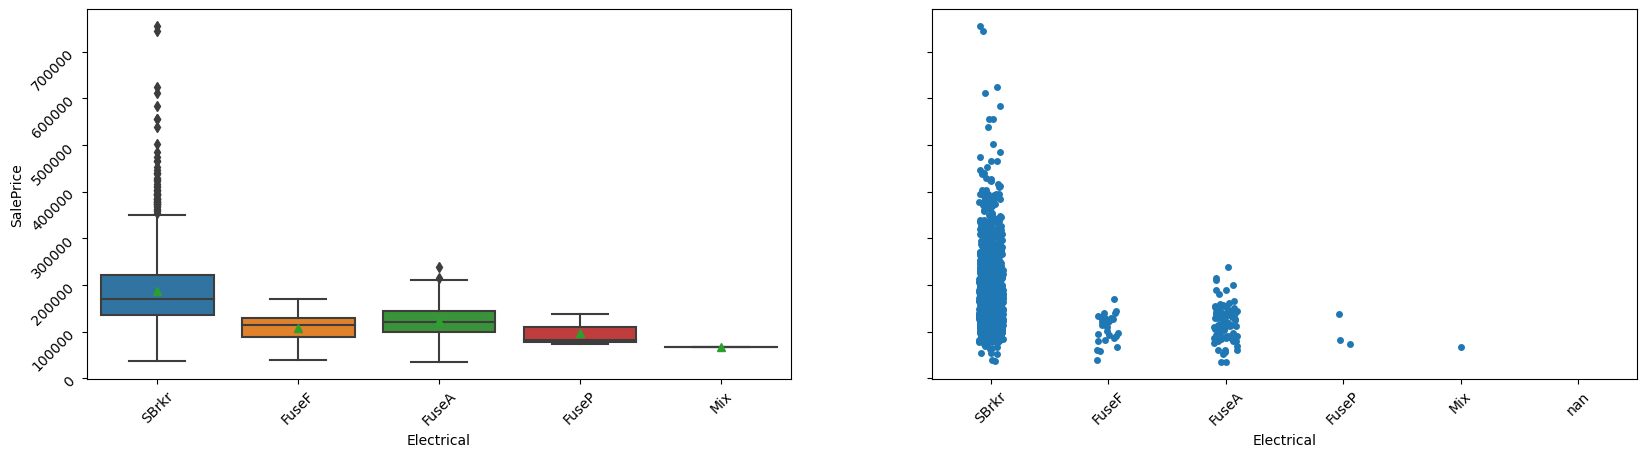

KitchenQual: Kitchen quality
 
        Ex	Excellent
        Gd	Good
        TA	Typical/Average
        Fa	Fair
        Po	Poor
        	



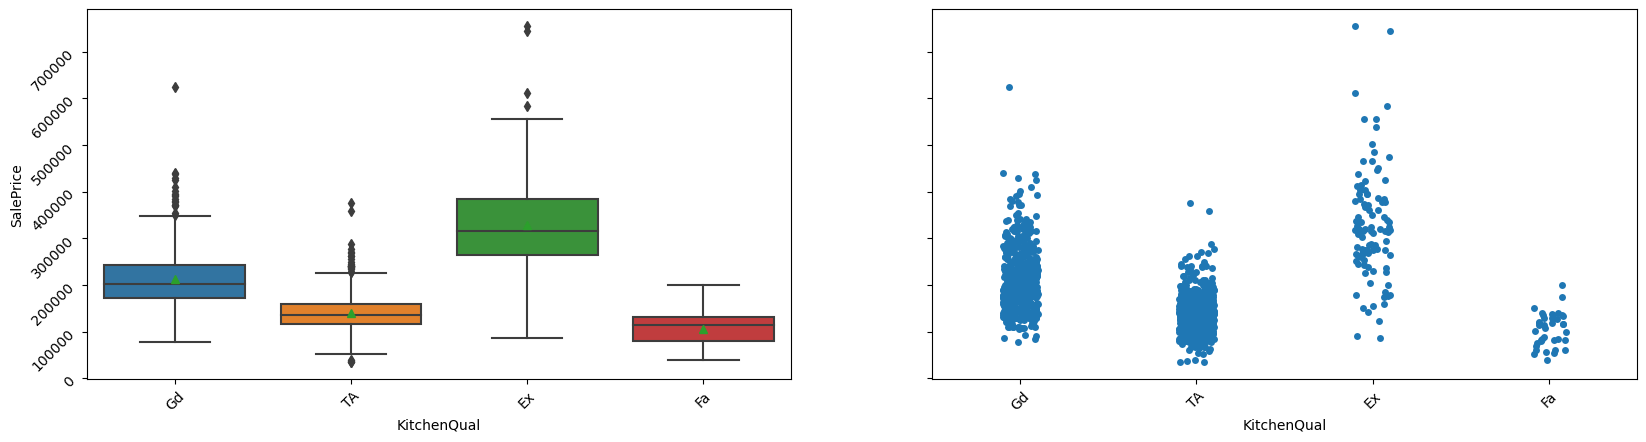

Functional: Home functionality (Assume typical unless deductions are warranted)
 
        Typ	Typical Functionality
        Min1	Minor Deductions 1
        Min2	Minor Deductions 2
        Mod	Moderate Deductions
        Maj1	Major Deductions 1
        Maj2	Major Deductions 2
        Sev	Severely Damaged
        Sal	Salvage only
 		



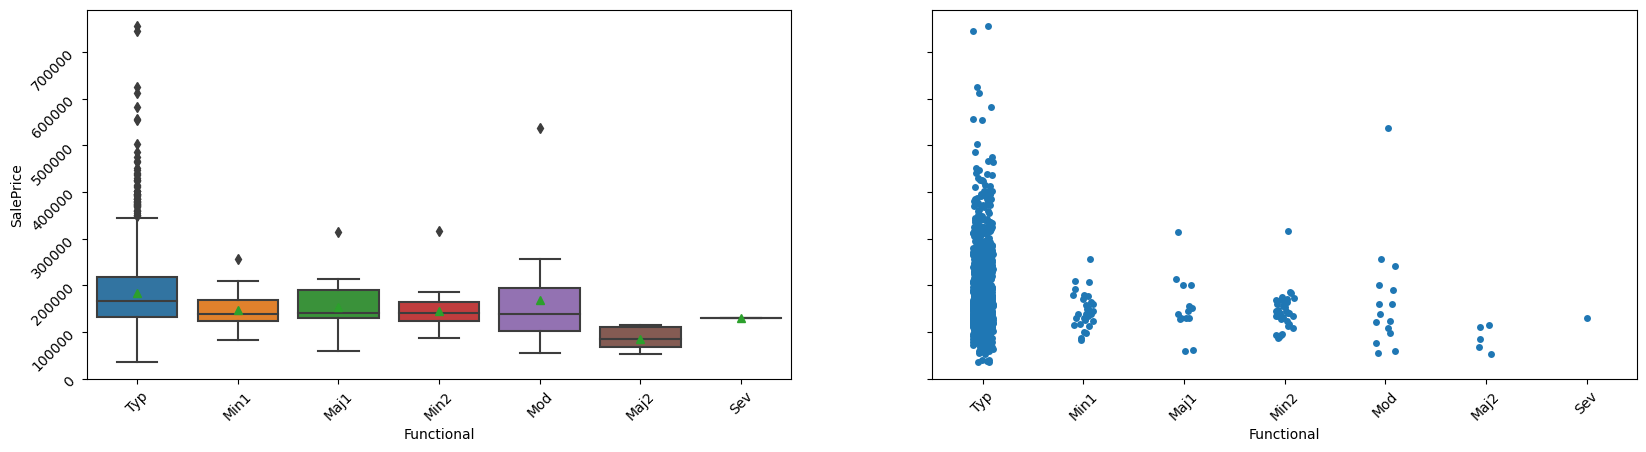

FireplaceQu: Fireplace quality
 
        Ex	Excellent - Exceptional Masonry Fireplace
        Gd	Good - Masonry Fireplace in main level
        TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
        Fa	Fair - Prefabricated Fireplace in basement
        Po	Poor - Ben Franklin Stove
        NA	No Fireplace
 		



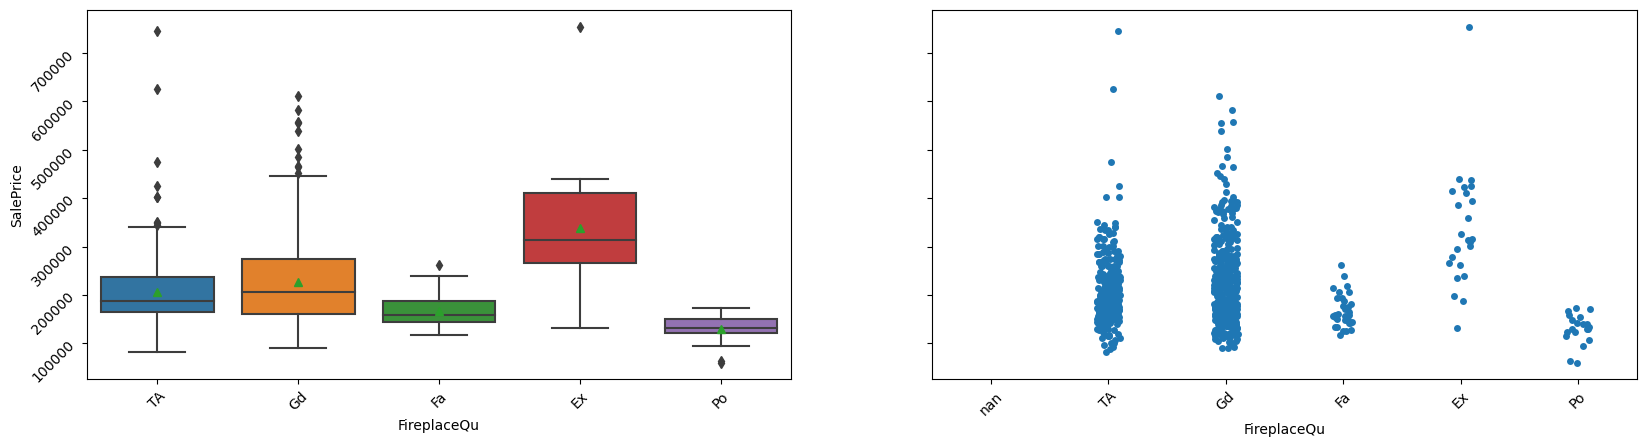

GarageType: Garage location
 		
        2Types	More than one type of garage
        Attchd	Attached to home
        Basment	Basement Garage
        BuiltIn	Built-In (Garage part of house - typically has room above garage)
        CarPort	Car Port
        Detchd	Detached from home
        NA	No Garage
 		



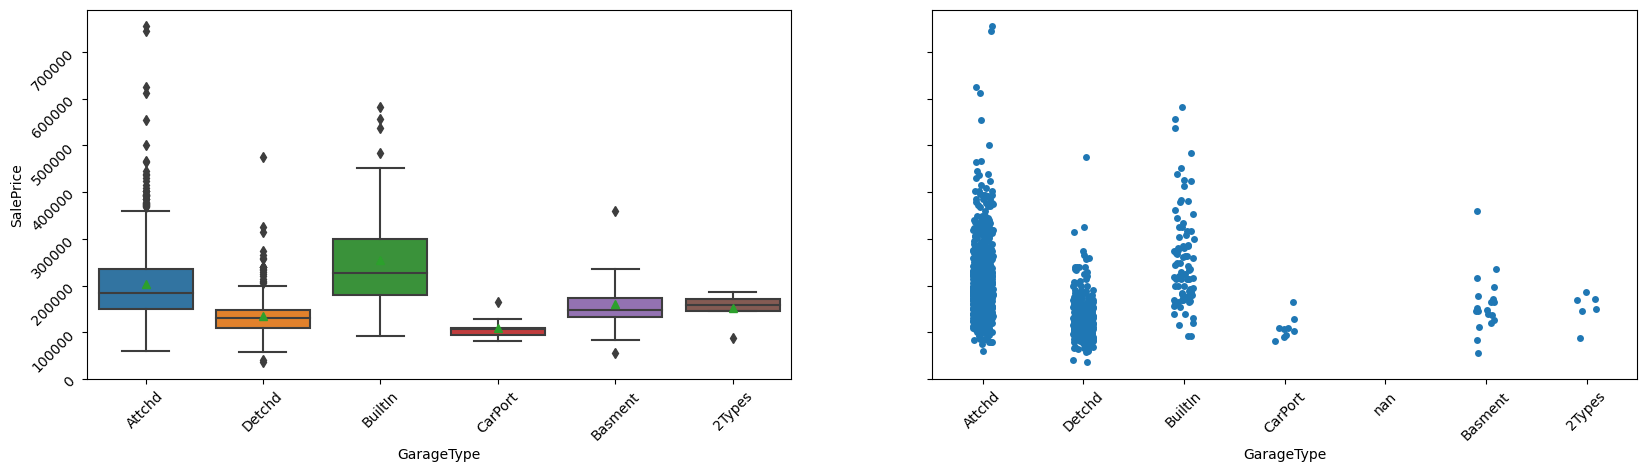

GarageFinish: Interior finish of the garage
 
        Fin	Finished
        RFn	Rough Finished	
        Unf	Unfinished
        NA	No Garage
 		



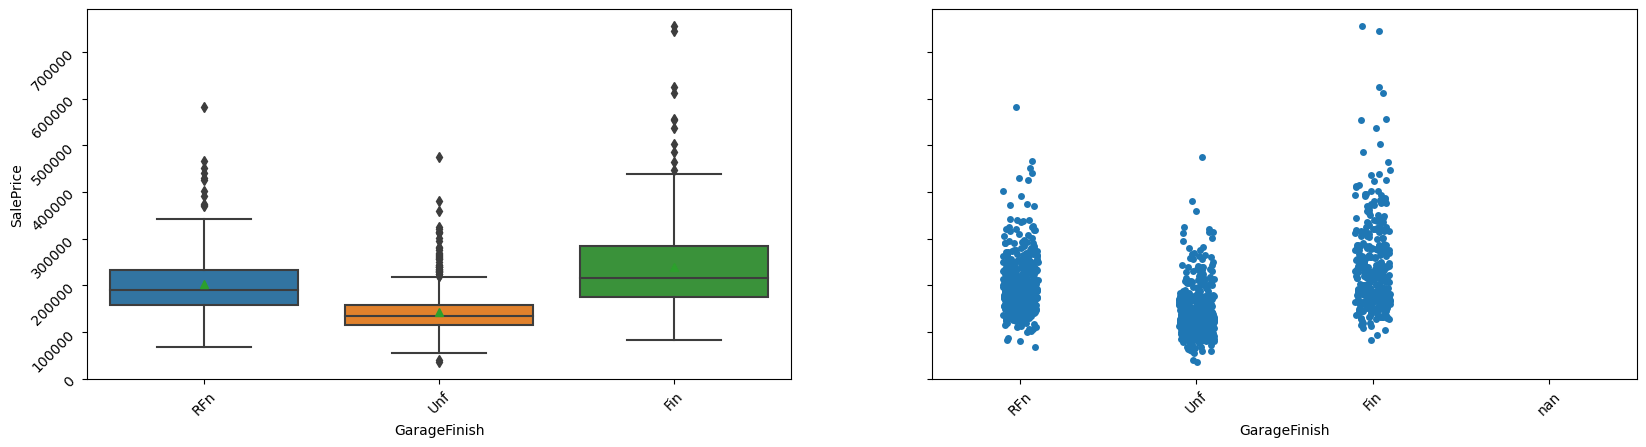

GarageQual: Garage quality
 
        Ex	Excellent
        Gd	Good
        TA	Typical/Average
        Fa	Fair
        Po	Poor
        NA	No Garage
 		



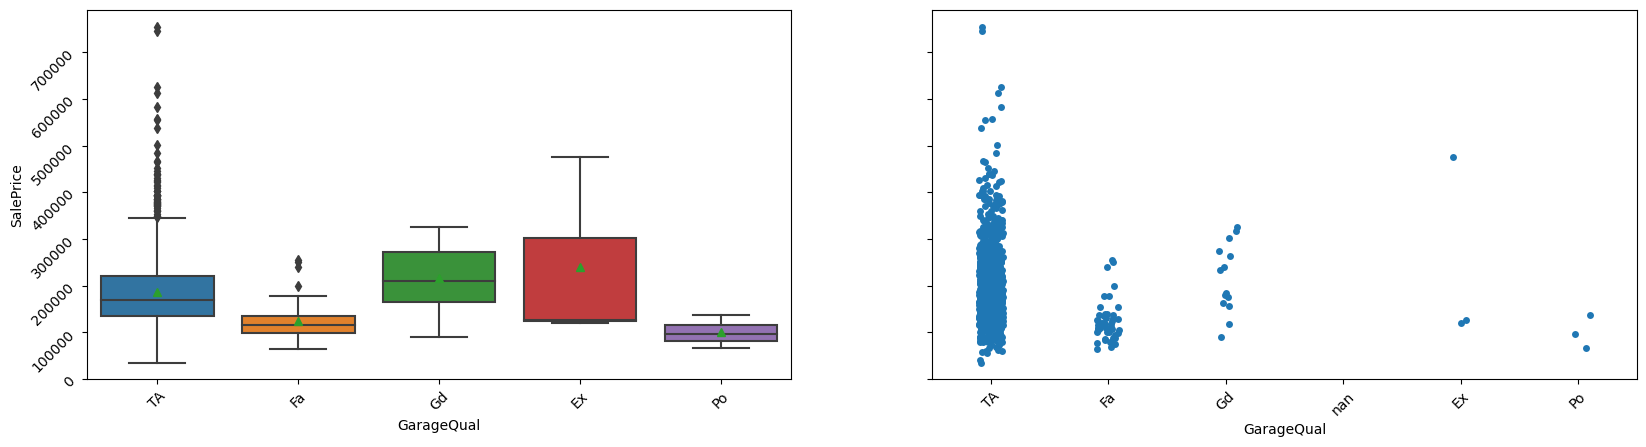

GarageCond: Garage condition
 
        Ex	Excellent
        Gd	Good
        TA	Typical/Average
        Fa	Fair
        Po	Poor
        NA	No Garage
 		



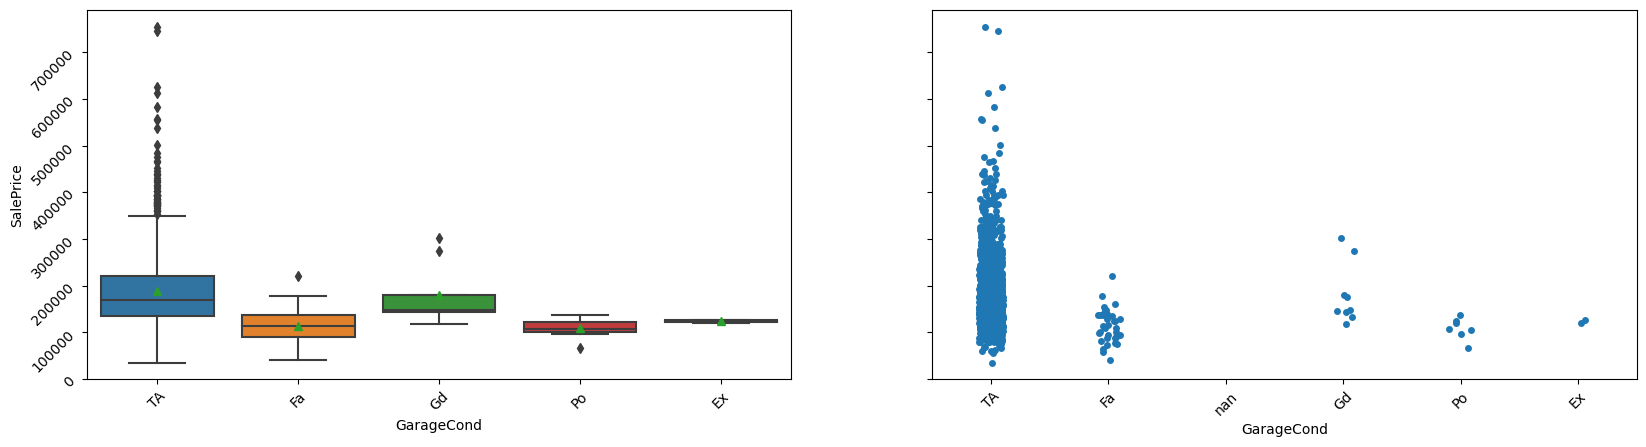

PavedDrive: Paved driveway
 
        Y	Paved 
        P	Partial Pavement
        N	Dirt/Gravel
 		



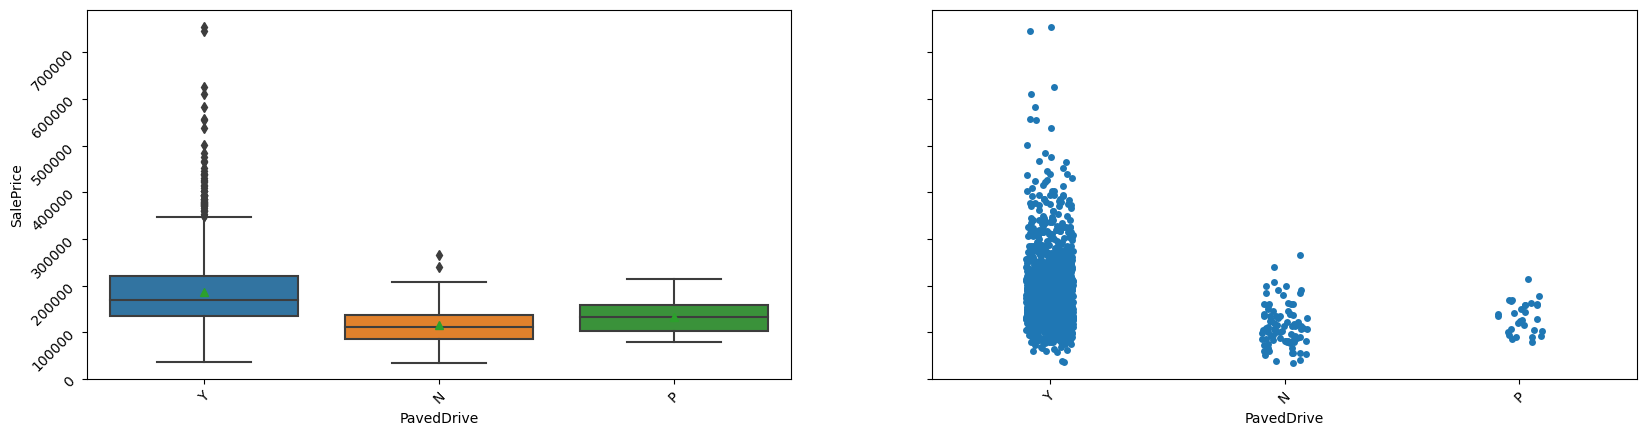

PoolQC: Pool quality
 		
        Ex	Excellent
        Gd	Good
        TA	Average/Typical
        Fa	Fair
        NA	No Pool
 		



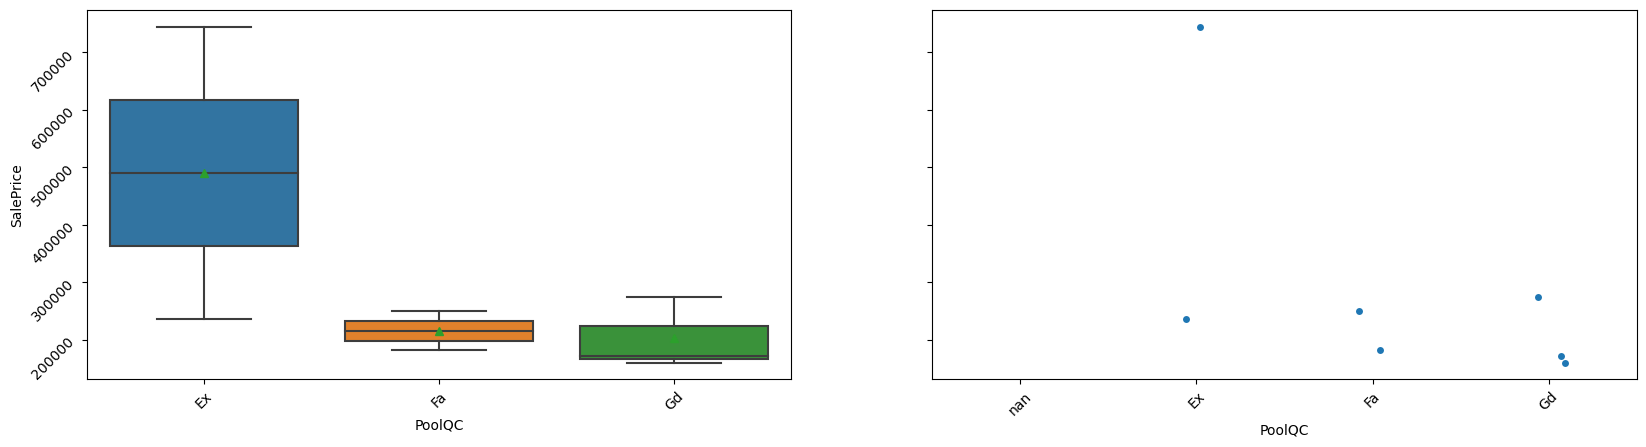

Fence: Fence quality
 		
        GdPrv	Good Privacy
        MnPrv	Minimum Privacy
        GdWo	Good Wood
        MnWw	Minimum Wood/Wire
        NA	No Fence
 	



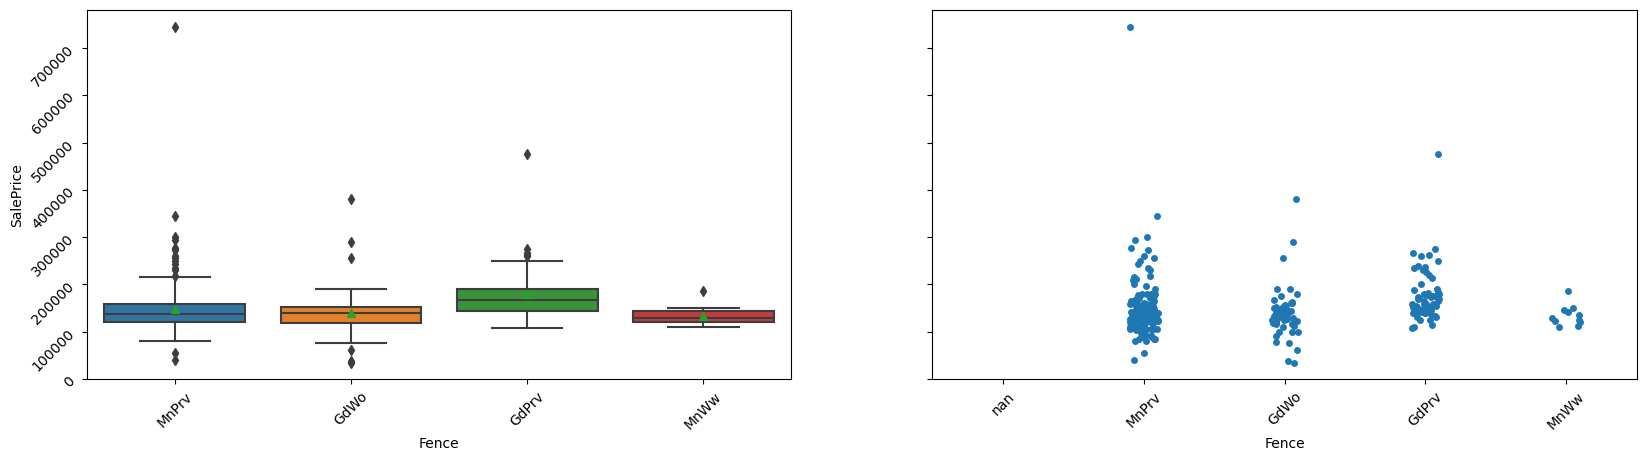

MiscFeature: Miscellaneous feature not covered in other categories
 		
        Elev	Elevator
        Gar2	2nd Garage (if not described in garage section)
        Othr	Other
        Shed	Shed (over 100 SF)
        TenC	Tennis Court
        NA	None
 		



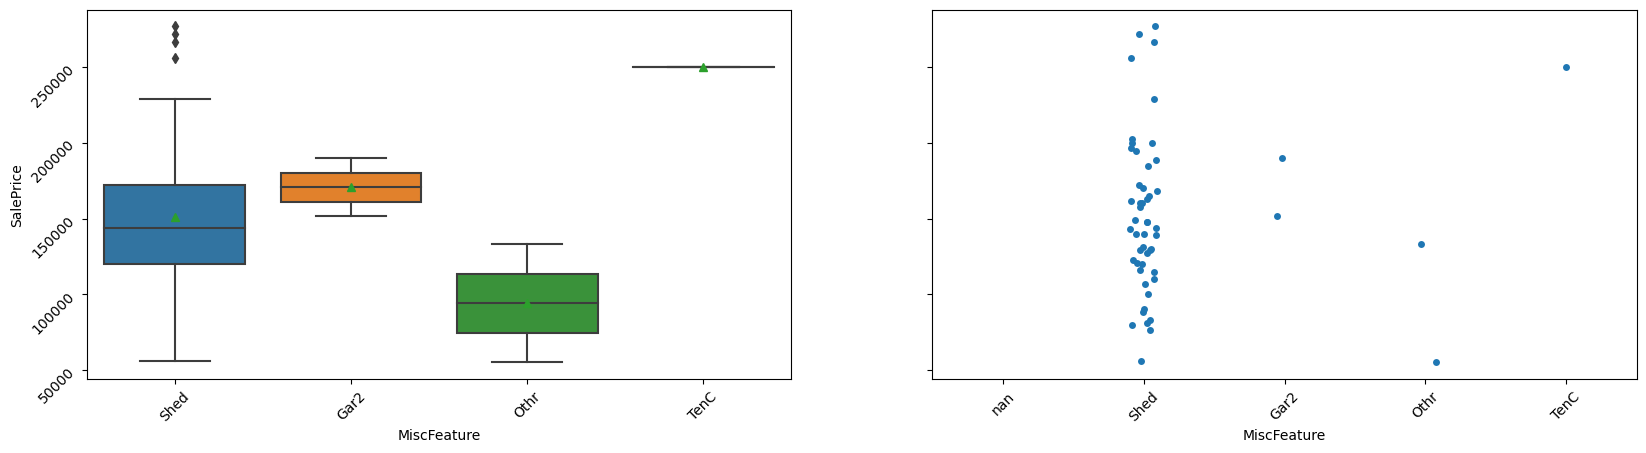

SaleType: Type of sale
 		
        WD 	Warranty Deed - Conventional
        CWD	Warranty Deed - Cash
        VWD	Warranty Deed - VA Loan
        New	Home just constructed and sold
        COD	Court Officer Deed/Estate
        Con	Contract 15% Down payment regular terms
        ConLw	Contract Low Down payment and low interest
        ConLI	Contract Low Interest
        ConLD	Contract Low Down
        Oth	Other
 		



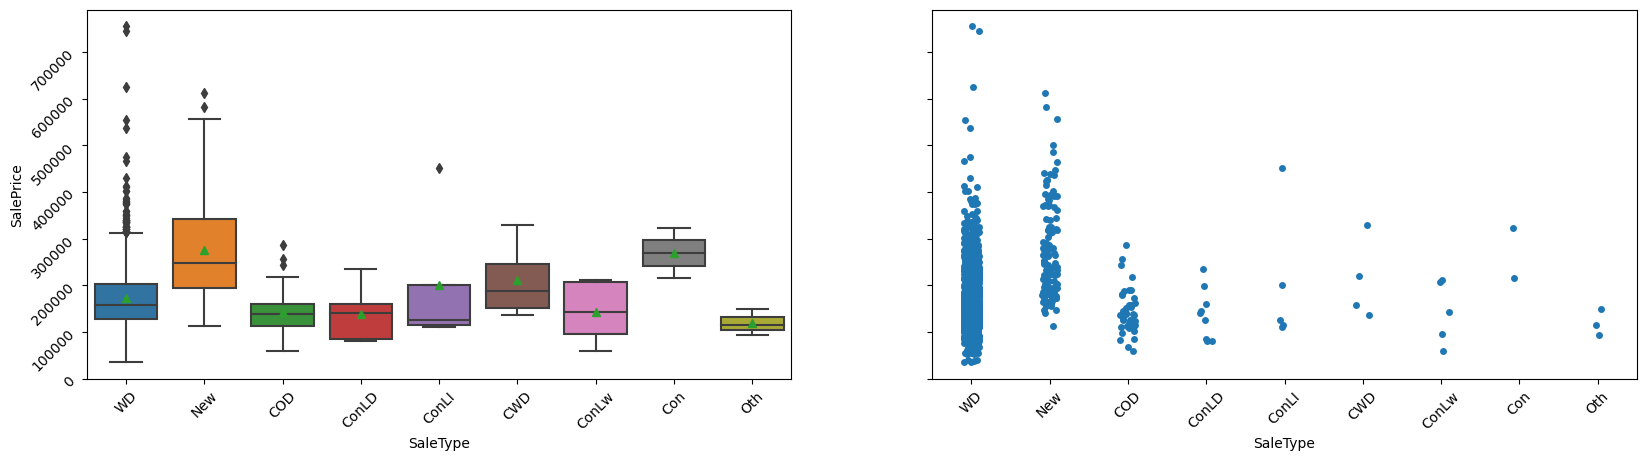

SaleCondition: Condition of sale
 
        Normal	Normal Sale
        Abnorml	Abnormal Sale -  trade, foreclosure, short sale
        AdjLand	Adjoining Land Purchase
        Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
        Family	Sale between family members



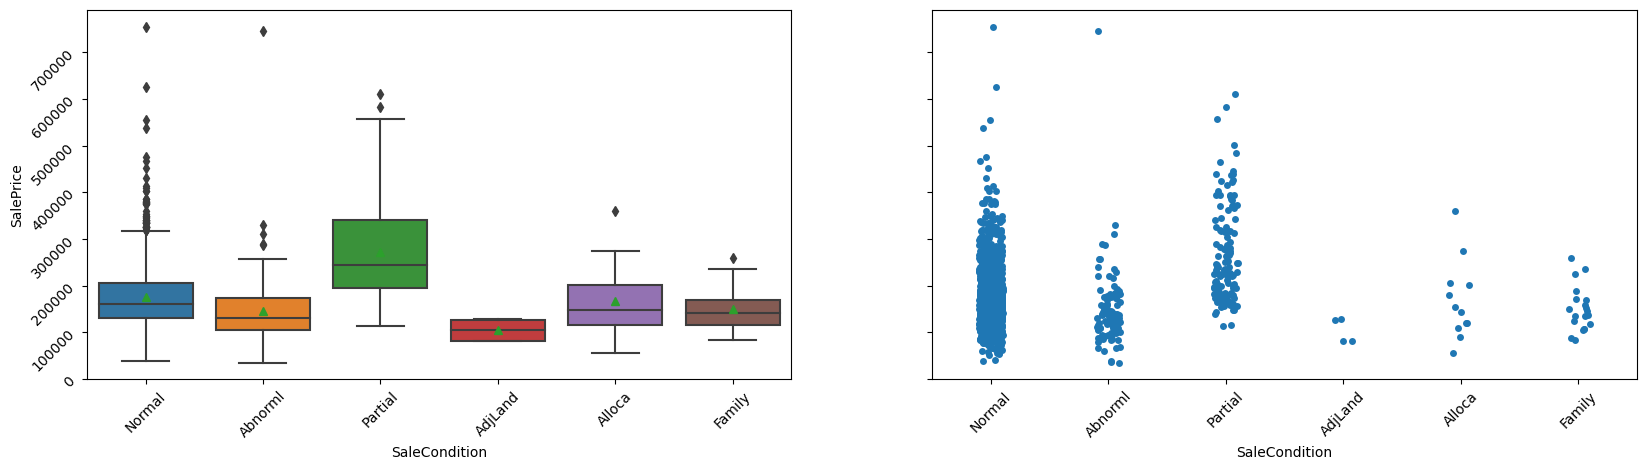

In [156]:
for col in cat_cols:

    fig, axes = plt.subplots(1,2,sharey=True)
    fig.set_figwidth(20)
    axes = axes.flatten()
    axes[0].tick_params(rotation=45)
    axes[1].tick_params(rotation=45)
    sns.boxplot(data=train, x=col, 
                y='SalePrice', 
                ax=axes[0],showmeans=True);
    sns.stripplot(data=train,
             x=col,
             y='SalePrice',
             ax=axes[1])
    
    
    docdict[col]['charts']= fig
    HTML(show(col))
    plt.show()
    display(HTML('<p></n><p>'))
    

In [ ]:
# We see several columns that are using the same/similar categorical scale and 
# can extract these using regex searches. We'll exclude columns with 'Overall' 
# in the name since they're using a different ranking system

In [ ]:
pattern = '.+Cond$|.+Qual$|.+QC$|.+Qu$|.*Exposure'
ord_cols = [x for x in org_cols if re.search(pattern, x) and 'Overall' not in x]

# We absolutely don't want to change the original data, so we will create several
# new columns prefixed with 'd_' for 'derived' and we'll convert the text to numeric
train[['d_' + x for x in ord_cols]] = (train[ord_cols]
                                       .replace(['Ex','Gd','TA','Fa','Po','NA'],
                                                [0,1,2,3,4,5]))

In [ ]:
pat = '.*FinType1|.*FinType2'
fin_cols = [x for x in org_cols if re.search(pat, x)]

train[['d_' + x for x in fin_cols]] = (train[func_cols]
                                   .replace(['GLQ','ALQ','BLQ','Rec', 'LwQ','Unf','NA'],
                                            [x for x in range(0,7)]))


In [ ]:
train['d_CentralAir'] = train['CentralAir'].replace(['N','Y'],
                                                    [0,1])

In [ ]:
show('Functional')
train['d_Functional'] = train['Functional'].replace(['Normal','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal'],
                                                [0,1,2,3,4,5,6,7])


Functional: Home functionality (Assume typical unless deductions are warranted)
 
        Typ	Typical Functionality
        Min1	Minor Deductions 1
        Min2	Minor Deductions 2
        Mod	Moderate Deductions
        Maj1	Major Deductions 1
        Maj2	Major Deductions 2
        Sev	Severely Damaged
        Sal	Salvage only
 		



In [ ]:
show('Fence')
train['d_Fence'] = train['Fence'].replace(['GdPrv','MnPrv','GdWo','MnWw','NA'],
                                          [0,1,2,3,4])

Fence: Fence quality
 		
        GdPrv	Good Privacy
        MnPrv	Minimum Privacy
        GdWo	Good Wood
        MnWw	Minimum Wood/Wire
        NA	No Fence
 	



In [ ]:
show('Heating')

Heating: Type of heating
 		
        Floor	Floor Furnace
        GasA	Gas forced warm air furnace
        GasW	Gas hot water or steam heat
        Grav	Gravity furnace	
        OthW	Hot water or steam heat other than gas
        Wall	Wall furnace
 		



In [ ]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'd_KitchenQual', 'd_FireplaceQu', 'd_GarageQual', 'd_GarageCond',
       'd_PoolQC', 'd_BsmtFinType1', 'd_BsmtFinType2', 'd_CentralAir',
       'd_Functional', 'd_Fence'],
      dtype='object', length=101)

In [ ]:
train['d_PavedDrive'] = train['PavedDrive'].replace(['Y','P','N'],
                                                    [1,.5,0])

OverallQual: Rates the overall material and finish of the house
 
        10	Very Excellent
        9	Excellent
        8	Very Good
        7	Good
        6	Above Average
        5	Average
        4	Below Average
        3	Fair
        2	Poor
        1	Very Poor
 	



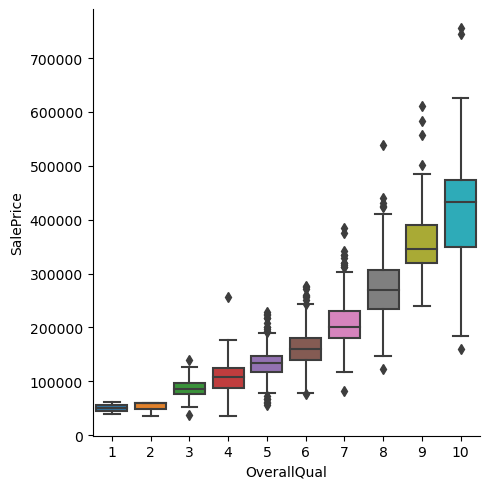

In [ ]:
show('OverallQual')
sns.catplot(data=train,
            x='OverallQual',
            y='SalePrice',
           kind='box')

In [ ]:
train['d_Street'] = train['Street'].replace(['Pave','Grvl'],
                                            [0,1])

In [ ]:
# Now, we need to go back through the list of categorical columns and find the ones
# we didn't create a derived column

tgt_cat_cols = [x for x in cat_cols if 'd_' + x not in org_cols]

In [ ]:
for cat_col in tgt_cat_cols:
    train['d_' + cat_col] = train.groupby(cat_col)['SalePrice'].transform('mean')

In [ ]:
# Next, we'll extract all of the derived columns into one list
d_cols = [x for x in train.columns if 'd_' in x]

In [ ]:
# Finally, we combine both the numeric and the derived columns into one featureset
dis_cols = [x for x in dis_cols if x != 'SalePrice']
X_cols = list(dis_cols) + list(d_cols)

In [ ]:
X = train[X_cols]
X_train,X_test,y_train, y_test = train_test_split(X,y,
                                                  test_size=.1,
                                                  random_state=0)

In [ ]:
pipe = Pipeline([('impute',IterativeImputer()),
                ('scaling',StandardScaler()),
                ('model',LinearRegression())
                ])



params = {
    'impute__sample_posterior':[True],
    'impute__max_iter': [10],
    'impute__n_nearest_features': [2],
    'impute__random_state' : [0]
}


grid = GridSearchCV(pipe,param_grid=params,
                    scoring=make_scorer(mean_squared_error,squared=False),
                    cv=10,n_jobs=-1,
                    return_train_score=True
                   )


res = grid.fit(X_train, y_train)
pd.DataFrame(res.cv_results_).T.loc[['mean_test_score','mean_train_score']]

0
mean_test_score   2.346812
mean_train_score   0.12215

In [ ]:
y_preds = res.best_estimator_.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_preds, squared=False)

0.12215065709784796

In [ ]:
pd.set_option('display.max_rows', 100)
lr_model = res.best_estimator_.named_steps['model']
results = pd.DataFrame(zip(X_cols, lr_model.coef_), columns=['feature_name','coef'])
results['abs'] = results['coef'].abs()
coefs = results.sort_values('abs', ascending=False).reset_index()
coefs.head(80)

index           feature_name          coef           abs
0      15              GrLivArea  3.734171e+11  3.734171e+11
1      13               2ndFlrSF -3.106738e+11  3.106738e+11
2      12               1stFlrSF -2.745419e+11  2.745419e+11
3      36            d_house_age  1.081703e+11  1.081703e+11
4       5              YearBuilt  1.080099e+11  1.080099e+11
5       8             BsmtFinSF1  9.302289e+10  9.302289e+10
6      11            TotalBsmtSF -8.881427e+10  8.881427e+10
7      10              BsmtUnfSF  8.868145e+10  8.868145e+10
8      61             d_LotShape -8.426155e+10  8.426155e+10
9      39        d_mean_lotshape  8.426155e+10  8.426155e+10
10     40  d_mean_neighbor_price  6.448054e+10  6.448054e+10
11     66         d_Neighborhood -6.448054e+10  6.448054e+10
12     14           LowQualFinSF -3.512396e+10  3.512396e+10
13      9             BsmtFinSF2  3.195921e+10  3.195921e+10
14     35                 YrSold -4.738227e+09  4.738227e+09
15      3            OverallQual  7.415553e-02  7.415553e-02
16      4            OverallCond  4.085583e-02  4.085583e-02
17     25             GarageCars  3.806877e-02  3.806877e-02
18     83        d_SaleCondition  3.248119e-02  3.248119e-02
19     73          d_Exterior1st  2.662659e-02  2.662659e-02
20     16           BsmtFullBath  2.573586e-02  2.573586e-02
21     37            d_multi_fam  2.545929e-02  2.545929e-02
22     23             Fireplaces  2.454567e-02  2.454567e-02
23     22           TotRmsAbvGrd  2.377701e-02  2.377701e-02
24     58             d_MSZoning  2.317619e-02  2.317619e-02
25     38          d_residential  2.146912e-02  2.146912e-02
26     67           d_Condition1  1.976395e-02  1.976395e-02
27     31            ScreenPorch  1.799011e-02  1.799011e-02
28     82             d_SaleType -1.722527e-02  1.722527e-02
29     74          d_Exterior2nd -1.716614e-02  1.716614e-02
30      0             MSSubClass -1.704250e-02  1.704250e-02
31     18               FullBath  1.683235e-02  1.683235e-02
32     76           d_Foundation  1.651001e-02  1.651001e-02
33     19               HalfBath  1.639366e-02  1.639366e-02
34     24            GarageYrBlt -1.626015e-02  1.626015e-02
35     69             d_BldgType  1.625061e-02  1.625061e-02
36     47          d_KitchenQual  1.583099e-02  1.583099e-02
37     54           d_CentralAir  1.520443e-02  1.520443e-02
38     46            d_HeatingQC  1.430488e-02  1.430488e-02
39     55           d_Functional  1.425934e-02  1.425934e-02
40     26             GarageArea  1.386166e-02  1.386166e-02
41     70           d_HouseStyle -1.367569e-02  1.367569e-02
42     21           KitchenAbvGr -1.350021e-02  1.350021e-02
43      6           YearRemodAdd  1.326673e-02  1.326673e-02
44     68           d_Condition2 -1.306343e-02  1.306343e-02
45     27             WoodDeckSF  1.239395e-02  1.239395e-02
46     42            d_ExterCond  1.230955e-02  1.230955e-02
47     62          d_LandContour  1.223755e-02  1.223755e-02
48     64            d_LotConfig  1.172638e-02  1.172638e-02
49     45         d_BsmtExposure  1.146936e-02  1.146936e-02
50     49           d_GarageQual  1.125908e-02  1.125908e-02
51     63            d_Utilities  1.065159e-02  1.065159e-02
52     32               PoolArea -1.064587e-02  1.064587e-02
53     80         d_GarageFinish  1.059341e-02  1.059341e-02
54     60                d_Alley  1.014185e-02  1.014185e-02
55      2                LotArea  1.003549e-02  1.003549e-02
56      1            LotFrontage -9.906137e-03  9.906137e-03
57     43             d_BsmtQual  9.695053e-03  9.695053e-03
58     20           BedroomAbvGr  9.603500e-03  9.603500e-03
59     72             d_RoofMatl  9.567261e-03  9.567261e-03
60     57           d_PavedDrive  8.413315e-03  8.413315e-03
61     77              d_Heating  8.239746e-03  8.239746e-03
62     29          EnclosedPorch  7.364273e-03  7.364273e-03
63     59               d_Street  6.992102e-03  6.992102e-03
64     78           d_Electrical -6.675

In [ ]:
reduced = coefs['feature_name'].head(15).to_list()
X = train[reduced]
X_train,X_test,y_train, y_test = train_test_split(X,y,
                                                  test_size=.1,
                                                  random_state=0)

0.16021051812882287

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr_pipeline = Pipeline([('impute',IterativeImputer()),
                ('scaling',StandardScaler()),
                ('model',DecisionTreeRegressor())
                ])



params = {
    'impute__sample_posterior':[True],
    'impute__max_iter': [10],
    'impute__n_nearest_features': [2],
    'impute__random_state' : [0],
    'model__criterion': ['squared_error'],
    'model__max_depth':[6, 10,15, 20],
    'model__min_samples_leaf': [1,2]
}


grid_dtr = GridSearchCV(dtr_pipeline,param_grid=params,
                    scoring=make_scorer(mean_squared_error,squared=False),
                    cv=10,n_jobs=-1,
                    return_train_score=True
                   )



In [ ]:
dtr_results = grid_dtr.fit(X_train, y_train)

In [ ]:
pd.DataFrame(dtr_results.cv_results_).T

0  \
mean_fit_time                                                              8.971783   
std_fit_time                                                               0.082902   
mean_score_time                                                            1.041655   
std_score_time                                                             0.023009   
param_impute__max_iter                                                           10   
param_impute__n_nearest_features                                                  2   
param_impute__random_state                                                        0   
param_impute__sample_posterior                                                 True   
param_model__criterion                                                squared_error   
param_model__max_depth                                                            6   
param_model__min_samples_leaf                                                     1   
params                            {'impute__max_iter': 10, 'impute__n_nearest_fe...   
split0_test_score                                                          0.208712   
split1_test_score                                                          0.196466   
split2_test_score                                                          0.190063   
split3_test_score                                                          0.234981   
split4_test_score                                                           0.19302   
split5_test_score                                                          0.202288   
split6_test_score                                                          0.210067   
split7_test_score                                                          0.199908   
split8_test_score                                                          0.202319   
split9_test_score                                                          0.160938   
mean_test_score                                                            0.199876   
std_test_score                                                             0.017599   
rank_test_score                                                                   7   
split0_train_score                                                         0.129817   
split1_train_score                                                         0.137812   
split2_train_score                                                         0.142297   
split3_train_score                                                         0.136327   
split4_train_score                                                           0.1362   
split5_train_score                                                         0.131103   
split6_train_score                                                         0.143171   
split7_train_score                                                         0.134906   
split8_train_score                                                         0.142021   
split9_train_score                                                         0.135353   
mean_train_score                                                           0.136901   
std_train_score                                                            0.004318   

                                                                                  1  \
mean_fit_time                                                              9.000639   
std_fit_time                                                               0.067892   
mean_score_time                                                            1.025836   
std_score_time                                                             0.032434   
param_impute__max_iter                                                           10   
param_impute__n_nearest_features                                                  2   
param_impute__random_state                                                        0   
param_impute__sample_posterior                                                 

In [ ]:
import graphviz
from sklearn import tree

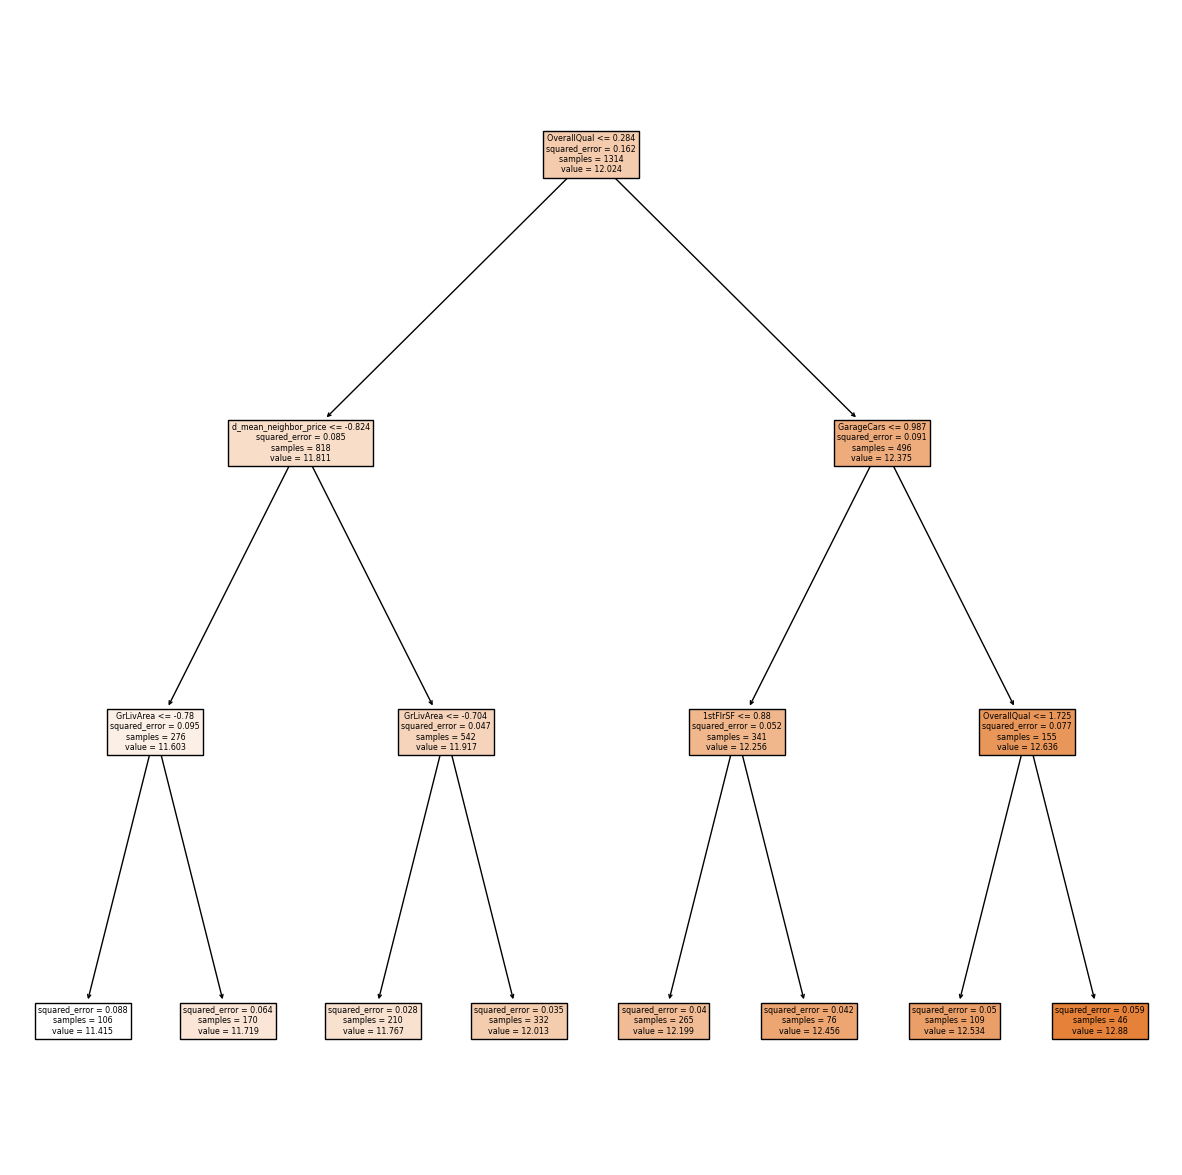

In [ ]:
mdl = dtr_results.best_estimator_.named_steps['model']
fig, ax = plt.subplots(figsize=(15,15))
tree.plot_tree(mdl, feature_names = X_cols, filled=True);

In [ ]:
mdl.feature_importances_

array([0.20833942, 0.        , 0.08242838, 0.        , 0.        ,
       0.        , 0.04569553, 0.        , 0.        , 0.        ,
       0.06128342, 0.60225325, 0.        , 0.        , 0.        ])